# 4. Feature Engineering

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\.venv311\Scripts\python.exe -m pip install --upgrade pip


In [2]:
# --- (1) התקנות וייבוא ספריות ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')


### Loading and cleaning the external program master file before integration

הכנה למיזוג של קובץ נתונים חיצוני ממחקר על מאגר התוכניות של התוכנית הלאומית שכולל נתונים על תפוקות התוכניות ויעדיהן

In [3]:
# ===============================================================
# (1) טעינת קובץ הנתונים הראשי ויצירת עותק עבודה + טעינת טבלת תוכניות חיצונית
# ===============================================================
import pandas as pd
import shutil
from pathlib import Path

# --- נתיבי קבצים ---
SRC_PATH  = Path("data/interim/data_cleansing_final.pkl")      # הקובץ הראשי אחרי טיהור
WORK_PATH = Path("data/interim/data_engineering.pkl")          # עותק עבודה לשלב הבא
PROG_PATH = Path("data/external/program_data_import_preview_clean.pkl")  # טבלת תוכניות חיצונית

# --- לוודא שהתיקייה קיימת ---
WORK_PATH.parent.mkdir(parents=True, exist_ok=True)

# --- יצירת עותק עבודה ---
shutil.copy2(SRC_PATH, WORK_PATH)
print(f"📂 נוצר קובץ עבודה חדש: {WORK_PATH.name}")

# --- טעינת הקובץ הראשי לעבודה ---
df_main = pd.read_pickle(WORK_PATH)
print(f"✅ נטען בהצלחה | צורה: {df_main.shape}")

df = df_main.copy()

# --- טעינת טבלת התוכניות ---
df_prog = pd.read_pickle(PROG_PATH)
print(f"📘 נטענה טבלת תוכניות | shape: {df_prog.shape} | עמודות: {len(df_prog.columns)}")

# --- הצצה על הטבלה החיצונית ---
with pd.option_context('display.max_columns', None, 'display.width', 200):
    display(df_prog.head(5))
    display(df_prog.tail(5))


📂 נוצר קובץ עבודה חדש: data_engineering.pkl
✅ נטען בהצלחה | צורה: (21981, 394)
📘 נטענה טבלת תוכניות | shape: (27139, 37) | עמודות: 37


,id,שםתוכנית,mmaanecode,TOCHNIT,שםתוכנית_A,סמלתוכנית,VAR00001,שכבתגיל,מגדר,התוכניתמיועדתל,פירוטנוסףשלאוכלוסייתיעד,יחידהאירגונית,היכןמתקיימתהתוכנית,תפוקותדרךפעולה,תפוקותאוכלוסייתיעד,תפוקותהרכבדרךפעולה,תפוקותתדירותהפעילות,תפוקותאורךהפעילות,תוצאהעיקריתרצויה,תוצאהמשניתרצויה,טיפולפיזי,השתייכותלמשפחה,הגנהמפניאחרים,לימודי,השתייכותוהשתלבותחברתית,רווחהרגשית,הגנהמפניהתנהגויותסיכון,yishuv,מססימוכיןממשלזמין,סוגטופס,סמליישוב,יישוב,מחוז,סוגמוסד,כיתה,שםתוכנית_B,סמלתוכנית_A
0,01df9fce,מרכז ילדים הורים לגיל הרך,1010009,NaN,מרכז ילדים הורים לגיל הרך,1010009,1010009,הגיל הרך,כולם,התכנית מיועדת לכל האוכלוסיות,פעוטות בגילאי 6 - 0 הסובלים מהזנחה או התעללות ...,רווחה - שירותים אישיים וחברתיים - קהילה - שירו...,0,בניית תכנית אישית,אחר,משפחתית,אחת לשנה,אחר,השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,השתייכות והשתלבות חברתית – הגברת ההשתלבות החבר...,0,0,0,0,1,0,0,3300,NaN,מיפוי/מעקב במענים לילדים בסיכון,3300,בני ברק,מרכז,NaN,NaN,מרכז ילדים הורים לגיל הרך,1010009
1,0f39c5a1,מרכז ילדים הורים לגיל הרך,1010009,NaN,מרכז ילדים הורים לגיל הרך,1010009,1010009,הגיל הרך,כולם,התכנית מיועדת לכל האוכלוסיות,פעוטות בגילאי 6 - 0 הסובלים מהזנחה או התעללות ...,רווחה - שירותים אישיים וחברתיים - קהילה - שירו...,0,בניית תכנית אישית,אחר,משפחתית,אחת לשנה,אחר,השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,השתייכות והשתלבות חברתית – הגברת ההשתלבות החבר...,0,0,0,0,1,0,0,3300,NaN,מיפוי/מעקב במענים לילדים בסיכון,3300,בני ברק,מרכז,NaN,NaN,מרכז ילדים הורים לגיל הרך,1010009
2,117541e3,מרכז ילדים הורים לגיל הרך,1010009,NaN,מרכז ילדים הורים לגיל הרך,1010009,1010009,הגיל הרך,כולם,התכנית מיועדת לכל האוכלוסיות,פעוטות בגילאי 6 - 0 הסובלים מהזנחה או התעללות ...,רווחה - שירותים אישיים וחברתיים - קהילה - שירו...,0,בניית תכנית אישית,אחר,משפחתית,אחת לשנה,אחר,השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,השתייכות והשתלבות חברתית – הגברת ההשתלבות החבר...,0,0,0,0,1,0,0,3300,NaN,מיפוי/מעקב במענים לילדים בסיכון,3300,בני ברק,מרכז,NaN,NaN,מרכז ילדים הורים לגיל הרך,1010009
3,167d836d,מרכז ילדים הורים לגיל הרך,1010009,NaN,מרכז ילדים הורים לגיל הרך,1010009,1010009,הגיל הרך,כולם,התכנית מיועדת לכל האוכלוסיות,פעוטות בגילאי 6 - 0 הסובלים מהזנחה או התעללות ...,רווחה - שירותים אישיים וחברתיים - קהילה - שירו...,0,בניית תכנית אישית,אחר,משפחתית,אחת לשנה,אחר,השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,השתייכות והשתלבות חברתית – הגברת ההשתלבות החבר...,0,0,0,0,1,0,0,3300,NaN,מיפוי/מעקב במענים לילדים בסיכון,3300,בני ברק,מרכז,NaN,NaN,מרכז ילדים הורים לגיל הרך,1010009
4,196a5af6,מרכז ילדים הורים לגיל הרך,1010009,NaN,מרכז ילדים הורים לגיל הרך,1010009,1010009,הגיל הרך,כולם,התכנית מיועדת לכל האוכלוסיות,פעוטות בגילאי 6 - 0 הסובלים מהזנחה או התעללות ...,רווחה - שירותים אישיים וחברתיים - קהילה - שירו...,0,בניית תכנית אישית,אחר,משפחתית,אחת לשנה,אחר,השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,השתייכות והשתלבות חברתית – הגברת ההשתלבות החבר...,0,0,0,0,1,0,0,3300,NaN,מיפוי/מעקב במענים לילדים בסיכון,3300,בני ברק,מרכז,NaN,NaN,מרכז ילדים הורים לגיל הרך,1010009


,id,שםתוכנית,mmaanecode,TOCHNIT,שםתוכנית_A,סמלתוכנית,VAR00001,שכבתגיל,מגדר,התוכניתמיועדתל,פירוטנוסףשלאוכלוסייתיעד,יחידהאירגונית,היכןמתקיימתהתוכנית,תפוקותדרךפעולה,תפוקותאוכלוסייתיעד,תפוקותהרכבדרךפעולה,תפוקותתדירותהפעילות,תפוקותאורךהפעילות,תוצאהעיקריתרצויה,תוצאהמשניתרצויה,טיפולפיזי,השתייכותלמשפחה,הגנהמפניאחרים,לימודי,השתייכותוהשתלבותחברתית,רווחהרגשית,הגנהמפניהתנהגויותסיכון,yishuv,מססימוכיןממשלזמין,סוגטופס,סמליישוב,יישוב,מחוז,סוגמוסד,כיתה,שםתוכנית_B,סמלתוכנית_A
27134,46c3d5de,מועדונית שיקומית א' (3ימים),110100706,NaN,מועדונית שיקומית - מודל א' - 3 ימים,110100706,110100706,יסודי,כולם,התכנית מיועדת לכל האוכלוסיות,• ילדים להורים שבגלל אישיותם או בגלל קשיים הנו...,רווחה - שירותים אישיים וחברתיים - קהילה - משפח...,מבנה ציבור ביישוב,הזנה,ילדים,פרטנית|קבוצתית|משפחתית,פעמיים בשבוע ויותר,אין זמן מוגדר,"קיום פיזי, בריאות ואפשרות להתפתחות – הגברת איכ...",השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,0,1,0,1,0,0,0,8410,NaN,מיפוי/מעקב במענים לילדים בסיכון,8410,רחובות,מרכז,NaN,NaN,מועדונית שיקומית א' (3ימים),110100706
27135,58385c5d,מועדונית שיקומית א' (3ימים),110100706,NaN,מועדונית שיקומית - מודל א' - 3 ימים,110100706,110100706,יסודי,כולם,התכנית מיועדת לכל האוכלוסיות,• ילדים להורים שבגלל אישיותם או בגלל קשיים הנו...,רווחה - שירותים אישיים וחברתיים - קהילה - משפח...,מבנה ציבור ביישוב,הזנה,ילדים,פרטנית|קבוצתית|משפחתית,פעמיים בשבוע ויותר,אין זמן מוגדר,"קיום פיזי, בריאות ואפשרות להתפתחות – הגברת איכ...",השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,0,1,0,1,0,0,0,8410,NaN,מיפוי/מעקב במענים לילדים בסיכון,8410,רחובות,מרכז,NaN,NaN,מועדונית שיקומית א' (3ימים),110100706
27136,6da49efb,מועדונית שיקומית א' (3ימים),110100706,NaN,מועדונית שיקומית - מודל א' - 3 ימים,110100706,110100706,יסודי,כולם,התכנית מיועדת לכל האוכלוסיות,• ילדים להורים שבגלל אישיותם או בגלל קשיים הנו...,רווחה - שירותים אישיים וחברתיים - קהילה - משפח...,מבנה ציבור ביישוב,הזנה,ילדים,פרטנית|קבוצתית|משפחתית,פעמיים בשבוע ויותר,אין זמן מוגדר,"קיום פיזי, בריאות ואפשרות להתפתחות – הגברת איכ...",השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,0,1,0,1,0,0,0,8410,NaN,מיפוי/מעקב במענים לילדים בסיכון,8410,רחובות,מרכז,NaN,NaN,מועדונית שיקומית א' (3ימים),110100706
27137,a132d031,מועדונית שיקומית א' (3ימים),110100706,NaN,מועדונית שיקומית - מודל א' - 3 ימים,110100706,110100706,יסודי,כולם,התכנית מיועדת לכל האוכלוסיות,• ילדים להורים שבגלל אישיותם או בגלל קשיים הנו...,רווחה - שירותים אישיים וחברתיים - קהילה - משפח...,מבנה ציבור ביישוב,הזנה,ילדים,פרטנית|קבוצתית|משפחתית,פעמיים בשבוע ויותר,אין זמן מוגדר,"קיום פיזי, בריאות ואפשרות להתפתחות – הגברת איכ...",השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,0,1,0,1,0,0,0,8410,NaN,מיפוי/מעקב במענים לילדים בסיכון,8410,רחובות,מרכז,NaN,NaN,מועדונית שיקומית א' (3ימים),110100706
27138,a72ef03c,מועדונית שיקומית א' (3ימים),110100706,NaN,מועדונית שיקומית - מודל א' - 3 ימים,110100706,110100706,יסודי,כולם,התכנית מיועדת לכל האוכלוסיות,• ילדים להורים שבגלל אישיותם או בגלל קשיים הנו...,רווחה - שירותים אישיים וחברתיים - קהילה - משפח...,מבנה ציבור ביישוב,הזנה,ילדים,פרטנית|קבוצתית|משפחתית,פעמיים בשבוע ויותר,אין זמן מוגדר,"קיום פיזי, בריאות ואפשרות להתפתחות – הגברת איכ...",השתייכות למשפחה – הגברת איכות סיפוק הצרכים של ...,0,1,0,1,0,0,0,8410,NaN,מיפוי/מעקב במענים לילדים בסיכון,8410,רחובות,מרכז,NaN,NaN,מועדונית שיקומית א' (3ימים),110100706


In [4]:
# --- (3) פונקציות עזר לשלב ה-Feature Engineering ---

def snapshot(df):
    """
    יוצר צילום מצב של מבנה הדאטה לפני ואחרי שינוי.
    מחזיר מידע על:
    - גודל המסגרת (שורות, עמודות)
    - מספר ערכים חסרים
    - רשימת עמודות
    - טיפוסים עיקריים
    """
    return {
        'shape': df.shape,
        'missing': int(df.isna().sum().sum()),
        'cols': set(df.columns),
        'dtypes': df.dtypes.value_counts().to_dict()
    }


def compare_snapshots(before, after):
    """
    מדפיסה סיכום שינויים בין שני מצבים של הדאטה:
    - שינוי בגודל (שורות, עמודות)
    - עמודות חדשות / עמודות שהוסרו
    - שינוי במספר תאים חסרים
    - שינוי בטיפוסים
    """
    # --- מבנה כללי ---
    print(f"📊 צורה לפני: {before['shape']} | אחרי: {after['shape']}")
    print(f"🧩 שינוי במספר ערכים חסרים: {after['missing'] - before['missing']}")

    # --- עמודות חדשות / שהוסרו ---
    added = after['cols'] - before['cols']
    removed = before['cols'] - after['cols']

    if added:
        print(f"🆕 נוספו {len(added)} עמודות:")
        for c in sorted(added): print("   ➕", c)
    if removed:
        print(f"🗑️ הוסרו {len(removed)} עמודות:")
        for c in sorted(removed): print("   ➖", c)
    if not added and not removed:
        print("⚖️ לא נוספו או הוסרו עמודות.")

    # --- טיפוסים ---
    print("\n📘 טיפוסים לפני:", before['dtypes'])
    print("📗 טיפוסים אחרי:", after['dtypes'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21981 entries, 0 to 21980
Columns: 394 entries, ref_id_360_m1 to is_not_in_framework
dtypes: Int16(10), Int64(255), bool(13), category(60), datetime64[ns](4), float64(2), int64(50)
memory usage: 60.0 MB


In [6]:
print(f"📦 צורה: {df.shape[0]:,} שורות × {df.shape[1]} עמודות\n")

# ננרמל את שמות הטיפוסים (למשל כל הקטגוריות → 'category')
type_summary = df.dtypes.astype(str).replace(to_replace=r"category.*", value="category", regex=True)
print(type_summary.value_counts().to_string())


📦 צורה: 21,981 שורות × 394 עמודות

Int64             255
category           60
int64              50
bool               13
Int16              10
datetime64[ns]      4
float64             2


In [7]:
# שלב 1: הגדרת רשימות משתנים להשוואה
# רשימות העמודות להשוואה
main_name_cols = ["service_name_m1_clean", "program_name_m1_clean"]
prog_name_cols = ["שםתוכנית", "שםתוכנית_A"]

main_code_cols = ["ref_id_360_m1", "service_code", "program_code_m1"]
prog_code_cols = ["mmaanecode", "סמלתוכנית"]


In [8]:
# שלב 2: בדיקת חפיפה בין שמות התוכניות
for m_col in main_name_cols:
    for p_col in prog_name_cols:
        inter = set(df_main[m_col].dropna().unique()) & set(df_prog[p_col].dropna().unique())
        print(f"💬 התאמה בין {m_col} ↔ {p_col}: {len(inter)} שמות חופפים")
        if len(inter) > 0:
            print("דוגמאות:", list(inter)[:10], "\n")


💬 התאמה בין service_name_m1_clean ↔ שםתוכנית: 27 שמות חופפים
דוגמאות: ['מדריכי/ת מניעה במערכת החינוך', 'פותחים עתיד', 'מרכז טיפולי לילדים בסיכון ומשפחותיהם', 'נייידת כתובת רחוב', 'מוקד הורים לנוער עולה בסיכון', 'חיזוק משאבי התמודדות באמצעות טיפול באומנויות', 'סדנא לשיפור מיומנויות חברתיות אצל ילדים', 'נערי הגן', 'בית חם ויוצר לנערות', 'מועדוניות ביתיות קיימות (גיל חביון)'] 

💬 התאמה בין service_name_m1_clean ↔ שםתוכנית_A: 20 שמות חופפים
דוגמאות: ['פותחים עתיד', 'מרכז טיפולי לילדים בסיכון ומשפחותיהם', 'יישוג ועבודת רחוב בקהילה', 'מוקד הורים לנוער עולה בסיכון', 'חיזוק משאבי התמודדות באמצעות טיפול באומנויות', 'סדנא לשיפור מיומנויות חברתיות אצל ילדים', 'נערי הגן', 'המשחק ככלי לקידום התפתחותי ויצירת קשר', 'חצר פעילה', 'תכנית ראשית'] 

💬 התאמה בין program_name_m1_clean ↔ שםתוכנית: 29 שמות חופפים
דוגמאות: ['מדריכי/ת מניעה במערכת החינוך', 'פותחים עתיד', 'מרכז טיפולי לילדים בסיכון ומשפחותיהם', 'מרכז "הורות וטף" מרכז ילדים הורים לגיל הרך (בתוך מרכז לגיל הרך)', 'נייידת כתובת רחוב', 'מרכז טיפולי ל

אין מספיק חפיפה על בסיס מפתחות של שמות התוכניות. נבדוק השוואה בין הקודים של התוכניות

In [9]:
#  שלב 3: בדיקת חפיפה בין קודים
for m_col in main_code_cols:
    for p_col in prog_code_cols:
        inter = set(df_main[m_col].dropna().astype(str).unique()) & set(df_prog[p_col].dropna().astype(str).unique())
        print(f"🔢 התאמה בין {m_col} ↔ {p_col}: {len(inter)} קודים חופפים")
        if len(inter) > 0:
            print("דוגמאות:", list(inter)[:10], "\n")


🔢 התאמה בין ref_id_360_m1 ↔ mmaanecode: 0 קודים חופפים
🔢 התאמה בין ref_id_360_m1 ↔ סמלתוכנית: 0 קודים חופפים
🔢 התאמה בין service_code ↔ mmaanecode: 0 קודים חופפים
🔢 התאמה בין service_code ↔ סמלתוכנית: 0 קודים חופפים
🔢 התאמה בין program_code_m1 ↔ mmaanecode: 81 קודים חופפים
דוגמאות: ['2220154', '2210039', '3330023', '3310076', '122800557', '2230093', '1010117', '1110107', '2230054', '1080272'] 

🔢 התאמה בין program_code_m1 ↔ סמלתוכנית: 81 קודים חופפים
דוגמאות: ['2220154', '2210039', '3330023', '3310076', '122800557', '2230093', '1010117', '1110107', '2230054', '1080272'] 



In [10]:
# שלב 5 : טבלת סיכום התאמות
summary = []

for m_col in main_name_cols + main_code_cols:
    for p_col in prog_name_cols + prog_code_cols:
        inter = set(df_main[m_col].dropna().astype(str)) & set(df_prog[p_col].dropna().astype(str))
        summary.append({
            "main_col": m_col,
            "prog_col": p_col,
            "matches": len(inter)
        })

summary_df = pd.DataFrame(summary).sort_values("matches", ascending=False)
display(summary_df)

,main_col,prog_col,matches
18,program_code_m1,mmaanecode,81
19,program_code_m1,סמלתוכנית,81
4,program_name_m1_clean,שםתוכנית,29
0,service_name_m1_clean,שםתוכנית,27
1,service_name_m1_clean,שםתוכנית_A,20
5,program_name_m1_clean,שםתוכנית_A,20
3,service_name_m1_clean,סמלתוכנית,0
2,service_name_m1_clean,mmaanecode,0
8,ref_id_360_m1,שםתוכנית,0
9,ref_id_360_m1,שםתוכנית_A,0


רק המשתנה סמל תוכנית נמצא בחפיפה חלקית של 81 תוכניות. 

In [11]:
# ===============================================================
# בדיקת התפלגות הערכים (value_counts) בכל אחת מהעמודות שנבחרו
# כולל ספירה של ערכים ייחודיים, מספר חסרים, ואחוז חסרים
# ===============================================================

cols_check = [
    "פירוטנוסףשלאוכלוסייתיעד","יחידהאירגונית",
    "תפוקותדרךפעולה","תפוקותאוכלוסייתיעד","תפוקותהרכבדרךפעולה",
    "תפוקותתדירותהפעילות","תפוקותאורךהפעילות","תוצאהעיקריתרצויה",
]

for c in cols_check:
    print(f"\n🔹 {c}")
    s = df_prog[c]
    n = len(s)
    n_miss = s.isna().sum()
    print(f"סה\"כ רשומות: {n:,} | חסרים: {n_miss:,} ({n_miss/n:.1%}) | ערכים ייחודיים: {s.nunique(dropna=True)}")
    
    # הצגת התפלגות (ערך, שכיחות, אחוז)
    vc = s.value_counts(dropna=False)
    vc = vc.to_frame("count")
    vc["%"] = (vc["count"] / n * 100).round(1)
    display(vc.head(5))  # מציג את 5 הראשונים



🔹 פירוטנוסףשלאוכלוסייתיעד
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 82


,count,%
פירוטנוסףשלאוכלוסייתיעד,,
"ילדים בגילאי שנה וחצי-שש שאותרו כבעלי פוטנציאל תקין, אך מצויים בסיכון לעיכוב התפתחותי בשל חיים במשפחות רב בעיתיות המאופיינות ע""י קשיים בתפקוד ההורי והמשפחתי , משברי הגירה, קושי סוציו אקונומי וכד'.",4009,14.8
"תלמידים בבתי הספר הנמצאים במצוקה רגשית, החווים קשיים חברתיים, התנהגותיים ותפקודיים או קשיים עם המשפחה.",2932,10.8
0,2862,10.5
"ילדים, הורים וצוותים חינוכיים במסגרות החינוך לגיל הרך (מעונות וגני ילדים). \nהתוכנית מיועדת לכלל ילדי הגן/המעון.\nטווח גילאים- ילדים עד גיל גן חובה (כולל) מגיל שלושה חודשים עד גיל שש.",2207,8.1
בני נוער מגילאי 12-18 על ]ני רצף הסיכון,2053,7.6



🔹 יחידהאירגונית
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 18


,count,%
יחידהאירגונית,,
חינוך - פדגוגי - אגף א' חינוך ילדים ונוער בסיכון,11589,42.7
חינוך - פדגוגי - אגף שירות פסיכולוגי ייעוצי,4168,15.4
חינוך - פדגוגי - אגף א' לחינוך קדם יסודי,3458,12.7
רווחה - שירותים אישיים וחברתיים - קהילה - משפחות ילדים ונוער בקהילה,2272,8.4
בריאות - חטיבת הרפואה - התפתחות הילד ושיקומו,1553,5.7



🔹 תפוקותדרךפעולה
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 14


,count,%
תפוקותדרךפעולה,,
"שיחות טיפוליות וטיפולים רגשיים: טיפול פסיכולוגי, טיפול פסיכו-סוציאלי וכד'",6074,22.4
אתור ויישוג – פעילות ייזומה לזיהוי ואתור ילדים ונוער בסיכון ומשפחותיהם,4964,18.3
"ייעוץ, הדרכה והקניית מיומנויות לילדים ונוער בסיכון ובני משפחותיהם למניעת מצבי סיכון והגברת תפקוד",4529,16.7
בניית תכנית אישית,3172,11.7
"אבחונים ייעודיים (פסיכודידקטיים, ההתפתחותיים ואחרים)",2055,7.6



🔹 תפוקותאוכלוסייתיעד
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 6


,count,%
תפוקותאוכלוסייתיעד,,
ילדים,14775,54.4
ילדים|הורים,3789,14.0
צוות,3456,12.7
הורים,3250,12.0
אחר,1086,4.0



🔹 תפוקותהרכבדרךפעולה
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 8


,count,%
תפוקותהרכבדרךפעולה,,
קבוצתית,11249,41.4
פרטנית,8570,31.6
פרטנית|קבוצתית|משפחתית,2938,10.8
פרטנית|קבוצתית,2279,8.4
משפחתית,1224,4.5



🔹 תפוקותתדירותהפעילות
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 8


,count,%
תפוקותתדירותהפעילות,,
פעם בשבוע,7268,26.8
לפי הצורך,6662,24.5
פעמיים עד שלוש בחודש,3737,13.8
0,3351,12.3
0,2048,7.5



🔹 תפוקותאורךהפעילות
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 7


,count,%
תפוקותאורךהפעילות,,
שעה עד שעתיים,8049,29.7
0,6144,22.6
אחר,4324,15.9
0,4065,15.0
אין זמן מוגדר,2235,8.2



🔹 תוצאהעיקריתרצויה
סה"כ רשומות: 27,139 | חסרים: 0 (0.0%) | ערכים ייחודיים: 35


,count,%
תוצאהעיקריתרצויה,,
"התפתחות ורכישת מיומנויות – הגברה של השתייכות הילד למסגרות חינוכיות וקידום הישגיו הלימודיים בכלל זה: התמדה במסגרת חינוכית, עמידה במטלות, הישגים, פערים במיומנויות התפתחותיות",6850,25.2
"השתייכות למשפחה – הגברת איכות סיפוק הצרכים של הילד בתחום הרגשי, החברתי וההתפתחותי בכלל זה: קושי בקשר הורה ילד, העשרה, סיוע לימודי התפתחותי ותיווך לשירותים",6085,22.4
"השתייכות והשתלבות חברתית – הגברת ההשתלבות החברתית של הילד והפחתת תחושת ניכור ובדידות. בכלל זה: קושי ביצירת קשר עם אחרים, קושי בהסתגלות והשתלבות במסגרת, הפגנת התנהגות תוקפנית|התפתחות ורכישת מיומנויות – הגברה של השתייכות הילד למסגרות חינוכיות וקידום הישגיו הלימודיים בכלל זה: התמדה במסגרת חינוכית, עמידה במטלות, הישגים, פערים במיומנויות התפתחותיות",3456,12.7
"השתייכות למשפחה – הגברת איכות סיפוק הצרכים של הילד בתחום הרגשי, החברתי וההתפתחותי בכלל זה: קושי בקשר הורה ילד, העשרה, סיוע לימודי התפתחותי ותיווך לשירותים|התפתחות ורכישת מיומנויות – הגברה של השתייכות הילד למסגרות חינוכיות וקידום הישגיו הלימודיים בכלל זה: התמדה במסגרת חינוכית, עמידה במטלות, הישגים, פערים במיומנויות התפתחותיות",2071,7.6
"רווחה ובריאות רגשית – הפחתת המצוקה הרגשית של הילד. בכלל זה: תגובות רגשיות מוגזמות, התנהגות חריגה בעקבות קושי רגיש (הרטבה וכו'), מביעים חוסר אמונה בעצמם",1849,6.8


In [12]:
# בניית טבלה מסודרת לפי קוד תוכנית ולא לפי הילדים
import pandas as pd
from pathlib import Path

# --- 1) הגדרות ---
key_col   = "mmaanecode"                  # מפתח המיזוג
name_cols = ["שםתוכנית", "שםתוכנית_A"]   # שמות התוכנית (אם קיימים)
attrs = [
    "יחידהאירגונית" ,"תפוקותאוכלוסייתיעד", 
    "תפוקותדרךפעולה","תפוקותהרכבדרךפעולה",
    "תפוקותתדירותהפעילות","תפוקותאורךהפעילות",
    "תוצאהעיקריתרצויה","תוצאהמשניתרצויה",
]

# --- 2) פונקציית אגירה: אם כל הערכים זהים → יחיד; אחרת → ייחודיים מחוברים בנקודה-פסיק ---
def collapse_values(s: pd.Series):
    s = s.dropna().astype("string").str.strip()
    if s.empty:
        return pd.NA
    uniq = pd.unique(s)
    return uniq[0] if len(uniq) == 1 else "; ".join(sorted(uniq))

# --- 3) בחירת עמודות שקיימות בפועל ---
all_wanted = [key_col] + [c for c in name_cols if c in df_prog.columns] + [c for c in attrs if c in df_prog.columns]
dfp = df_prog[all_wanted].copy()

# --- 4) בניית טבלת מאסטר: שורה אחת לכל קוד תוכנית ---
agg_dict = {c: collapse_values for c in all_wanted if c != key_col}
program_master = (
    dfp.groupby(key_col, dropna=False, as_index=False)
       .agg(agg_dict)
)

# --- 5) סדר עמודות: קוד → שמות → מאפיינים ---
ordered_cols = [key_col] + [c for c in name_cols if c in program_master.columns] + [c for c in attrs if c in program_master.columns]
program_master = program_master[ordered_cols]

# --- 6) בדיקות קצרות + הצצה ---
n_codes = program_master.shape[0]
print(f"מספר שורות (קודי תוכנית ייחודיים): {n_codes:,}")



מספר שורות (קודי תוכנית ייחודיים): 95


In [13]:
# ===============================================================
# ניקוי טבלת program_master – הסרת תוכניות לא אינפורמטיביות לפי קוד
# ===============================================================
import pandas as pd

# --- רשימת קודים להסרה ---
remove_ids = [1010008, 1010007, 1010078, 1010081, 2220178, 2230324, 122600659]

# --- ספירה לפני ---
before = program_master.shape[0]

# --- הסרה ---
program_master = program_master[~program_master["mmaanecode"].isin(remove_ids)].copy()

# --- דוח קצר ---
removed = before - program_master.shape[0]
print(f"❌ הוסרו {removed} תוכניות לא אינפורמטיביות לפי קוד")
print("✅ אחרי ניקוי:", program_master.shape)


❌ הוסרו 7 תוכניות לא אינפורמטיביות לפי קוד
✅ אחרי ניקוי: (88, 11)


In [14]:
#  שינוי שמות העמודות מעברית לאנגלית 

rename_map = {
    "mmaanecode": "program_code",
    "שםתוכנית": "program_name",
    "שםתוכנית_A": "program_name_alt",
    "יחידהאירגונית": "organizational_unit",
    "תפוקותדרךפעולה": "outputs_action_path",
    "תפוקותאוכלוסייתיעד": "outputs_target_population",
    "תפוקותהרכבדרךפעולה": "outputs_action_composition",
    "תפוקותתדירותהפעילות": "outputs_activity_frequency",
    "תפוקותאורךהפעילות": "outputs_activity_duration",
    "תוצאהעיקריתרצויה": "desired_main_outcome",
    "תוצאהמשניתרצויה": "desired_secondary_outcome",
}

program_master  = program_master .rename(columns=rename_map)
print("✅ עמודות עודכנו לשמות באנגלית:")
print(program_master .columns.tolist())

# 🔍 הצגת צורה וסוגי טיפוסים
print("\n=== Data Overview ===")
print(f"Shape: {program_master .shape[0]} rows × {program_master .shape[1]} columns")
print("\nDtypes:")
print(program_master .dtypes.value_counts())
print("\nPreview of dtypes by column:")
print(program_master .dtypes.head(10))



✅ עמודות עודכנו לשמות באנגלית:
['program_code', 'program_name', 'program_name_alt', 'organizational_unit', 'outputs_target_population', 'outputs_action_path', 'outputs_action_composition', 'outputs_activity_frequency', 'outputs_activity_duration', 'desired_main_outcome', 'desired_secondary_outcome']

=== Data Overview ===
Shape: 88 rows × 11 columns

Dtypes:
object    10
int64      1
Name: count, dtype: int64

Preview of dtypes by column:
program_code                   int64
program_name                  object
program_name_alt              object
organizational_unit           object
outputs_target_population     object
outputs_action_path           object
outputs_action_composition    object
outputs_activity_frequency    object
outputs_activity_duration     object
desired_main_outcome          object
dtype: object


In [15]:
# --- המרת עמודות מסוג אוביקט לקטגוריאליות ---
import pandas as pd

# זיהוי העמודות מסוג אוביקט בלבד
obj_cols = program_master .select_dtypes(include="object").columns.tolist()
print(f"נמצאו {len(obj_cols)} עמודות מסוג object להמרה → category:")
print(obj_cols)

# המרה בפועל
for c in obj_cols:
    program_master [c] = program_master [c].astype("category")

# בדיקה לאחר ההמרה
print("\n✅ לאחר ההמרה:")
print(program_master .dtypes.value_counts())
print("\nPreview of dtypes by column:")
print(program_master .dtypes.head(10))



נמצאו 10 עמודות מסוג object להמרה → category:
['program_name', 'program_name_alt', 'organizational_unit', 'outputs_target_population', 'outputs_action_path', 'outputs_action_composition', 'outputs_activity_frequency', 'outputs_activity_duration', 'desired_main_outcome', 'desired_secondary_outcome']

✅ לאחר ההמרה:
int64       1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
Name: count, dtype: int64

Preview of dtypes by column:
program_code                     int64
program_name                  category
program_name_alt              category
organizational_unit           category
outputs_target_population     category
outputs_action_path           category
outputs_action_composition    category
outputs_activity_frequency    category
outputs_activity_duration     category
desired_main_outcome          category
dtype: object


In [16]:
# בדיקת התפלגויות וערכים ייחודיים

vc = program_master["outputs_activity_duration"].value_counts(dropna=False)
vc = vc.to_frame("count")
vc["%"] = (vc["count"] / len(program_master) * 100).round(1)

print(f"סה\"כ רשומות: {len(program_master):,} | ערכים ייחודיים: {program_master['outputs_activity_duration'].nunique(dropna=True)}")
display(vc)

סה"כ רשומות: 88 | ערכים ייחודיים: 6


,count,%
outputs_activity_duration,,
0,25,28.4
שעה עד שעתיים,20,22.7
אחר,17,19.3
יותר משעתיים,10,11.4
פחות משעה,10,11.4
אין זמן מוגדר,6,6.8


In [17]:
# איחוד ערכים מקבילים בעמודת משך הפעילות
col = "outputs_activity_duration"

program_master[col] = (
    program_master[col]
    .astype("string")
    .str.strip()
    .replace({
        "0": "לא צוין",
        "אין זמן מוגדר": "לא צוין"
    })
)

# בדיקה מחדש של ההתפלגות
vc = program_master[col].value_counts(dropna=False)
vc = vc.to_frame("count")
vc["%"] = (vc["count"] / len(program_master) * 100).round(1)
print(vc)

                           count     %
outputs_activity_duration             
לא צוין                       31  35.2
שעה עד שעתיים                 20  22.7
אחר                           17  19.3
יותר משעתיים                  10  11.4
פחות משעה                     10  11.4


In [18]:
vc = program_master["outputs_action_composition"].value_counts(dropna=False)
vc = vc.to_frame("count")
vc["%"] = (vc["count"] / len(program_master) * 100).round(1)

print(f"סה\"כ רשומות: {len(program_master):,} | ערכים ייחודיים: {program_master['outputs_action_composition'].nunique(dropna=True)}")
display(vc)

סה"כ רשומות: 88 | ערכים ייחודיים: 7


,count,%
outputs_action_composition,,
קבוצתית,33,37.5
פרטנית,30,34.1
משפחתית,14,15.9
פרטנית|קבוצתית,5,5.7
קהילתית,3,3.4
פרטנית|קבוצתית|משפחתית,2,2.3
"פרטנית, קבוצתית",1,1.1


In [19]:
# --- ניקוי ערכים עם קוים מפרידים וחיבור ביניהם עם ו' החיבור  --

cols_to_clean = ["outputs_target_population", "outputs_action_composition"]

for col in cols_to_clean:
    if col in program_master.columns:
        program_master[col] = (
            program_master[col]
            .astype("string")
            .str.strip()
            # החלפת מפרידים שונים ל"ו"
            .str.replace(r"[|/,]", " ו", regex=True)
            # הסרת רווחים כפולים
            .str.replace(r"\s+", " ", regex=True)
            .str.strip()
        )
        print(f"✅ נוקתה העמודה: {col}")

# --- בדיקה מהירה להתפלגות עדכנית בכל אחת ---
for col in cols_to_clean:
    if col in df_prog.columns:
        print(f"\n=== {col} ===")
        vc = df_prog[col].value_counts(dropna=False)
        vc = vc.to_frame("count")
        vc["%"] = (vc["count"] / len(program_master) * 100).round(1)
        print(vc.head(10))


✅ נוקתה העמודה: outputs_target_population
✅ נוקתה העמודה: outputs_action_composition


In [20]:
# ניקוי סופי של העמודה outputs_action_composition
col = "outputs_action_composition"

program_master[col] = (
    program_master[col]
    .astype("string")
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .replace({
        "פרטנית ו קבוצתית": "פרטנית וקבוצתית",
        "פרטנית  וקבוצתית": "פרטנית וקבוצתית",
        "פרטני ו קבוצתי": "פרטנית וקבוצתית",
        "פרטני וקבוצתי": "פרטנית וקבוצתית"
    })
)

# בדיקה מחדש של הערכים
vc = program_master[col].value_counts(dropna=False)
vc = vc.to_frame("count")
vc["%"] = (vc["count"] / len(program_master) * 100).round(1)
print(vc)



                            count     %
outputs_action_composition             
קבוצתית                        33  37.5
פרטנית                         30  34.1
משפחתית                        14  15.9
פרטנית וקבוצתית                 6   6.8
קהילתית                         3   3.4
פרטנית וקבוצתית ומשפחתית        2   2.3


In [21]:
# שמירה מעודכנת
out = Path("data/external/programs_master_for_merg.pkl")
program_master.to_pickle(out)
program_master.to_csv(out.with_suffix(".csv"), index=False, encoding="utf-8-sig")
print("\n✅ נשמר עם שמות באנגלית:", out.resolve())




✅ נשמר עם שמות באנגלית: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\data\external\programs_master_for_merg.pkl


### Merging the cleaned program master file with the main dataset based on program codes

In [22]:
#מיזוג טבלה חיצונית שיש בה נתונים לגבי מאפייני התוכניות (ההתערבויות) שבתוכנית
# נמזג לפי עמודה משותפת של קוד מענה
# קובץ אקסל נוקה לפני המיזוג

import pandas as pd
from pathlib import Path

# ---------- קבצים ----------
BASE = Path("data/interim")
MAIN_IN   = BASE / "data_engineering.pkl"                 # קובץ העבודה שסיימת להכין
OUT_TRY   = BASE / "data_cleansing_merged.pkl"      # תוצאה ניסיונית

# קובץ מאסטר תוכניות (אחרי ניקוי+שמות באנגלית). שני נתיבים אפשריים - השתמשי במה שיש אצלך:
PROG_PATH = Path("data\external\programs_master_for_merg.pkl")

# ---------- טעינה + גיבוי ----------
df_main = pd.read_pickle(MAIN_IN)
df_prog = pd.read_pickle(PROG_PATH)

print("📦 main:", df_main.shape, "| backup saved →", MAIN_IN.name)
print("📦 programs:", df_prog.shape, "| from →", PROG_PATH.name)

# ---------- עמודות להוספה  ----------
want_prog_cols = [
    "program_code", "program_name", "program_name_alt",
    "organizational_unit", "outputs_action_path",
    "outputs_target_population", "outputs_action_composition",
    "outputs_activity_frequency", "outputs_activity_duration",
    "desired_main_outcome", "desired_secondary_outcome",
]
use_cols = [c for c in want_prog_cols if c in df_prog.columns]
print("✅ columns to add:", use_cols)

# אם עבדת עם שמות בעברית, נזהה ונבנה מיפוי מהיר
if "program_code" not in df_prog.columns and "mmaanecode" in df_prog.columns:
    df_prog = df_prog.rename(columns={
        "mmaanecode": "program_code",
        "שםתוכנית": "program_name",
        "שםתוכנית_A": "program_name_alt",
        "יחידהאירגונית": "organizational_unit",
        "תפוקותדרךפעולה": "outputs_action_path",
        "תפוקותאוכלוסייתיעד": "outputs_target_population",
        "תפוקותהרכבדרךפעולה": "outputs_action_composition",
        "תפוקותתדירותהפעילות": "outputs_activity_frequency",
        "תפוקותאורךהפעילות": "outputs_activity_duration",
        "תוצאהעיקריתרצויה": "desired_main_outcome",
        "תוצאהמשניתרצויה": "desired_secondary_outcome",
    })
    
    # בדיקה שכל העמודות האלו אכן קיימות בקובץ החיצוני
    use_cols = [c for c in want_prog_cols if c in df_prog.columns]
    
df_main["program_code_m1"] = df_main["program_code_m1"].astype("string").str.strip()
df_prog["program_code"]     = df_prog["program_code"].astype("string").str.strip()

# --- הכנה למיזוג: אין כפילויות בשם העמודה 'program_code' ---
# מוציאים את program_code מרשימת use_cols אם נכנס לשם בטעות
use_cols_no_key = [c for c in use_cols if c != "program_code"]

# מרכיבים את רשימת העמודות לצד ימין ללא כפילויות
cols_right = ["program_code"] + use_cols_no_key
# אם במקרה יש כפילויות בעמודות df_prog עצמה (לא צפוי, אבל בטוח):
df_prog_nodup = df_prog.loc[:, ~df_prog.columns.duplicated(keep="first")]

dups = [c for c, dup in zip(df_prog.columns, df_prog.columns.duplicated(keep="first")) if dup]
if dups:
    print("⚠️ duplicate column names in df_prog:", sorted(set(dups)))

# --- מפתח ייחודי בצד התוכניות + בדיקות תקינות ---
# כמה NaN במפתחי מיזוג?
n_left_nan  = df_main["program_code_m1"].isna().sum()
n_right_nan = df_prog["program_code"].isna().sum()
print(f"🧪 NaN in keys → left(program_code_m1): {n_left_nan:,} | right(program_code): {n_right_nan:,}")

# כפילויות בקוד תוכנית בצד התוכניות (לפני ייחוד)
dup_prog_codes = df_prog.duplicated(subset=["program_code"]).sum()
print(f"🧪 duplicate program_code rows in programs: {dup_prog_codes:,}")

# נשמור רשומה אחת לכל program_code (הופעה ראשונה)
df_prog_unique = df_prog_nodup.drop_duplicates(subset=["program_code"], keep="first").copy()
print("📎 programs unique by key:", df_prog_unique.shape)

# להשתמש בגרסה הייחודית למיזוג
cols_right = ["program_code"] + use_cols_no_key
right_for_merge = df_prog_unique[cols_right]

# --- מיזוג (Left join) ---
merged = df_main.merge(
    right_for_merge,
    how="left",
    left_on="program_code_m1",
    right_on="program_code",
    suffixes=("", "_prog"),
    copy=False,
)

# ---------- דו"ח כיסוי ----------
matched_n = int(merged["program_code"].notna().sum())
total_n   = len(merged)
coverage  = round(matched_n / total_n * 100, 1)
print(f"\n✅ Coverage: {matched_n:,}/{total_n:,} ({coverage}%) רשומות קיבלו מאפייני תוכנית")

# קודים שלא קיבלו התאמה (top 20)
missing_codes = (merged.loc[merged["program_code"].isna(), "program_code_m1"]
                 .astype("string").str.strip())
print("\n🔎 Missing program_code_m1 (top 20):")
print(missing_codes.value_counts().head(20))

# ---------- שמירה ----------
merged.to_pickle(OUT_TRY)
merged.to_csv(OUT_TRY.with_suffix(".csv"), index=False, encoding="utf-8-sig")
print("\n💾 saved merged try →", OUT_TRY.name, "| shape:", merged.shape)


📦 main: (21981, 394) | backup saved → data_engineering.pkl
📦 programs: (88, 11) | from → programs_master_for_merg.pkl
✅ columns to add: ['program_code', 'program_name', 'program_name_alt', 'organizational_unit', 'outputs_action_path', 'outputs_target_population', 'outputs_action_composition', 'outputs_activity_frequency', 'outputs_activity_duration', 'desired_main_outcome', 'desired_secondary_outcome']
🧪 NaN in keys → left(program_code_m1): 0 | right(program_code): 0
🧪 duplicate program_code rows in programs: 0
📎 programs unique by key: (88, 11)

✅ Coverage: 18,505/21,981 (84.2%) רשומות קיבלו מאפייני תוכנית

🔎 Missing program_code_m1 (top 20):
program_code_m1
3310075      330
122101398    306
122601126    263
2230018      189
922300613    153
2260153      130
92260017     109
122900549    100
922301130    100
122900608     99
92230034      81
133101233     78
933101144     77
822900991     73
1010008       71
104105        70
833100556     48
122300701     44
92230075      44
133101519

המיזוג השיג כיסוי של 84% מרשומות הילדים עם מאפייני התוכניות של הקודים שנמצאו חופפים

•	עשיתי כמה ניסיונות להשוואה ומיזוג השמות שלא אותרו ללא הצלחה. אסמן לא ידוע על כל שאר התוכניות שלא נמצאו- לגבי כ־3,500 ילדים לא קיים מידע על מאפייני התוכנית שבה השתתפו, ואילו לגבי יתר הילדים (84%) יש מידע מלא

In [23]:
# --- בדיקת שינויים לפני ואחרי המיזוג (מתוקן לדו"ח טיפוסים) ---
import pandas as pd
from pathlib import Path

BASE = Path("data/interim")
before_path = BASE / "data_cleansing_for_merge.pkl"  # לפני מיזוג
after_path  = BASE / "data_cleansing_merged.pkl"     # אחרי מיזוג

df_before = pd.read_pickle(before_path)
df_after  = pd.read_pickle(after_path)

print("📦 נטענו את שני הקבצים בהצלחה")
print(f"🔹 לפני מיזוג:  {df_before.shape[0]:,} שורות × {df_before.shape[1]:,} עמודות")
print(f"🔹 אחרי מיזוג: {df_after.shape[0]:,} שורות × {df_after.shape[1]:,} עמודות")

# --- עמודות שנוספו/הוסרו ---
before_cols = set(df_before.columns)
after_cols  = set(df_after.columns)
added_cols   = sorted(after_cols - before_cols)
removed_cols = sorted(before_cols - after_cols)

print("\n🧾 סיכום שינויים בעמודות:")
print(f"➕ נוספו: {len(added_cols)}")
print(f"➖ הוסרו: {len(removed_cols)}")
if added_cols:
    print("➕ דוגמה לעמודות חדשות:", added_cols[:20])

# --- דו״ח טיפוסים (ללא שגיאה) ---
before_types = df_before.dtypes.astype(str).value_counts().sort_index()
after_types  = df_after.dtypes.astype(str).value_counts().sort_index()

types_report = (
    pd.DataFrame({"לפני": before_types, "אחרי": after_types})
      .fillna(0).astype(int)
      .sort_index()
)

print("\n📊 שינויי טיפוסים (dtypes):")
print(types_report)

print("\n🔍 דוגמה לטיפוסים לאחר המיזוג (10 ראשונים):")
print(df_after.dtypes.head(10))


📦 נטענו את שני הקבצים בהצלחה
🔹 לפני מיזוג:  21,981 שורות × 427 עמודות
🔹 אחרי מיזוג: 21,981 שורות × 405 עמודות

🧾 סיכום שינויים בעמודות:
➕ נוספו: 11
➖ הוסרו: 33
➕ דוגמה לעמודות חדשות: ['desired_main_outcome', 'desired_secondary_outcome', 'organizational_unit', 'outputs_action_composition', 'outputs_action_path', 'outputs_activity_duration', 'outputs_activity_frequency', 'outputs_target_population', 'program_code', 'program_name', 'program_name_alt']

📊 שינויי טיפוסים (dtypes):
                לפני  אחרי
Int16              0    10
Int64            303   255
bool              13    13
category          78    67
datetime64[ns]     6     4
float64            7     2
int64             20    49
string             0     5

🔍 דוגמה לטיפוסים לאחר המיזוג (10 ראשונים):
ref_id_360_m1             int64
form_version_m1        category
form_filler_role_m1    category
yeshuv_code               int64
yeshuv_name_m1         category
machoz_m1              category
service_name_m1        category
service_

In [24]:
# =========================================
# טעינת הקובץ הממוזג ויצירת קובץ עבודה
# =========================================
import pandas as pd
from pathlib import Path
import shutil

# נתיב קובץ המקור (הקובץ הממוזג)
MERGED_PATH = Path("data/interim/data_cleansing_merged.pkl")

# יצירת נתיב חדש לעותק קובץ העבודה
FEATURE_PATH = Path("data/interim/feature_engineering.pkl")
FEATURE_PATH.parent.mkdir(parents=True, exist_ok=True)
shutil.copy2(MERGED_PATH, FEATURE_PATH)

# טעינת קובץ העבודה
df = pd.read_pickle(FEATURE_PATH)

# צילום מצב לפני 
before = snapshot(df)

print("✅ קובץ עבודה נוצר ונטען בהצלחה!")
print(f"📂 מקור:   {MERGED_PATH.name}")
print(f"📄 עותק לעבודה: {FEATURE_PATH.name}")
print(f"🧮 צורה: {df.shape}")


✅ קובץ עבודה נוצר ונטען בהצלחה!
📂 מקור:   data_cleansing_merged.pkl
📄 עותק לעבודה: feature_engineering.pkl
🧮 צורה: (21981, 405)


In [25]:
# --- בדיקת חסרים בקובץ הממוזג ---
import pandas as pd
from pathlib import Path

# חישוב חסרים
missing = (
    df.isna().sum()
      .to_frame("כמות חסרים")
      .assign(אחוז_חסרים=lambda t: (t["כמות חסרים"] / len(df) * 100).round(2))
      .query("`כמות חסרים` > 0")
      .sort_values("אחוז_חסרים", ascending=False)
      .reset_index()
      .rename(columns={"index": "שם משתנה"})
)

print(f"\n🔍 נמצאו {len(missing)} עמודות עם חסרים.")
display(missing.head(20))  # מציג את 20 הראשונות עם הכי הרבה חסרים



🔍 נמצאו 11 עמודות עם חסרים.


,שם משתנה,כמות חסרים,אחוז_חסרים
0,program_code,3476,15.81
1,program_name,3476,15.81
2,program_name_alt,3476,15.81
3,organizational_unit,3476,15.81
4,outputs_action_path,3476,15.81
5,outputs_target_population,3476,15.81
6,outputs_action_composition,3476,15.81
7,outputs_activity_frequency,3476,15.81
8,outputs_activity_duration,3476,15.81
9,desired_main_outcome,3476,15.81


החסרים בעמודות החדשות שנוספו משקפים מענים בקובץ המקורי שלא נמצא לגביהם מידע במאפיינים השונים. לכן, אקודד את כל הערכים החסרים לערך של לא ידוע.  

In [26]:
# קידוד חסרים לערך של לא ידוע 

import pandas as pd
from pathlib import Path


# --- רשימת עמודות שמקורן בקובץ התוכניות ---
prog_cols = [
    "program_code", "program_name", "program_name_alt", "organizational_unit",
    "outputs_action_path", "outputs_target_population", "outputs_action_composition",
    "outputs_activity_frequency", "outputs_activity_duration",
    "desired_main_outcome", "desired_secondary_outcome",
]

# סינון רק למה שקיים בפועל
prog_cols = [c for c in prog_cols if c in df.columns]

# --- המרה ל-"unknown" ---
for c in prog_cols:
    s = df[c]
    if isinstance(s.dtype, pd.CategoricalDtype):
        # הוספת הקטגוריה אם חסרה
        if "unknown" not in s.cat.categories:
            s = s.cat.add_categories(["unknown"])
        df[c] = s.fillna("unknown")
    else:
        df[c] = s.fillna("unknown")

# --- בדיקה ---
check = df[prog_cols].isna().sum().sum()
print(f"✅ כל NaN הוחלפו ב-'unknown' | נותרו חסרים: {check}")


✅ כל NaN הוחלפו ב-'unknown' | נותרו חסרים: 0


# Enriching Data- Creating New Variables from Existing Ones

## 1) Build Life-Domain Risk Indices

In [27]:
# בדיקה שכל המשתנים הללו גם מופיעים בקובץ הממוזג שלי
import pandas as pd

# --- רשימות המדדים המסכמים כפי שזוהו בקובץ הקטגוריאלי ---
RS_M1 = [
    "RS1_physical_care_difficulties_m1",
    "rs2_medical_rehab_dev_care_diff_m1",
    "RS3_supervision_difficulties_m1",
    "RS4_parent_child_relationship_difficulties_m1",
    "RS5_parenting_boundaries_difficulties_m1",
    "RS6_exposure_to_risky_behaviors_m1",
    "RS7_suspected_intrafamilial_sexual_abuse_m1",
    "RS8_suspected_physical_or_emotional_abuse_m1",
    "RS9_suspected_extra_familial_sexual_abuse_m1",
    "RS10_suspected_external_physical_abuse_m1",
    "RS11_external_emotional_or_economic_abuse_m1",
    "rs12_enrichment_support_difficulties_m1",
    "RS13_parent_school_engagement_difficulties_m1",
    "RS14_participation_or_academic_difficulties_m1",
    "RS15_developmental_or_achievement_gaps_m1",
    "RS16_social_rejection_bullying_m1",
    "RS17_withdrawal_alienation_loneliness_m1",
    "RS18_aggression_toward_peers_m1",
    "RS19_behavioral_signs_emotional_distress_m1",
    "RS20_physiological_signs_distress_m1",
    "RS21_low_self_worth_interest_motivation_m1",
    "RS22_violence_aggression_m1",
    "RS23_suicidal_ideation_attempts_m1",
    "RS24_risky_behaviors_m1",
    "RS25_illegal_behavior_involvement_m1",
    "RS26_alcohol_use_m1",
    "RS27_drug_use_m1",
    "RS28_inappropriate_sexual_behavior_m1"
]

RS_M2 = [
    "RS1_physical_care_difficulties_m2",
    "rs2_medical_rehab_dev_care_diff_m2",
    "RS3_supervision_difficulties_m2",
    "RS4_parent_child_relationship_difficulties_m2",
    "RS5_parenting_boundaries_difficulties_m2",
    "RS6_exposure_to_risky_behaviors_m2",
    "RS7_suspected_intrafamilial_sexual_abuse_m2",
    "RS8_suspected_physical_or_emotional_abuse_m2",
    "RS9_suspected_extra_familial_sexual_abuse_m2",
    "RS10_suspected_external_physical_abuse_m2",
    "RS11_external_emotional_or_economic_abuse_m2",
    "rs12_enrichment_support_difficulties_m2",
    "RS13_parent_school_engagement_difficulties_m2",
    "RS14_participation_or_academic_difficulties_m2",
    "RS15_developmental_or_achievement_gaps_m2",
    "RS16_social_rejection_bullying_m2",
    "RS17_withdrawal_alienation_loneliness_m2",
    "RS18_aggression_toward_peers_m2",
    "RS19_behavioral_signs_emotional_distress_m2",
    "RS20_physiological_signs_distress_m2",
    "RS21_low_self_worth_interest_motivation_m2",
    "RS22_violence_aggression_m2",
    "RS23_suicidal_ideation_attempts_m2",
    "RS24_risky_behaviors_m2",
    "RS25_illegal_behavior_involvement_m2",
    "RS26_alcohol_use_m2",
    "RS27_drug_use_m2",
    "RS28_inappropriate_sexual_behavior_m2"
]

# --- בדיקה: אילו קיימים ואילו חסרים בקובץ הממוזג ---
missing_m1 = [c for c in RS_M1 if c not in df.columns]
missing_m2 = [c for c in RS_M2 if c not in df.columns]

print(f"\n✅ נמצאו {len(RS_M1) - len(missing_m1)}/28 מדדים מסכמים m1 בקובץ.")
print(f"✅ נמצאו {len(RS_M2) - len(missing_m2)}/28 מדדים מסכמים m2 בקובץ.")

if missing_m1:
    print("\n⚠️ חסרים במדידה m1:")
    for c in missing_m1: print("  ·", c)
if missing_m2:
    print("\n⚠️ חסרים במדידה m2:")
    for c in missing_m2: print("  ·", c)

# --- שמירה רשמית של רשימות המדדים המסכמים (לשימוש בשלבים הבאים) ---
pd.Series(RS_M1).to_csv("data/interim/summary_vars_m1.csv", index=False)
pd.Series(RS_M2).to_csv("data/interim/summary_vars_m2.csv", index=False)
print("\n💾 נשמרו רשימות המדדים המסכמים לשתי המדידות בתיקיית interim.")



✅ נמצאו 28/28 מדדים מסכמים m1 בקובץ.
✅ נמצאו 28/28 מדדים מסכמים m2 בקובץ.

💾 נשמרו רשימות המדדים המסכמים לשתי המדידות בתיקיית interim.


In [28]:
# ============================================================
# 1️⃣ Rebuild Life-Domain Risk Indices (AREA1–AREA7)
# ------------------------------------------------------------
# Logic:
#   • Each domain is based on RS1–RS28 summary indicators (M1/M2)
#   • Values in {0,1,2} represent risk levels
#   • Value 99  = "not measured"  → treated as missing (NaN)
#   • If all RS items in a domain are 99 → AREA = NaN (not measured)
#   • If at least one valid value exists (0–2) → domain level = max(valid)
#
# Outputs per domain:
#   risk_area{k}_{name}_level_m1/m2   (0–2 or NaN)
#   risk_area{k}_{name}_has_m1/m2     (0/1)
#   risk_area{k}_delta                (-2..+2)
#   risk_area{k}_{name}_measured_m1/m2 (0/1)  ← NEW!
#
# Aggregated indices:
#   n_risk_domains_m1/m2
#   risk_total_m1/m2
#   risk_total_delta
#   n_improved_domains / n_worsened_domains
# ============================================================

import numpy as np
import pandas as pd

# --- Domain mapping ---
AREA_ITEMS = {
    1: list(range(1, 4)),     # 1–3   Physical care / health
    2: list(range(4, 6)),     # 4–5   Family / parenting
    3: list(range(6, 12)),    # 6–11  Protection from others
    4: list(range(12, 16)),   # 12–15 Learning / skills
    5: list(range(16, 19)),   # 16–18 Social integration
    6: list(range(19, 24)),   # 19–22 Emotional wellbeing
    7: list(range(24, 29)),   # 24–28 Risky behaviors
}

AREA_NAMES = {
    1: "physical",
    2: "family",
    3: "protection",
    4: "learning",
    5: "social",
    6: "emotional",
    7: "behavior",
}

def _cols_for(items, t, frame):
    """Find all RS columns belonging to a given domain and time (m1/m2)."""
    suffix = f"_m{t}"
    cols = []
    for i in items:
        pU, pL = f"RS{i}_", f"rs{i}_"
        cols += [c for c in frame.columns if (pU in c or pL in c) and c.endswith(suffix)]
    return cols

def area_level(frame: pd.DataFrame, area_id: int, t: int) -> pd.Series:
    """Compute domain level 0–2; 99 treated as missing."""
    cols = _cols_for(AREA_ITEMS[area_id], t, frame)
    if not cols:
        return pd.Series(np.nan, index=frame.index, dtype="Float32")

    sub = frame[cols].apply(pd.to_numeric, errors="coerce").replace(99, np.nan)

    # Determine which rows are fully missing (all 99 → NaN)
    all_missing = sub.isna().all(axis=1)

    # Compute max of valid RS items (0–2)
    lvl = sub.max(axis=1, skipna=True)

    # Preserve NaN for rows with all 99 (completely unmeasured)
    lvl[all_missing] = np.nan
    return lvl.astype("Int8")

# ---- Build AREA variables ----
for k in range(1, 8):
    nm = AREA_NAMES[k]

    # --- Domain levels ---
    df[f"risk_area{k}_{nm}_level_m1"] = area_level(df, k, 1)
    df[f"risk_area{k}_{nm}_level_m2"] = area_level(df, k, 2)

    # --- Measurement flags (1=at least one item measured, 0=none) ---
    df[f"risk_area{k}_{nm}_measured_m1"] = (
        df[f"risk_area{k}_{nm}_level_m1"].notna().astype("Int8")
    )
    df[f"risk_area{k}_{nm}_measured_m2"] = (
        df[f"risk_area{k}_{nm}_level_m2"].notna().astype("Int8")
    )

    # --- Any-risk indicators (1=level>0) ---
    df[f"risk_area{k}_{nm}_has_m1"] = (
        df[f"risk_area{k}_{nm}_level_m1"].fillna(0) > 0
    ).astype("Int8")
    df[f"risk_area{k}_{nm}_has_m2"] = (
        df[f"risk_area{k}_{nm}_level_m2"].fillna(0) > 0
    ).astype("Int8")

    # --- Change between measurements (positive = improvement) ---
    df[f"risk_area{k}_delta"] = (
        df[f"risk_area{k}_{nm}_level_m1"].fillna(0)
        - df[f"risk_area{k}_{nm}_level_m2"].fillna(0)
    ).astype("Int8")

# ---- Aggregated metrics ----
m1_has = [f"risk_area{k}_{AREA_NAMES[k]}_has_m1" for k in range(1,8)]
m2_has = [f"risk_area{k}_{AREA_NAMES[k]}_has_m2" for k in range(1,8)]
m1_lvl = [f"risk_area{k}_{AREA_NAMES[k]}_level_m1" for k in range(1,8)]
m2_lvl = [f"risk_area{k}_{AREA_NAMES[k]}_level_m2" for k in range(1,8)]
deltas = [f"risk_area{k}_delta" for k in range(1,8)]

df["n_risk_domains_m1"]  = df[m1_has].sum(axis=1).astype("Int16")
df["n_risk_domains_m2"]  = df[m2_has].sum(axis=1).astype("Int16")
df["risk_total_m1"]      = df[m1_lvl].sum(axis=1, min_count=1).astype("Int16")
df["risk_total_m2"]      = df[m2_lvl].sum(axis=1, min_count=1).astype("Int16")
df["risk_total_delta"]   = (df["risk_total_m1"] - df["risk_total_m2"]).astype("Int16")
df["n_improved_domains"] = (df[deltas] > 0).sum(axis=1).astype("Int16")
df["n_worsened_domains"] = (df[deltas] < 0).sum(axis=1).astype("Int16")

# ---- Quick validation summary ----
print("✅ AREA variables rebuilt successfully with '99' treated as missing.")
print(df[["risk_total_m1","risk_total_m2","risk_total_delta"]].describe().round(2))


✅ AREA variables rebuilt successfully with '99' treated as missing.
       risk_total_m1  risk_total_m2  risk_total_delta
count        21981.0        21981.0           21981.0
mean            4.89           4.25              0.64
std             3.27           3.31              2.88
min              0.0            0.0             -15.0
25%              2.0            2.0              -1.0
50%              5.0            4.0               0.0
75%              7.0            7.0               2.0
max             16.0           16.0              14.0


✅ אין 99 בעמודות רמות התחום (כצפוי).


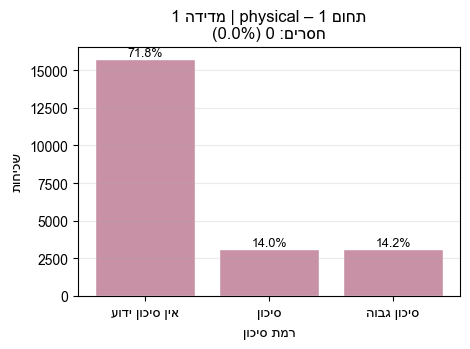

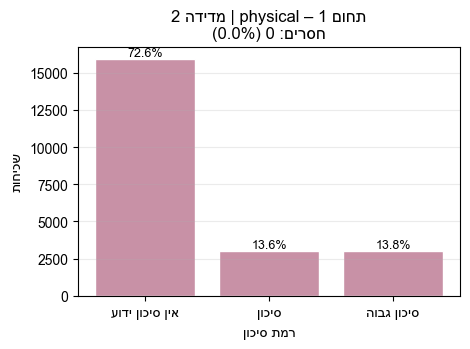

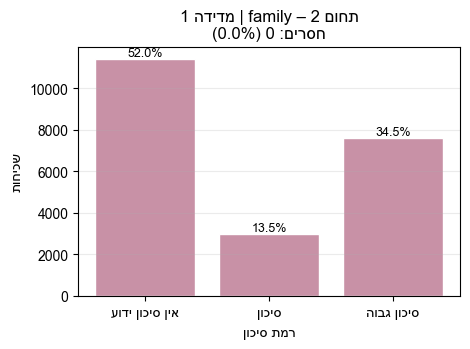

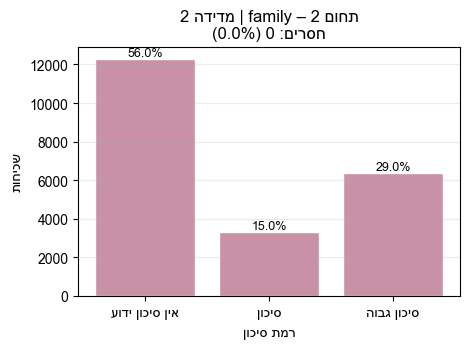

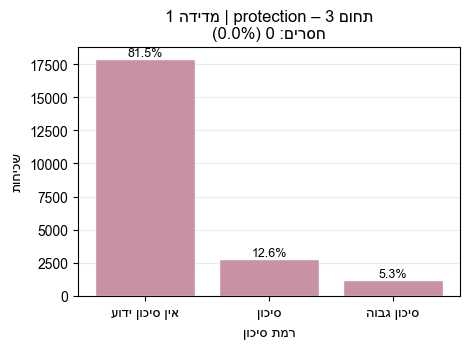

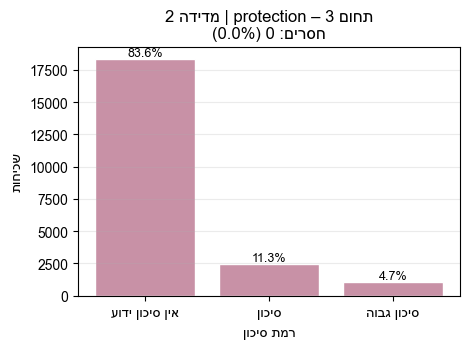

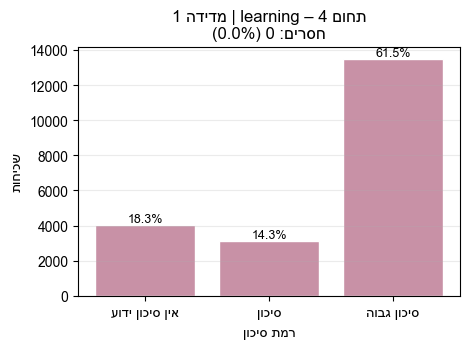

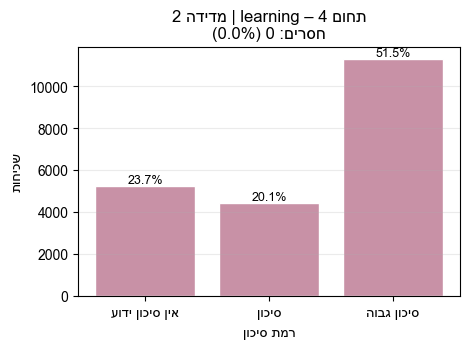

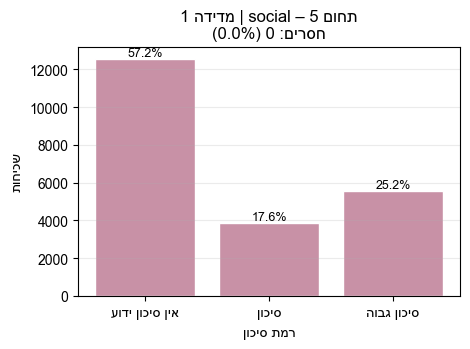

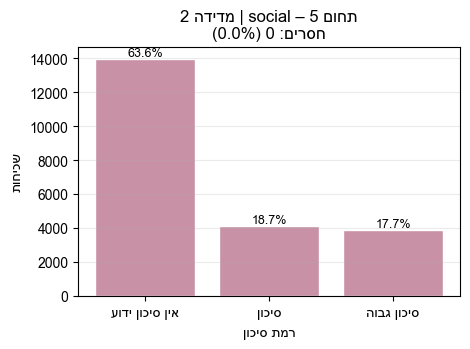

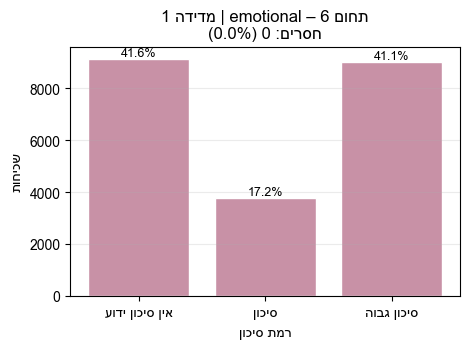

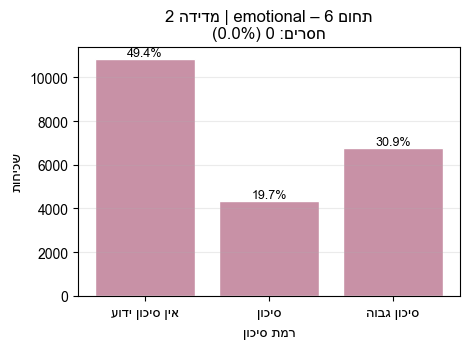

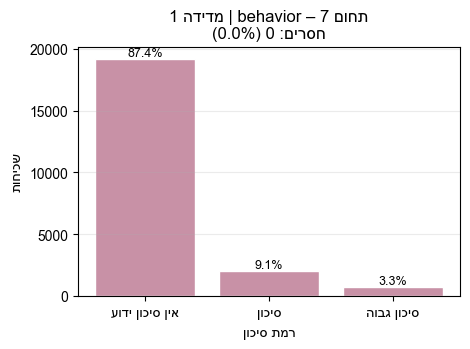

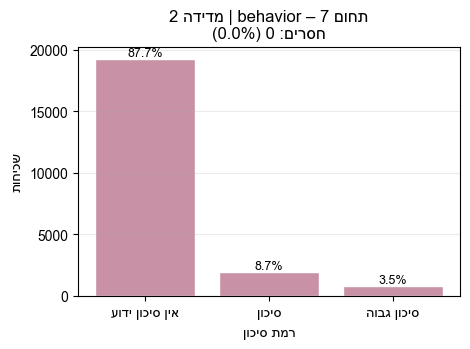

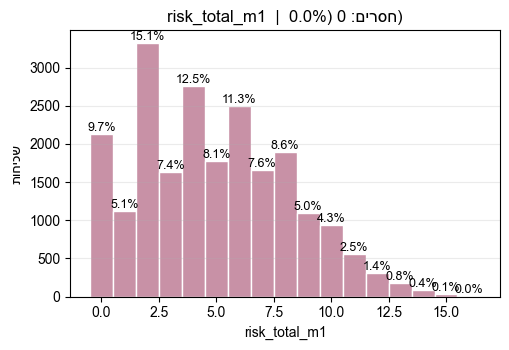

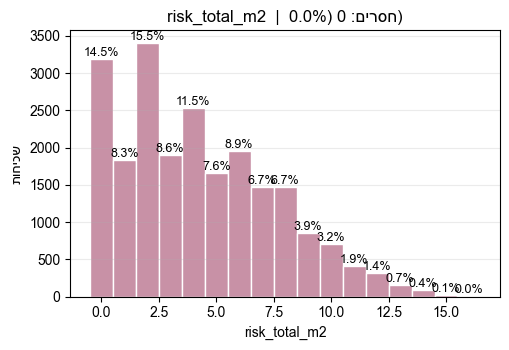

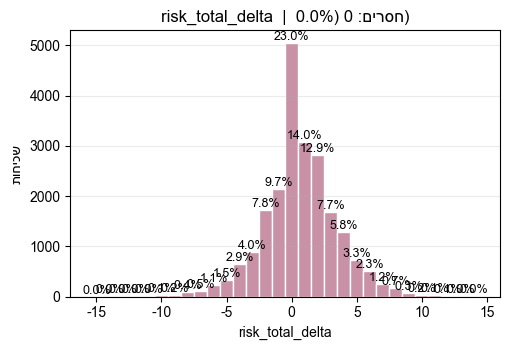

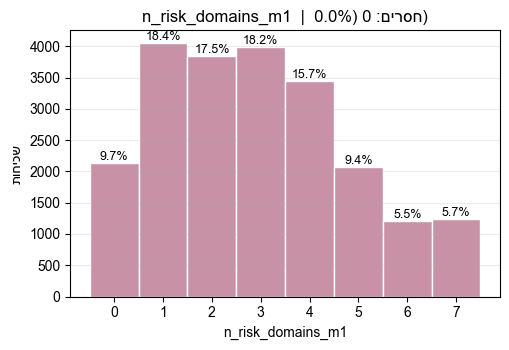

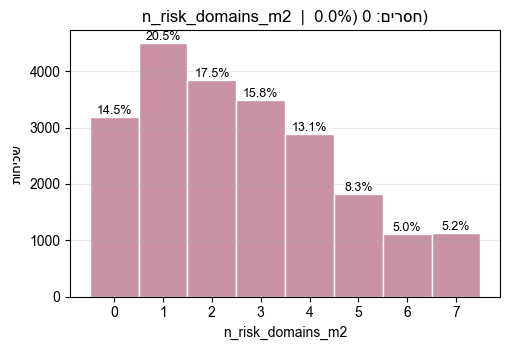

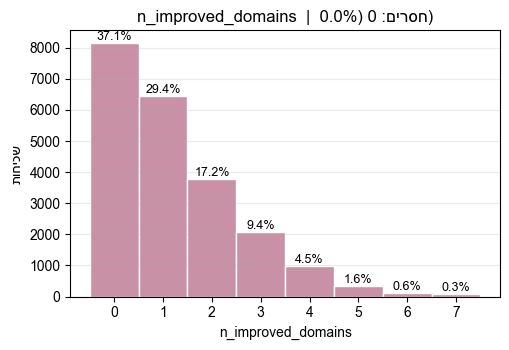

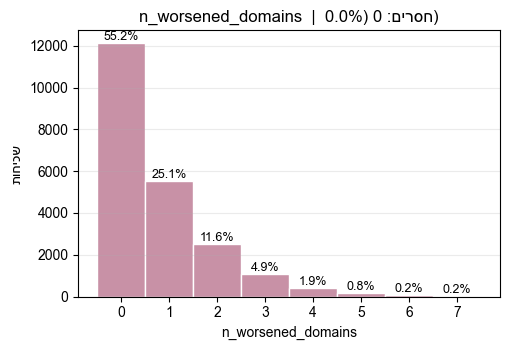


📋 אחוז חסרים (גבוהים → נמוכים):


,אחוז חסרים (%)
risk_area1_physical_level_m1,0.0
risk_area1_physical_level_m2,0.0
risk_area2_family_level_m1,0.0
risk_area2_family_level_m2,0.0
risk_area3_protection_level_m1,0.0
risk_area3_protection_level_m2,0.0
risk_area4_learning_level_m1,0.0
risk_area4_learning_level_m2,0.0
risk_area5_social_level_m1,0.0
risk_area5_social_level_m2,0.0



🖼️ קבצים נשמרו תחת: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions


In [29]:
# ===============================================================
# התפלגויות למשתני סיכון שנבנו (AREA + מדדים מאוחדים)
# עברית תקינה (bidi), אחוזים מעל העמודות, צבע ורוד, שמירה לקבצים
# ===============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from bidi.algorithm import get_display

# ---------- הגדרות כלליות ----------
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False

def heb(s): 
    return get_display(str(s))

SAVE = True  # True לשמירה לתיקייה
OUTDIR = Path("reports/figures/fe_distributions")
OUTDIR.mkdir(parents=True, exist_ok=True)

PINK = "#c891a6"   # ורוד עדין
GRID_ALPHA = 0.25

# שמות תחומים (כמו בבניה של ה-AREA)
AREA_NAMES = {
    1: "physical",
    2: "family",
    3: "protection",
    4: "learning",
    5: "social",
    6: "emotional",
    7: "behavior",
}

# ---------- בדיקה: אין 99 בעמודות הרמות ----------
area_level_cols = []
for k, nm in AREA_NAMES.items():
    area_level_cols += [f"risk_area{k}_{nm}_level_m1", f"risk_area{k}_{nm}_level_m2"]

bad_99 = [c for c in area_level_cols if c in df.columns and (df[c] == 99).any()]
if bad_99:
    print("⚠️ נמצאו ערכי 99 בעמודות (צריך להיות NaN):", bad_99)
else:
    print("✅ אין 99 בעמודות רמות התחום (כצפוי).")

# ---------- עוזרי ציור ----------
def _annotate_bar_percent(ax, x_vals, counts, total):
    for x, v in zip(x_vals, counts):
        pct = 0.0 if total == 0 else (v / total) * 100
        ax.text(x, v, f"{pct:.1f}%", ha="center", va="bottom", fontsize=9)

def plot_area_bar(series: pd.Series, title_he: str, fname: Path | None = None):
    total = int(series.shape[0])
    na = int(series.isna().sum())
    s = series.astype("float").dropna()

    # קטגוריות קבועות
    order = [0.0, 1.0, 2.0]
    counts = s.value_counts().reindex(order, fill_value=0).astype(int).values
    x_ticks = np.arange(len(order))
    labels = [heb("אין סיכון ידוע"), heb("סיכון"), heb("סיכון גבוה")]

    # יצירת התרשים
    fig, ax = plt.subplots(figsize=(4.8, 3.6))
    ax.bar(x_ticks, counts, color=PINK, edgecolor="white")

    # תוויות ציר X
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(labels, rotation=0, fontsize=10)

    # צירים וכותרת
    ax.set_xlabel(heb("רמת סיכון"))
    ax.set_ylabel(heb("שכיחות"))
    ax.set_title(heb(f"{title_he}\nחסרים: {na:,} ({(na/total*100):.1f}%)"))
    ax.grid(axis="y", alpha=GRID_ALPHA)

    # אחוזים מעל כל עמודה
    _annotate_bar_percent(ax, x_ticks, counts, total)

    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=160, bbox_inches="tight")
    plt.show()


def plot_hist(col: str, bins: int | None = None, fname: Path | None = None):
    x = pd.to_numeric(df[col], errors="coerce")
    total = int(x.shape[0]); na = int(x.isna().sum())
    x = x.dropna()

    # בניית סלילים לשלמים כך שכל ערך יקבל סל משלו
    if bins is None:
        if x.size > 0 and (x.round().eq(x)).all():
            mn, mx = int(x.min()), int(x.max())
            bins = np.arange(mn - 0.5, mx + 1.5, 1)
        else:
            bins = 20

    fig, ax = plt.subplots(figsize=(5.2, 3.6))
    n, bin_edges, _ = ax.hist(x, bins=bins, color=PINK, edgecolor="white")
    ax.set_title(heb(f"{col}  |  חסרים: {na:,} ({(na/total*100):.1f}%)"))
    ax.set_xlabel(heb(col))
    ax.set_ylabel(heb("שכיחות"))
    ax.grid(axis="y", alpha=GRID_ALPHA)

    # אחוזים מעל כל סל
    centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    _annotate_bar_percent(ax, centers, n, total)

    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=160, bbox_inches="tight")
    plt.show()

# ---------- ציור: תחומי AREA (עמודות 0/1/2) ----------
for k, nm in AREA_NAMES.items():
    for t in (1, 2):
        col = f"risk_area{k}_{nm}_level_m{t}"
        if col in df.columns:
            title_he = f"תחום {k} – {nm} | מדידה {t}"
            fpath = OUTDIR / f"area{k}_{nm}_level_m{t}.png" if SAVE else None
            plot_area_bar(df[col], title_he, fpath)

# ---------- ציור: מדדים מאוחדים (היסטוגרמות) ----------
to_hist = [
    "risk_total_m1","risk_total_m2","risk_total_delta",
    "n_risk_domains_m1","n_risk_domains_m2",
    "n_improved_domains","n_worsened_domains"
]
to_hist = [c for c in to_hist if c in df.columns]

for c in to_hist:
    fpath = OUTDIR / f"{c}_hist.png" if SAVE else None
    plot_hist(c, fname=fpath)

# ---------- דוח חסרים קצר ----------
all_cols = [c for c in (area_level_cols + to_hist) if c in df.columns]
miss = (df[all_cols].isna().mean().mul(100).round(1)
        .sort_values(ascending=False).rename("אחוז חסרים (%)"))
print("\n📋 אחוז חסרים (גבוהים → נמוכים):")
display(miss.to_frame().head(20))

if SAVE:
    print(f"\n🖼️ קבצים נשמרו תחת: {OUTDIR.resolve()}")


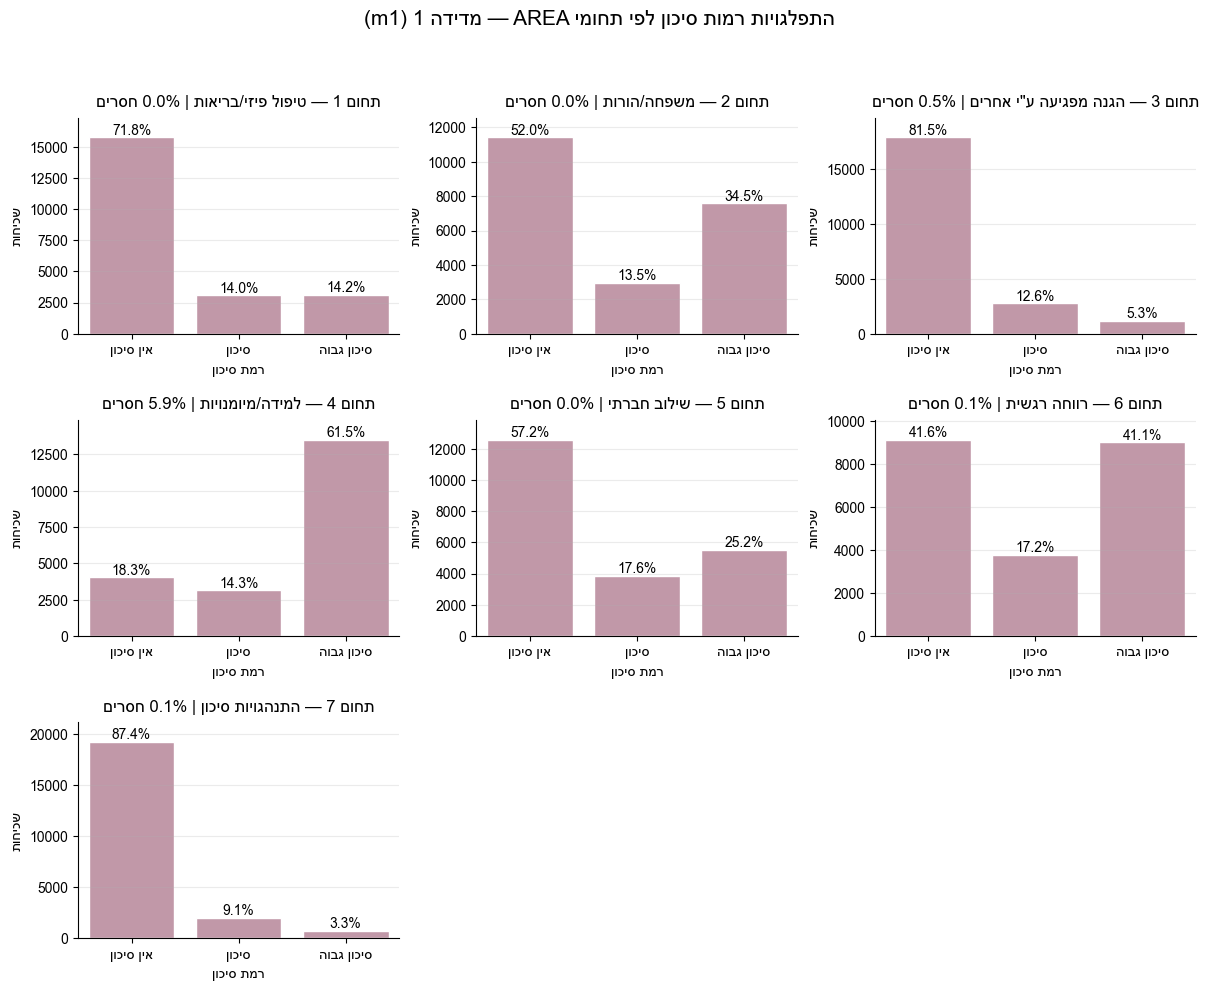

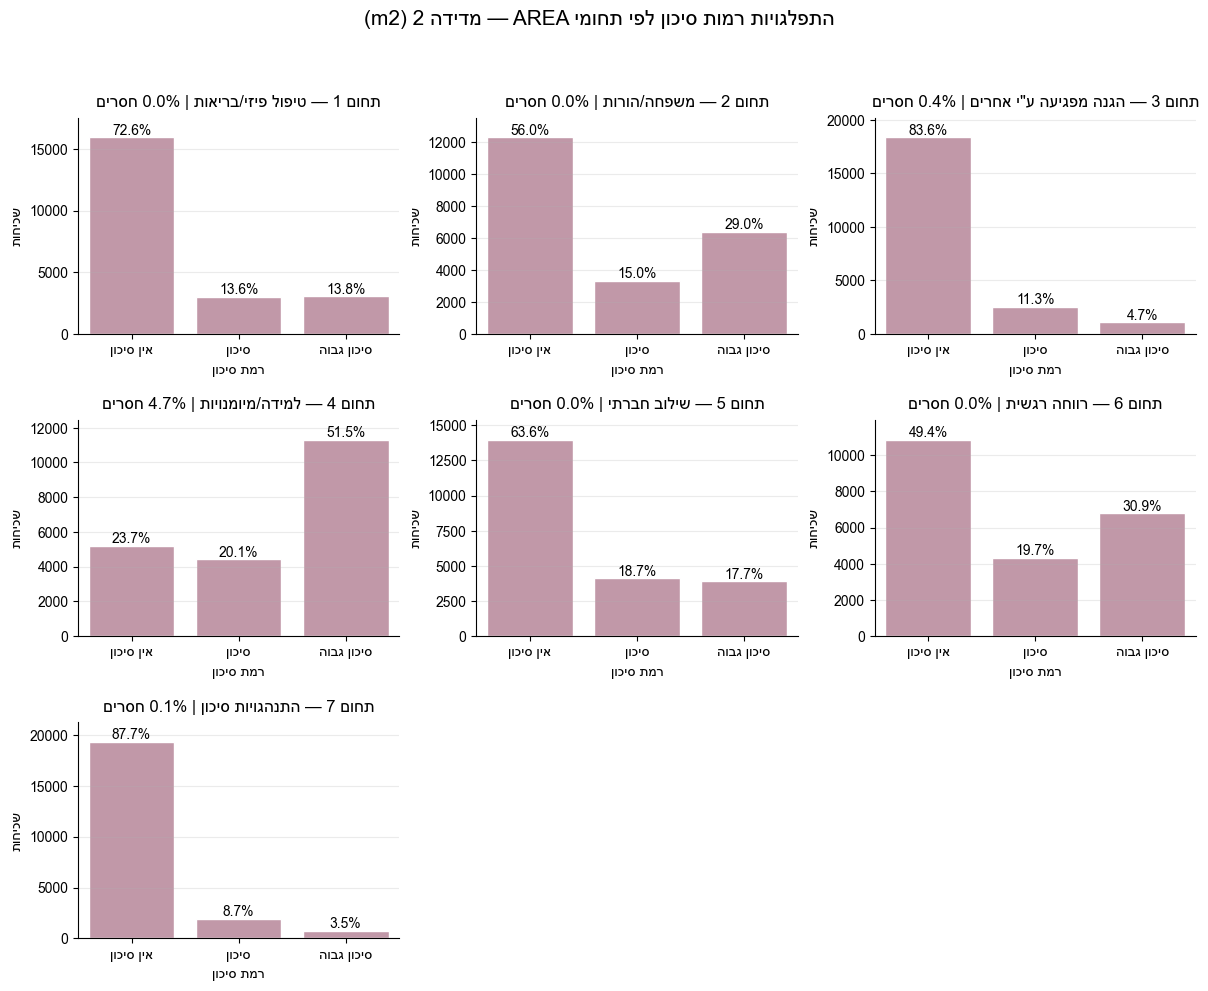

✅ FacetGrid נוצר. קבצים נשמרו אל: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions


In [30]:
# ===============================================================
# FacetGrid: כל תחומי ה-AREA בעמוד אחד (ל-M1 ול-M2 בנפרד)
# - עמודות 0/1/2 לכל תחום
# - אחוזים מעל כל עמודה
# - עברית (bidi)
# ===============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from bidi.algorithm import get_display
from pathlib import Path

plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
heb = lambda s: get_display(str(s))
SAVE = True
OUTDIR = Path("reports/figures/fe_distributions")
OUTDIR.mkdir(parents=True, exist_ok=True)

AREA_NAMES = {
    1: "physical",
    2: "family",
    3: "protection",
    4: "learning",
    5: "social",
    6: "emotional",
    7: "behavior",
}

# ---------- 1) הפיכה ל-Long form ----------
def build_long(df, t: int) -> pd.DataFrame:
    rows = []
    for k, nm in AREA_NAMES.items():
        col = f"risk_area{k}_{nm}_level_m{t}"
        if col in df.columns:
            s = pd.to_numeric(df[col], errors="coerce")
            tmp = pd.DataFrame({
                "area_id": k,
                "area_name": nm,
                "level": s,   # 0/1/2 או NaN
                "time": f"m{t}"
            })
            rows.append(tmp)
    if not rows:
        return pd.DataFrame(columns=["area_id","area_name","level","time"])
    long = pd.concat(rows, ignore_index=True)
    # לשמר סדר 0/1/2 בפלוטים
    long["level"] = pd.Categorical(long["level"], categories=[0,1,2], ordered=True)
    return long

long_m1 = build_long(df, 1)
long_m2 = build_long(df, 2)

# ---------- 2) פונקציה לציור FacetGrid (מתוקן) ----------
PINK = "#c891a6"

AREA_NAMES_HE = {
    1: "טיפול פיזי/בריאות",
    2: "משפחה/הורות",
    3: "הגנה מפגיעה ע\"י אחרים",
    4: "למידה/מיומנויות",
    5: "שילוב חברתי",
    6: "רווחה רגשית",
    7: "התנהגויות סיכון",
}

def plot_facet(long_df: pd.DataFrame, t_label: str, fname: Path | None):
    if long_df.empty:
        print(f"לא נמצאו עמודות ל-{t_label}")
        return

    miss = (long_df.assign(is_na=long_df["level"].isna())
                    .groupby(["area_id","area_name"], as_index=False)["is_na"]
                    .mean())
    miss["na_pct"] = (miss["is_na"] * 100).round(1)

    total_per_area = long_df.groupby(["area_id","area_name"]).size().rename("N_total")
    data = long_df.dropna(subset=["level"]).copy()
    data = data.merge(total_per_area, on=["area_id","area_name"], how="left")

    # ❗ sharex=False כדי שכל הפאנלים יציגו תוויות X
    g = sns.FacetGrid(
        data,
        col="area_id", col_wrap=3, sharex=False, sharey=False,
        height=3.6, aspect=1.15, margin_titles=False
    )
    g.map_dataframe(
        sns.countplot, x="level", color=PINK, order=[0,1,2], edgecolor="white"
    )

    # אם רוצים שלא ייכתבו כותרות ברירת־מחדל — עושים זאת לפני הלולאה
    g.set_titles("")

    for (ax, (aid, sub)) in zip(g.axes.flatten(), data.groupby("area_id")):
        N = int(sub["N_total"].iloc[0]) if not sub.empty else 0
        na_row = miss.loc[miss["area_id"]==aid, "na_pct"]
        na_txt = f" | {na_row.iloc[0]}% חסרים" if len(na_row) else ""
        nm_he = AREA_NAMES_HE.get(aid, str(aid))

        # כותרת לכל פאנל (לא תמחק כי כבר קראנו set_titles קודם)
        ax.set_title(heb(f"תחום {aid} — {nm_he}{na_txt}"), fontsize=12, pad=8)

        # אחוזים מעל עמודות
        counts = sub["level"].value_counts().reindex([0,1,2], fill_value=0).values
        xs = np.arange(3)
        for x, v in zip(xs, counts):
            pct = 0 if N == 0 else (v / N) * 100
            ax.text(x, v, f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

        # תוויות X בעברית לכל פאנל + ודא שמוצגות
        ax.set_xticks([0,1,2])
        ax.set_xticklabels([heb("אין סיכון"), heb("סיכון"), heb("סיכון גבוה")], fontsize=10)
        ax.tick_params(axis="x", labelbottom=True, pad=3)

        ax.set_xlabel(heb("רמת סיכון"))
        ax.set_ylabel(heb("שכיחות"))
        ax.grid(axis="y", alpha=0.25)
        ax.margins(y=0.10)

    g.fig.suptitle(heb(f"התפלגויות רמות סיכון לפי תחומי AREA — {t_label}"), fontsize=15)
    g.fig.subplots_adjust(top=0.88, bottom=0.12, left=0.08, right=0.98, hspace=0.40, wspace=0.24)

    if fname:
        g.savefig(fname, dpi=150, bbox_inches="tight")
    plt.show()

# ---------- 3) יצירה ושמירה ----------
plot_facet(long_m1, "מדידה 1 (m1)", OUTDIR / "facet_areas_m1.png" if SAVE else None)
plot_facet(long_m2, "מדידה 2 (m2)", OUTDIR / "facet_areas_m2.png" if SAVE else None)

print("✅ FacetGrid נוצר. קבצים נשמרו אל:", OUTDIR.resolve() if SAVE else "—")


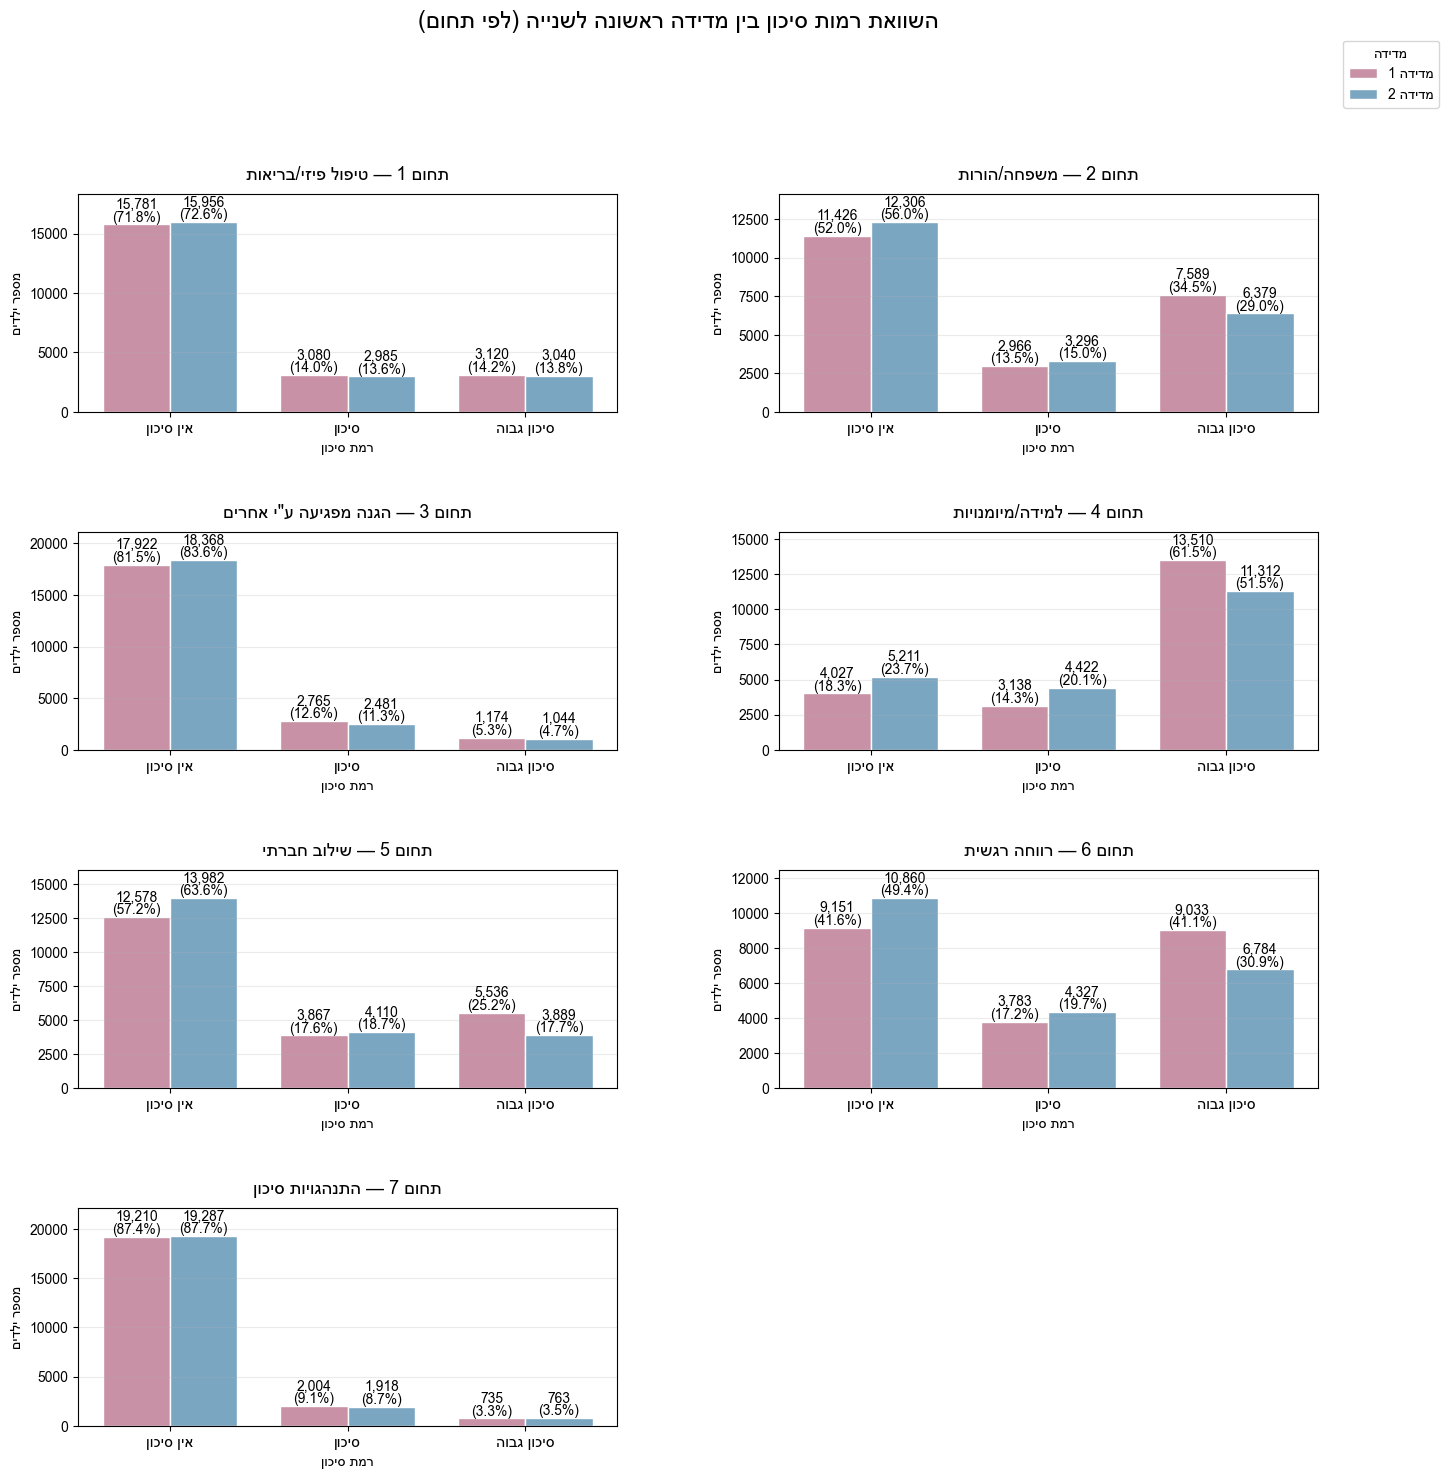

✅ נשמר: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions\facet_areas_side_by_side_m1_m2_large.png


In [31]:
# ===============================================================
# AREA — ציור יציב (2 גרפים בשורה, גדולים ומרווחים)
# ===============================================================
import numpy as np, matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from bidi.algorithm import get_display
heb = lambda s: get_display(str(s))

PINK, BLUE = "#c891a6", "#7aa6c2"
levels    = [0, 1, 2]
hue_order = ["מדידה 1", "מדידה 2"]

def plot_areas_matplotlib(agg: pd.DataFrame, title: str, fname=None):
    if agg.empty:
        print("⚠️ אין נתונים להצגה.")
        return

    areas = sorted(agg["area_id"].unique())
    n = len(areas)

    # --- שינוי מרכזי: 2 עמודות במקום 3 ---
    ncols, nrows = 2, int(np.ceil(n / 2))
    fig = plt.figure(figsize=(16, 16))  # היה (16,9)
    gs = GridSpec(nrows, ncols, figure=fig, wspace=0.30, hspace=0.55)

    handles = [Patch(facecolor=PINK, edgecolor="white", label=heb("מדידה 1")),
               Patch(facecolor=BLUE, edgecolor="white", label=heb("מדידה 2"))]

    for i, aid in enumerate(areas):
        ax = fig.add_subplot(gs[i // ncols, i % ncols])
        sub = agg[agg["area_id"] == aid].copy()

        # טבלת pivot
        pv_count = (sub.pivot(index="level", columns="time", values="count")
                        .reindex(levels).reindex(hue_order, axis=1).fillna(0).astype(int))
        pv_pct   = (sub.pivot(index="level", columns="time", values="percent")
                        .reindex(levels).reindex(hue_order, axis=1).fillna(0.0).astype(float))

        x = np.arange(len(levels), dtype=float)
        w = 0.38

        bars1 = ax.bar(x - w/2, pv_count[hue_order[0]].to_numpy(), width=w,
                       color=PINK, edgecolor="white")
        bars2 = ax.bar(x + w/2, pv_count[hue_order[1]].to_numpy(), width=w,
                       color=BLUE, edgecolor="white")

        # --- אנוטציות: מספר + אחוז ---
        for bars, col in [(bars1, hue_order[0]), (bars2, hue_order[1])]:
            for j, b in enumerate(bars):
                cnt = int(pv_count.iloc[j][col])
                pct = float(pv_pct.iloc[j][col])
                if cnt > 0:
                    ax.text(b.get_x() + b.get_width()/2, b.get_height(),
                            f"{cnt:,}\n({pct:.1f}%)",
                            ha="center", va="bottom", fontsize=10, linespacing=0.9)

        # --- עיצוב ---
        nm_he = sub["area_name_he"].iloc[0]
        ax.set_title(heb(f"תחום {aid} — {nm_he}"), fontsize=13, pad=10)
        ax.set_xticks(x, [heb("אין סיכון"), heb("סיכון"), heb("סיכון גבוה")], fontsize=11)
        ax.set_xlabel(heb("רמת סיכון"))
        ax.set_ylabel(heb("מספר ילדים"))
        ymax = max(ax.get_ylim()[1], (pv_count.values.max() if pv_count.values.size else 1)*1.15)
        ax.set_ylim(0, ymax)
        ax.grid(axis="y", alpha=0.25)
        ax.margins(y=0.08)

    # --- מקרא למעלה־ימין ---
    fig.legend(handles=handles,
               labels=[heb("מדידה 1"), heb("מדידה 2")],
               title=heb("מדידה"),
               loc="upper right",
               bbox_to_anchor=(0.98, 0.98),
               frameon=True)

    fig.suptitle(heb(title), fontsize=17, y=0.995)
    fig.tight_layout(rect=[0.03, 0.03, 0.93, 0.95])

    if fname:
        fig.savefig(fname, dpi=100, bbox_inches="tight")
    plt.show()
    
# --- בניית agg מתוך עמודות ה-AREA שכבר חישבת ב-df ---
rows = []
for k, nm in AREA_NAMES.items():  # AREA_NAMES כבר מוגדר בתא החישוב
    for t, tlabel in [(1, "מדידה 1"), (2, "מדידה 2")]:
        col = f"risk_area{k}_{nm}_level_m{t}"
        if col in df.columns:
            s = pd.to_numeric(df[col], errors="coerce")  # 0/1/2 או NaN
            rows.append(pd.DataFrame({
                "area_id": k,
                "area_name_he": {  # שם עברי לפאנל; התאימי אם יש לך מילון מוכן
                    1: "טיפול פיזי/בריאות",
                    2: "משפחה/הורות",
                    3: "הגנה מפגיעה ע\"י אחרים",
                    4: "למידה/מיומנויות",
                    5: "שילוב חברתי",
                    6: "רווחה רגשית",
                    7: "התנהגויות סיכון",
                }[k],
                "time": tlabel,
                "level": s
            }))

long = pd.concat(rows, ignore_index=True)
agg = (long.dropna(subset=["level"])
           .assign(level=lambda d: d["level"].astype(int))
           .groupby(["area_id","area_name_he","time","level"], dropna=False)
           .size().rename("count").reset_index())
agg["percent"] = (agg["count"] / agg.groupby(["area_id","time"])["count"].transform("sum") * 100).round(1)

# --- הרצה ---
plot_areas_matplotlib(
    agg,
    title="השוואת רמות סיכון בין מדידה ראשונה לשנייה (לפי תחום)",
    fname=OUTDIR / "facet_areas_side_by_side_m1_m2_large.png" if SAVE else None
)

print(f"✅ נשמר: {(OUTDIR / 'facet_areas_side_by_side_m1_m2_large.png').resolve()}")


מתוך התרשימים עולה רמות סיכון גבוהות יחסית בתחום הלמידה והמיומנויות, אחריו רווחה רגשית ואחריו משפחה ושילוב חברתי. בכולם חל שיפור בשיעורי הילדים עם סיכון גבוה ועלו שיעורי הילדים ללא סיכון 

In [32]:
# ===============================================================
# טבלת התפלגות רמות סיכון לפי תחום ולפי מדידה (מספרים + אחוזים)
# ===============================================================
import pandas as pd, numpy as np

AREA_NAMES    = {1:"physical",2:"family",3:"protection",4:"learning",5:"social",6:"emotional",7:"behavior"}
AREA_NAMES_HE = {
    1:"טיפול פיזי/בריאות", 2:"משפחה/הורות", 3:"הגנה מפגיעה ע\"י אחרים",
    4:"למידה/מיומנויות", 5:"שילוב חברתי", 6:"רווחה רגשית", 7:"התנהגויות סיכון"
}

LEVELS = [0, 1, 2]
LEVELS_HE = {0:"אין סיכון", 1:"סיכון", 2:"סיכון גבוה"}

rows = []
for k, nm in AREA_NAMES.items():
    for t, lbl in [(1,"מדידה 1"), (2,"מדידה 2")]:
        col = f"risk_area{k}_{nm}_level_m{t}"
        if col not in df.columns:
            continue
        s = pd.to_numeric(df[col], errors="coerce")
        n = s.notna().sum()
        vc = s.value_counts().reindex(LEVELS, fill_value=0).astype(int)
        for lv in LEVELS:
            count = vc.loc[lv]
            pct   = (count / n * 100) if n else 0
            rows.append({
                "מספר תחום": k,
                "שם תחום": AREA_NAMES_HE[k],
                "מדידה": lbl,
                "רמת סיכון": LEVELS_HE[lv],
                "מספר ילדים": count,
                "אחוז מתוך המדידה": round(pct, 1)
            })

risk_table = pd.DataFrame(rows)

# סידור וקריאה יפה
risk_table = (
    risk_table
    .sort_values(["מספר תחום","מדידה","רמת סיכון"], ascending=[True, True, True])
    .reset_index(drop=True)
)

pd.set_option("display.max_rows", None)
display(risk_table)

# שמירה אופציונלית
risk_table.to_excel("reports/tables/risk_distribution_m1_m2.xlsx", index=False, engine="openpyxl")
print("✅ טבלת התפלגות נשמרה אל: reports/tables/risk_distribution_m1_m2.xlsx")


,מספר תחום,שם תחום,מדידה,רמת סיכון,מספר ילדים,אחוז מתוך המדידה
0,1,טיפול פיזי/בריאות,מדידה 1,אין סיכון,15781,71.8
1,1,טיפול פיזי/בריאות,מדידה 1,סיכון,3080,14.0
2,1,טיפול פיזי/בריאות,מדידה 1,סיכון גבוה,3120,14.2
3,1,טיפול פיזי/בריאות,מדידה 2,אין סיכון,15956,72.6
4,1,טיפול פיזי/בריאות,מדידה 2,סיכון,2985,13.6
5,1,טיפול פיזי/בריאות,מדידה 2,סיכון גבוה,3040,13.8
6,2,משפחה/הורות,מדידה 1,אין סיכון,11426,52.0
7,2,משפחה/הורות,מדידה 1,סיכון,2966,13.5
8,2,משפחה/הורות,מדידה 1,סיכון גבוה,7589,34.5
9,2,משפחה/הורות,מדידה 2,אין סיכון,12306,56.0


✅ טבלת התפלגות נשמרה אל: reports/tables/risk_distribution_m1_m2.xlsx


כמעט בכל התחומים יש ירידה מסוימת בשיעור הילדים בסיכון גבוה ועלייה מקבילה בקטגוריית “אין סיכון”, כלומר שיפור כללי ברמות הסיכון בין שתי המדידות.

## מספר תחומי הסיכון לילד

כמות            אחוז        
מדידה             1 הדידמ 2 הדידמ 1 הדידמ 2 הדידמ
מספר תחומי הסיכון                                
0                  2130.0  3194.0     9.7    14.5
1                  4051.0  4503.0    18.4    20.5
2                  3847.0  3851.0    17.5    17.5
3                  3992.0  3483.0    18.2    15.8
4                  3446.0  2884.0    15.7    13.1
5                  2068.0  1825.0     9.4     8.3
6                  1202.0  1105.0     5.5     5.0
7                  1245.0  1136.0     5.7     5.2

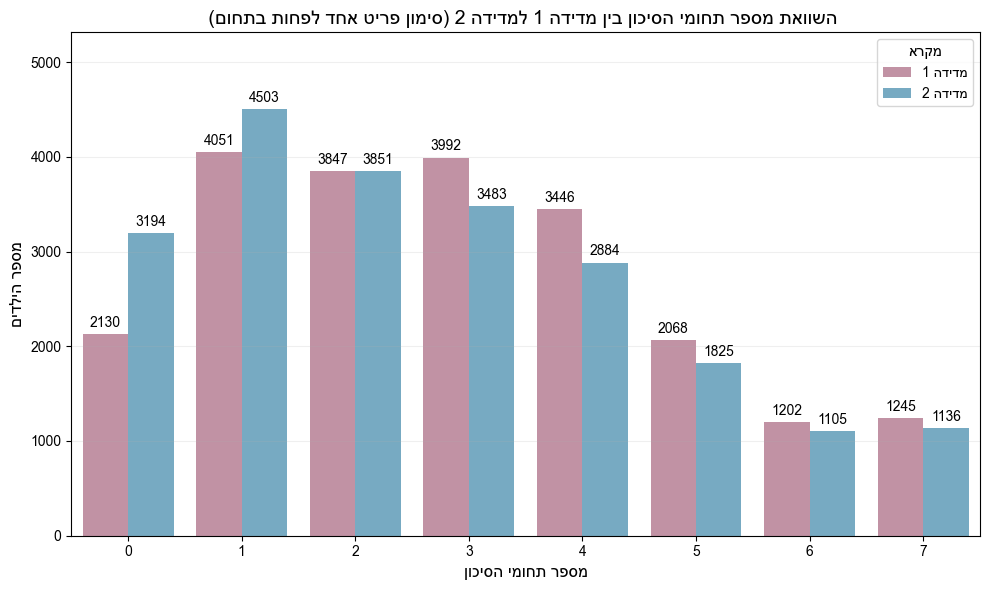

In [33]:
# התפלגות מספר התחומים של הסיכון לילד בכל מדידה

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from bidi.algorithm import get_display
heb = lambda s: get_display(str(s))

# 1) אימות קיום העמודות
req = ["n_risk_domains_m1", "n_risk_domains_m2"]
assert all(c in df.columns for c in req), f"חסרה אחת העמודות: {req}"

# 2) טבלת שכיחויות ואחוזים (0–7) לכל מדידה, באותו מבנה
cats = pd.Index(range(8), name="מספר תחומי הסיכון")

c1 = df["n_risk_domains_m1"].value_counts(dropna=True).reindex(cats, fill_value=0)
c2 = df["n_risk_domains_m2"].value_counts(dropna=True).reindex(cats, fill_value=0)

tab = pd.DataFrame({
    "מספר תחומי הסיכון": np.tile(cats, 2),
    "מדידה": np.repeat([heb("מדידה 1"), heb("מדידה 2")], len(cats)),
    "כמות":  np.r_[c1.values, c2.values]
})
tab["אחוז"] = tab.groupby("מדידה")["כמות"].transform(lambda x: x / x.sum() * 100).round(1)

# להצגה/בדיקה נוחה
risk_domains_summary = tab.pivot(index="מספר תחומי הסיכון", columns="מדידה", values=["כמות","אחוז"])
display(risk_domains_summary)

# 3) ציור גרף אחד — שתי המדידות זו לצד זו
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=tab, x="מספר תחומי הסיכון", y="כמות", hue="מדידה",
    palette=["#c98aa2", "#6aaecf"]  # ורוד/כחול כמו בתמונה השנייה
)

# תוויות: מספר + אחוז מעל שתי הסדרות
for container in ax.containers:
    lab_df = tab[tab["מדידה"] == container.get_label()]
    labels = [f"{v:,}\n({p:.1f}%)" for v, p in zip(lab_df["כמות"], lab_df["אחוז"])]
    ax.bar_label(container, labels=labels, padding=3, fontsize=10)

# כותרות, צירים, מקרא
plt.title(heb("  השוואת מספר תחומי הסיכון בין מדידה 1 למדידה 2 (סימון פריט אחד לפחות בתחום) "), fontsize=14)
plt.xlabel(heb("מספר תחומי הסיכון"), fontsize=12)
plt.ylabel(heb("מספר הילדים"), fontsize=12)
plt.legend(title=heb("מקרא"), loc="upper right", fontsize=10, title_fontsize=11)

plt.grid(axis="y", alpha=0.2)
plt.ylim(0, tab["כמות"].max() * 1.18)  # ריווח עליון נוח
plt.tight_layout()
plt.show()

# 4) (רשות) שמירה לקובץ
# out = Path("reports/figures/n_risk_domains_m1_m2.png")
# out.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(out, dpi=200, bbox_inches="tight")


## 2) Compute Child Age at Start of Intervention (child_age_start)

In [34]:
# ------------------------------------------------------------
# Logic:
#   - child_age_start = form_year_m1 - birth_year_m1
#   - If result < 0 or > 25 → set to NaN (invalid or implausible)
#   - Data type: Int16
# ============================================================

import numpy as np
import pandas as pd

# Ensure required columns exist
required_cols = {"form_year_m1", "birth_year_m1"}
if required_cols.issubset(df.columns):

    # --- Compute age in years ---
    # Example: form_year_m1 = 2023, birth_year_m1 = 2017 → child_age_start = 6
    df["child_age_start"] = (df["form_year_m1"] - df["birth_year_m1"]).astype("Int16")

    # --- Handle invalid values ---
    # Negative or too high ages (e.g., >25) are likely data entry errors
    bad_age = (df["child_age_start"] < 0) | (df["child_age_start"] > 25)
    if bad_age.any():
        print(f"⚠️ Found {bad_age.sum():,} invalid values (<0 or >25). Replaced with NaN.")
        df.loc[bad_age, "child_age_start"] = np.nan

    # --- Quick validation summary ---
    print("\n✅ New variable created: child_age_start")
    print(df["child_age_start"].describe().round(1))

else:
    print("❌ Required columns not found in the DataFrame:", required_cols)


⚠️ Found 3 invalid values (<0 or >25). Replaced with NaN.

✅ New variable created: child_age_start
count    21978.0
mean         7.7
std          4.5
min          0.0
25%          4.0
50%          7.0
75%         11.0
max         25.0
Name: child_age_start, dtype: Float64


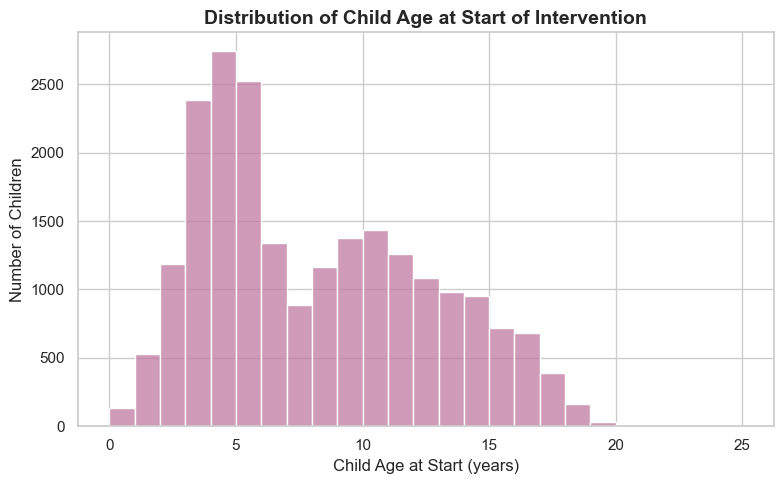

In [35]:
# ============================================================
# 2b) Visualize Distribution of Child Age at Start (Histogram)
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# --- Plot histogram ---
sns.histplot(
    data=df,
    x="child_age_start",
    bins=25,
    color="#c07aa1",    # lilac tone (fits your palette)
    edgecolor="white"
)

# --- Add styling ---
plt.title("Distribution of Child Age at Start of Intervention", fontsize=14, weight="bold")
plt.xlabel("Child Age at Start (years)", fontsize=12)
plt.ylabel("Number of Children", fontsize=12)
plt.tight_layout()

# --- Optional save ---
plt.savefig("reports/figures/child_age_start_histogram.png", dpi=300, bbox_inches="tight")

plt.show()


## בניית משתנה משך ההתערבות

In [36]:
cols = ["form_day_m1", "form_day_m2"]

for c in cols:
    if c not in df.columns:
        print(f"❌ העמודה '{c}' לא נמצאה ב־DataFrame.")
        continue
    
    total = len(df)
    missing = df[c].isna().sum()
    unique = df[c].nunique(dropna=True)
    
    print(f"\n🗓️ {c}:")
    print(f"   • סך הכל רשומות: {total:,}")
    print(f"   • חסרים (NaN): {missing:,} ({missing/total:.1%})")
    print(f"   • ערכים ייחודיים: {unique:,}")



🗓️ form_day_m1:
   • סך הכל רשומות: 21,981
   • חסרים (NaN): 0 (0.0%)
   • ערכים ייחודיים: 302

🗓️ form_day_m2:
   • סך הכל רשומות: 21,981
   • חסרים (NaN): 0 (0.0%)
   • ערכים ייחודיים: 299


In [37]:
# ===============================================================
# משך ההתערבות: ימים / חודשים / קבוצות טווח
# דרישות: form_day_m1, form_day_m2 (datetime64)
# ===============================================================
import pandas as pd, numpy as np

df = df.copy()

# המרת תאריכים אם טרם הומרו
for c in ["form_day_m1", "form_day_m2"]:
    if not np.issubdtype(df[c].dtype, np.datetime64):
        df[c] = pd.to_datetime(df[c], errors="coerce")

# חישוב ימים וחודשים
df["intervention_days"] = (df["form_day_m2"] - df["form_day_m1"]).dt.days
df["intervention_months"] = (df["intervention_days"] / 30.44).round(2)

# הגדרת קבוצות טווח לפי חודשים
bins = [-np.inf, 6, 9, 12, np.inf]
labels = [
    "עד חצי שנה",
    "חצי שנה עד תשעה חודשים",
    "תשעה חודשים עד שנה",
    "מעל שנה"
]
df["intervention_length_group"] = pd.cut(df["intervention_months"], bins=bins, labels=labels, right=True)

# ===============================================================
# בדיקות תקינות והתפלגות
# ===============================================================
print("📊 סיכום ערכים ב-intervention_days:")
display(df["intervention_days"].describe())

# ערכים שליליים או אפסיים (אם בכלל)
neg = (df["intervention_days"] < 0).sum()
zero = (df["intervention_days"] == 0).sum()
missing = df["intervention_days"].isna().sum()
print(f"🔹 שליליים: {neg} | אפסיים: {zero} | חסרים: {missing}")

# התפלגות קבוצות טווח
print("\n📈 התפלגות לפי קבוצות משך ההתערבות (בחודשים):")
display(df["intervention_length_group"].value_counts(dropna=False)
        .rename_axis("קבוצת טווח")
        .reset_index(name="מספר ילדים")
        .assign(אחוזים=lambda x: (x["מספר ילדים"]/x["מספר ילדים"].sum()*100).round(1))
       )

# דוגמה ל-5 רשומות ראשונות
print("\n🔍 דוגמה לנתונים הראשונים:")
display(df[["form_day_m1", "form_day_m2", "intervention_days", "intervention_months", "intervention_length_group"]].head())


📊 סיכום ערכים ב-intervention_days:


count    21981.000000
mean       190.264410
std         79.633038
min         60.000000
25%        142.000000
50%        176.000000
75%        219.000000
max        466.000000
Name: intervention_days, dtype: float64

🔹 שליליים: 0 | אפסיים: 0 | חסרים: 0

📈 התפלגות לפי קבוצות משך ההתערבות (בחודשים):


,קבוצת טווח,מספר ילדים,אחוזים
0,עד חצי שנה,12351,56.2
1,חצי שנה עד תשעה חודשים,6391,29.1
2,תשעה חודשים עד שנה,2334,10.6
3,מעל שנה,905,4.1



🔍 דוגמה לנתונים הראשונים:


,form_day_m1,form_day_m2,intervention_days,intervention_months,intervention_length_group
0,2023-12-28,2024-06-16,171,5.62,עד חצי שנה
1,2023-10-23,2024-12-04,408,13.40,מעל שנה
2,2024-01-21,2024-06-18,149,4.89,עד חצי שנה
3,2023-07-12,2024-05-22,315,10.35,תשעה חודשים עד שנה
4,2023-12-14,2024-09-06,267,8.77,חצי שנה עד תשעה חודשים


,קבוצה,n,אחוזים
0,עד חצי שנה,12351,56.2%
1,חצי שנה עד תשעה חודשים,6391,29.1%
2,תשעה חודשים עד שנה,2334,10.6%
3,מעל שנה,905,4.1%


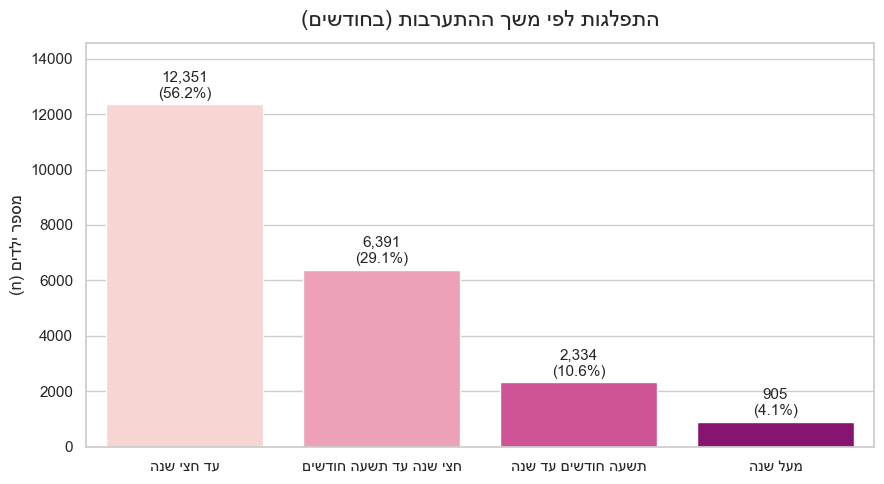

In [38]:
# ===============================================================
# תרשים התפלגות של משך ההתערבות (intervention_length_group)
# ===============================================================
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from bidi.algorithm import get_display as bidi

def heb(s):
    return bidi(str(s)) if pd.notna(s) else s

plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")

# --- נתונים ---
col = "intervention_length_group"
if col not in df.columns:
    raise KeyError(f"❌ העמודה '{col}' לא נמצאה ב-df")

order = [
    "עד חצי שנה",
    "חצי שנה עד תשעה חודשים",
    "תשעה חודשים עד שנה",
    "מעל שנה"
]

# בניית טבלה נקייה
s = df[col].astype("string").fillna("לא ידוע/חסר").replace("", "לא ידוע/חסר")
s = pd.Series(pd.Categorical(s, categories=order, ordered=True))
vc = s.value_counts(dropna=False).reindex(order, fill_value=0)

tbl = pd.DataFrame({"קבוצה": vc.index, "n": vc.values})
tbl = tbl.query("n > 0").reset_index(drop=True)
tbl["אחוזים"] = (tbl["n"] / tbl["n"].sum() * 100).round(1)

# --- הצגת טבלה ---
display(tbl.assign(אחוזים=tbl["אחוזים"].map(lambda x: f"{x:.1f}%")))

# --- תרשים ---
plt.figure(figsize=(9,5))
ax = sns.barplot(data=tbl, x="קבוצה", y="n", palette="RdPu")

# כותרת וציר-Y
ax.set_title(heb("התפלגות לפי משך ההתערבות (בחודשים)"), fontsize=16, pad=12)
ax.set_ylabel(heb("מספר ילדים (n)"), fontsize=12)
ax.set_xlabel("")

# תוויות X ב-RTL
ax.set_xticklabels([heb(x) for x in tbl["קבוצה"]], rotation=0, ha="center")

# מקום לכיתובים
ax.set_ylim(0, tbl["n"].max() * 1.18)

# טקסט דו-שורי מעל כל עמודה
for patch, (_, row) in zip(ax.patches, tbl.iterrows()):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    ax.text(
        x, y + (tbl["n"].max()*0.01),
        heb(f"{int(row['n']):,}\n({row['אחוזים']:.1f}%)"),
        ha="center", va="bottom", fontsize=11, family="Arial"
    )

plt.tight_layout()
plt.show()


מתוך התרשים עולה שביותר ממחצית מהמקרים ההתערבות במסגרת התוכנית נמשכה פרק זמן קצר־יחסית, של עד שישה חודשים.
כשליש מהילדים (29.1%, כ־6,391 ילדים) השתתפו בתוכנית לתקופה של חצי שנה עד תשעה חודשים, ושיעור קטן יחסית מהם המשיכו מעל 9 חודשים

## מדדי כוחות לפי תחומים

In [39]:
# ===============================================================
# Strengths (Personal / Interpersonal / Environmental)
# ===============================================================
import re
import numpy as np
import pandas as pd

MEASURE = 1          # 1 או 2 (m1 / m2)
METHOD  = "mean"     # "mean" או "sum" לכוחות

# --- עוזר: אחזור עמודות ST לפי אינדקסים (st1..st21) עם סיומת m{MEASURE}
def _st_cols(items):
    # משתמשים בפונקציה שלך אם הוגדרה:
    if "_pick_cols_by_index" in globals():
        return _pick_cols_by_index("st", items, suffix=f"_m{MEASURE}")
    # גיבוי פשוט אם לא:
    cols = []
    for i in items:
        rx = re.compile(rf"^st_?0*{i}(?:_|$).*_m{MEASURE}$", re.I)
        cols.extend([c for c in df.columns if rx.search(str(c))])
    return cols

# --- עוזר: אגרגציית פריטים (99 → NaN)
def _agg_items(items, method="mean"):
    cols = _st_cols(items)
    if not cols:
        return pd.Series(np.nan, index=df.index, dtype="Float32")
    sub = (df[cols]
           .apply(pd.to_numeric, errors="coerce")
           .replace(99, np.nan))
    if method == "sum":
        out = sub.sum(axis=1, min_count=1)
    else:
        out = sub.mean(axis=1)  # ממוצע פשוט של הפריטים התקפים
    return out.astype("Float32")

# --- יצירת משתני הכוחות (שמות סופיים) ---
df["personal_strengths"]       = _agg_items(range(1, 12),  method=METHOD)  # st1–st11
df["interpersonal_strengths"]  = _agg_items(range(12, 18), method=METHOD)  # st12–st17
df["environmental_strengths"]  = _agg_items(range(18, 22), method=METHOD)  # st18–st21

# --- סיכום קצר לוולידציה ---
print("✅ נוצרו משתני כוחות (מדידה m%d, method=%s)" % (MEASURE, METHOD))
print(df[["personal_strengths","interpersonal_strengths","environmental_strengths"]]
      .describe(include="all").T.round(3))


✅ נוצרו משתני כוחות (מדידה m1, method=mean)
                           count   mean    std   min   25%   50%   75%   max
personal_strengths       21921.0  0.566  0.337   0.0  0.25   0.5   0.9   1.0
interpersonal_strengths  21794.0  0.557  0.381   0.0   0.2   0.6   1.0   1.0
environmental_strengths      0.0   <NA>   <NA>  <NA>  <NA>  <NA>  <NA>  <NA>


In [40]:
# ===============================================================
# Build strengths_m1 / strengths_m2 (personal/interpersonal/environmental)
# ===============================================================
import re
import numpy as np
import pandas as pd

def _st_cols(items, m):
    """מחזיר את עמודות ST לפי אינדקסים (st1..st21) עם סיומת m{m}."""
    cols = []
    for i in items:
        rx = re.compile(rf"^st_?0*{i}(?:_|$).*_m{m}$", re.I)
        cols.extend([c for c in df.columns if rx.search(str(c))])
    return cols

def _agg_items(items, m, method="mean"):
    """99→NaN; mean (ברירת מחדל) או sum; מחזיר סדרה Float32."""
    cols = _st_cols(items, m)
    if not cols:
        return pd.Series(np.nan, index=df.index, dtype="Float32")
    sub = (df[cols]
           .apply(pd.to_numeric, errors="coerce")
           .replace(99, np.nan))
    out = sub.mean(axis=1) if method == "mean" else sub.sum(axis=1, min_count=1)
    return out.astype("Float32")

METHOD = "mean"  # ניתן לשנות ל-"sum" אם תרצי

# --- יצירת 6 העמודות הדרושות ---
df["personal_strengths_m1"]      = _agg_items(range(1, 12),  m=1, method=METHOD)   # st1–st11
df["personal_strengths_m2"]      = _agg_items(range(1, 12),  m=2, method=METHOD)

df["interpersonal_strengths_m1"] = _agg_items(range(12, 18), m=1, method=METHOD)   # st12–st17
df["interpersonal_strengths_m2"] = _agg_items(range(12, 18), m=2, method=METHOD)

df["environmental_strengths_m1"] = _agg_items(range(18, 22), m=1, method=METHOD)   # st18–st21
df["environmental_strengths_m2"] = _agg_items(range(18, 22), m=2, method=METHOD)

# בדיקת תקינות מהירה
print("✅ strengths_m1/m2 נוצרו.")
print(df[[
    "personal_strengths_m1","personal_strengths_m2",
    "interpersonal_strengths_m1","interpersonal_strengths_m2",
    "environmental_strengths_m1","environmental_strengths_m2"
]].describe().T.round(3))


✅ strengths_m1/m2 נוצרו.
                              count   mean    std   min   25%   50%   75%  \
personal_strengths_m1       21921.0  0.566  0.337   0.0  0.25   0.5   0.9   
personal_strengths_m2       21931.0  0.667  0.326   0.0   0.4  0.75   1.0   
interpersonal_strengths_m1  21794.0  0.557  0.381   0.0   0.2   0.6   1.0   
interpersonal_strengths_m2  21840.0  0.661  0.365   0.0   0.4  0.75   1.0   
environmental_strengths_m1      0.0   <NA>   <NA>  <NA>  <NA>  <NA>  <NA>   
environmental_strengths_m2      0.0   <NA>   <NA>  <NA>  <NA>  <NA>  <NA>   

                             max  
personal_strengths_m1        1.0  
personal_strengths_m2        1.0  
interpersonal_strengths_m1   1.0  
interpersonal_strengths_m2   1.0  
environmental_strengths_m1  <NA>  
environmental_strengths_m2  <NA>  


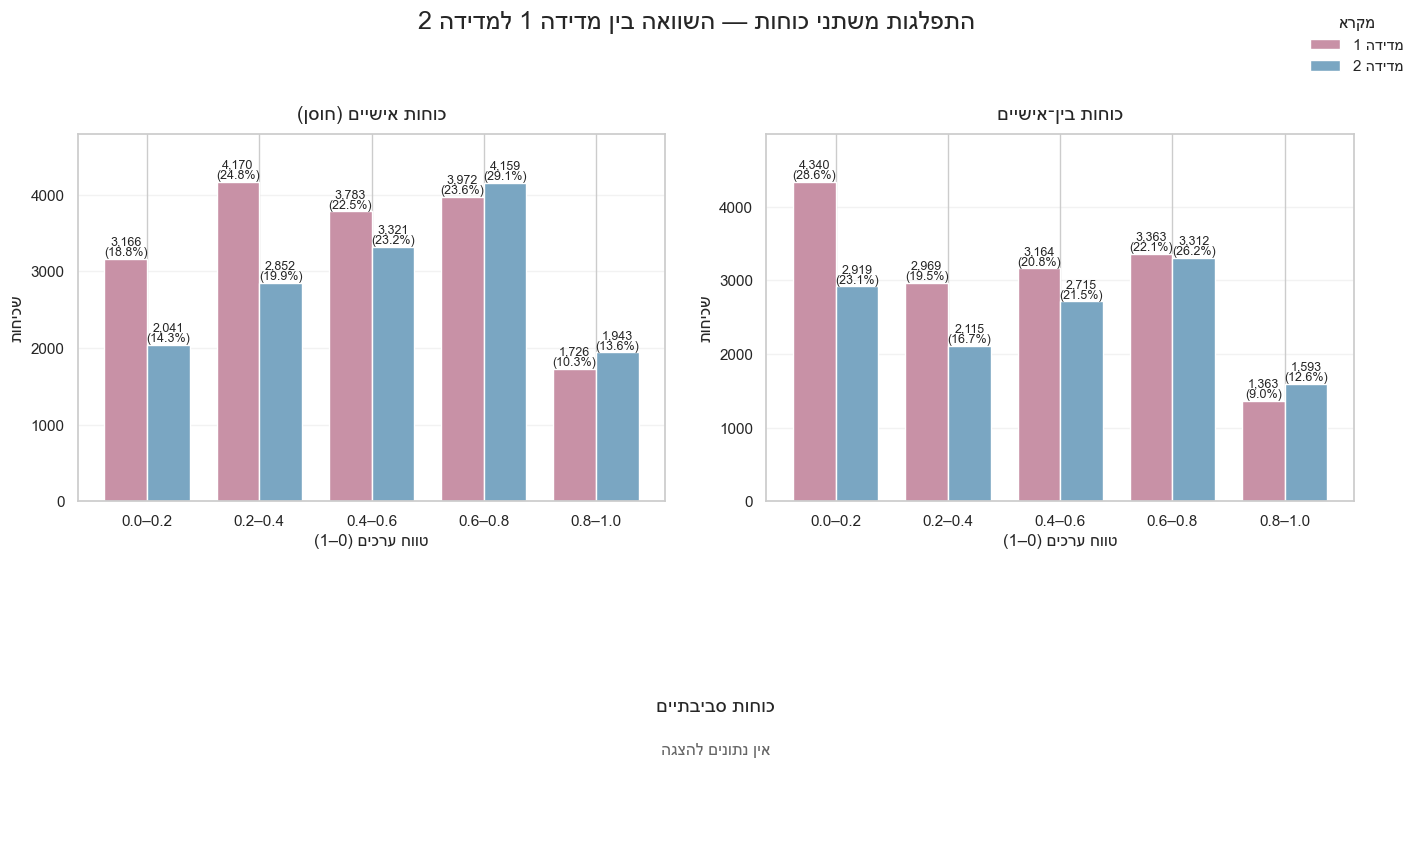

✅ נשמר: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions\strengths_m1_m2_grid.png


In [41]:
# ===============================================================
# Strengths — פריסה דו-שורתית: שני תחומים בשורה עליונה, אחד למטה
# (עמיד תקלות + הודעות אבחון כשעמודות חסרות)
# ===============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from bidi.algorithm import get_display
from pathlib import Path

heb = lambda s: get_display(str(s))
PINK, BLUE = "#c891a6", "#7aa6c2"
OUTDIR = Path("reports/figures/fe_distributions"); OUTDIR.mkdir(parents=True, exist_ok=True)

strength_vars = [
    ("personal_strengths",      "כוחות אישיים (חוסן)"),
    ("interpersonal_strengths", "כוחות בין־אישיים"),
    ("environmental_strengths", "כוחות סביבתיים"),
]

# --- bins קבועים 0–1 ---  
bins = np.linspace(0, 1, 6)
bin_labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# --- דיאגנוסטיקה: אילו עמודות זמינות? ---
needed = [f"{base}_m{m}" for base, _ in strength_vars for m in (1,2)]
missing = [c for c in needed if c not in df.columns]
if missing:
    print("⚠️ עמודות חסרות להשוואה m1/m2:", missing)

# --- בניית plot_df ---
rows = []
for base, label_he in strength_vars:
    for m in (1, 2):
        col = f"{base}_m{m}"
        if col not in df.columns:
            # נמשיך הלאה — נשלים פאנל ריק בהמשך אם שני המדידות חסרות
            continue

        s = pd.to_numeric(df[col], errors="coerce").dropna()
        # אם תחום לא נמדד (למשל סביבתי: כל הערכים 0) → 0% בכל הטווחים
        if s.empty or (s.nunique() == 1 and float(s.iloc[0]) == 0.0 and "סביבת" in label_he):
            for L in bin_labels:
                rows.append({"variable": label_he, "measure": f"מדידה {m}",
                             "bin": L, "count": 0, "percent": 0.0})
            continue

        # חיתוך לטווחים (ימין פתוח: [0.0–0.2), ..., [0.8–1.0])
        binned = pd.cut(s, bins=bins, labels=bin_labels, include_lowest=True, right=False)
        c = binned.value_counts().reindex(bin_labels, fill_value=0)
        n = int(c.sum())
        pct = (c / n * 100).round(1)

        for L in bin_labels:
            rows.append({
                "variable": label_he,
                "measure": f"מדידה {m}",
                "bin": L,
                "count": int(c[L]),
                "percent": float(pct[L])
            })

plot_df = pd.DataFrame(rows)

# אם plot_df עדיין ריק → אין מה לצייר ונחזיר אבחון מסביר.
if plot_df.empty:
    print("❌ plot_df ריק: אין נתונים תקפים לציור (ייתכן שמשתני strengths_m1/strengths_m2 לא נוצרו עדיין).")
    print("בדקי שקיימות העמודות הבאות לפחות עבור m1 או m2:")
    print("  - personal_strengths_m1/_m2, interpersonal_strengths_m1/_m2, environmental_strengths_m1/_m2")
else:
    # הכנה לציור
    x = np.arange(len(bin_labels))
    w = 0.38

    # קיבוץ לפי משתנה (שומר סדר הופעה)
    by_var = {v: g.copy() for v, g in plot_df.groupby("variable", sort=False)}

    # --- GridSpec: 2 שורות, 2 עמודות; האחרון תופס את כל השורה ---
    fig = plt.figure(figsize=(15, 9))
    gs = GridSpec(2, 2, height_ratios=[1, 0.7], figure=fig)
    axes = [
        fig.add_subplot(gs[0, 0]),  # אישי
        fig.add_subplot(gs[0, 1]),  # בין־אישי
        fig.add_subplot(gs[1, :])   # סביבתי (שורה נפרדת)
    ]

    fig.suptitle(heb("התפלגות משתני כוחות — השוואה בין מדידה 1 למדידה 2"), fontsize=18, y=0.98)
    handles_for_legend = [
        Patch(facecolor=PINK, edgecolor="white", label=heb("מדידה 1")),
        Patch(facecolor=BLUE, edgecolor="white", label=heb("מדידה 2")),
    ]

    for ax, (var, sub) in zip(axes, by_var.items()):
        # לוודא שגם אם מדידה חסרה — נשלים 0-ים לכל הטווחים
        m1 = (sub.query("measure=='מדידה 1'")
                .set_index("bin").reindex(bin_labels, fill_value=0))
        m2 = (sub.query("measure=='מדידה 2'")
                .set_index("bin").reindex(bin_labels, fill_value=0))

        counts1, counts2 = m1["count"].to_numpy(),   m2["count"].to_numpy()
        pcts1,   pcts2   = m1["percent"].to_numpy(), m2["percent"].to_numpy()
        total = max(counts1.max(initial=0), counts2.max(initial=0))

        if total == 0:
            # פאנל ריק — הצגה אלגנטית
            ax.set_ylim(0, 1)
            ax.text(0.5, 0.55, heb(var), ha="center", va="center", fontsize=14, transform=ax.transAxes)
            ax.text(0.5, 0.38, heb("אין נתונים להצגה"), ha="center", va="center",
                    fontsize=12, color="#666", transform=ax.transAxes)
            ax.axis("off")
            continue

        bars1 = ax.bar(x - w/2, counts1, width=w, color=PINK, edgecolor="white")
        bars2 = ax.bar(x + w/2, counts2, width=w, color=BLUE, edgecolor="white")

        # טקסטים: מספרים + אחוזים
        for bars, counts, pcts in [(bars1, counts1, pcts1), (bars2, counts2, pcts2)]:
            for b, c, p in zip(bars, counts, pcts):
                ax.text(b.get_x() + b.get_width()/2, b.get_height(),
                        f"{int(c):,}\n({p:.1f}%)",
                        ha="center", va="bottom", fontsize=9, linespacing=0.9)

        ax.set_title(heb(var), fontsize=14, pad=10)
        ax.set_xlabel(heb("טווח ערכים (0–1)"))
        ax.set_ylabel(heb("שכיחות"))
        ax.set_xticks(x, bin_labels)
        ax.set_ylim(bottom=0, top=total * 1.15)
        ax.grid(axis="y", alpha=0.25)
        ax.margins(y=0.08)

    # --- מקרא למעלה-ימין ---
    fig.legend(handles=handles_for_legend, title=heb("מקרא"),
               loc="upper right", bbox_to_anchor=(0.98, 0.99), frameon=False)

    fig.tight_layout(rect=[0.03, 0.03, 0.95, 0.94], w_pad=2.0, h_pad=2.5)

    fname = OUTDIR / "strengths_m1_m2_grid.png"
    fig.savefig(fname, dpi=220, bbox_inches="tight")
    plt.show()
    print("✅ נשמר:", fname.resolve())


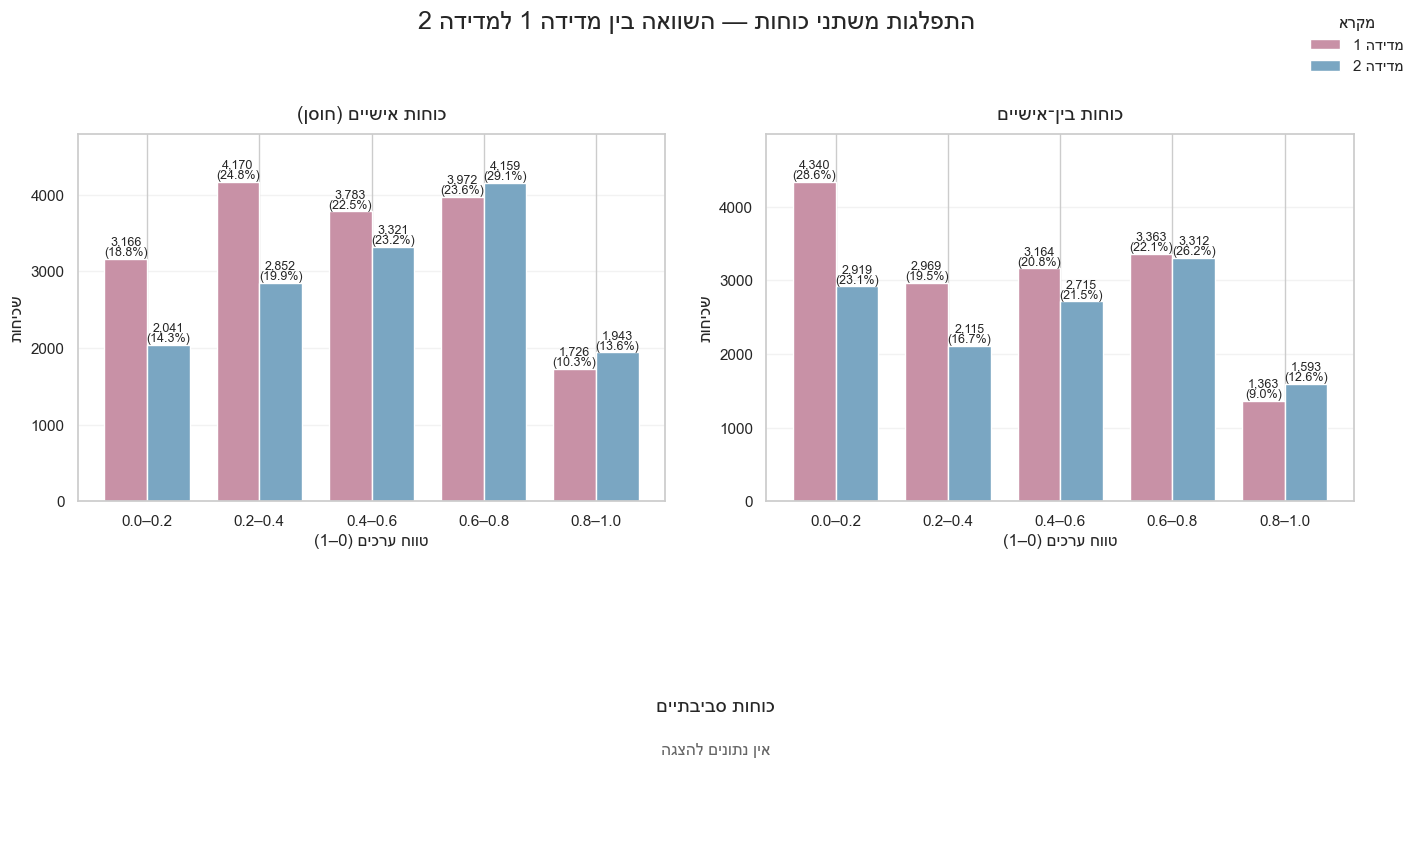

✅ נשמר: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions\strengths_m1_m2_grid.png


In [42]:
# ===============================================================
# Strengths — פריסה דו-שורתית: שני תחומים בשורה עליונה, אחד למטה
# ===============================================================
import numpy as np, matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from bidi.algorithm import get_display

heb = lambda s: get_display(str(s))
PINK, BLUE = "#c891a6", "#7aa6c2"
OUTDIR = Path("reports/figures/fe_distributions"); OUTDIR.mkdir(parents=True, exist_ok=True)

strength_vars = [
    ("personal_strengths",      "כוחות אישיים (חוסן)"),
    ("interpersonal_strengths", "כוחות בין־אישיים"),
    ("environmental_strengths", "כוחות סביבתיים"),
]

# --- bins קבועים 0–1 ---  
bins = np.linspace(0, 1, 6)
labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# --- בניית plot_df (מהתא הישן) ---
rows = []
for base, label_he in strength_vars:
    for m in (1, 2):
        col = f"{base}_m{m}"
        if col not in df.columns:
            continue
        s = pd.to_numeric(df[col], errors="coerce").dropna()
        if s.empty or (s.nunique() == 1 and s.iloc[0] == 0):
            # תחום שלא נמדד (כמו סביבתי)
            for L in labels:
                rows.append({
                    "variable": label_he,
                    "measure": f"מדידה {m}",
                    "bin": L,
                    "count": 0,
                    "percent": 0.0
                })
            continue
        # חשוב: right=False כדי שהטווחים יהיו [0.0–0.2), [0.2–0.4) ... [0.8–1.0]
        binned = pd.cut(s, bins=bins, labels=labels, include_lowest=True, right=False)
        c = binned.value_counts().reindex(labels, fill_value=0)
        n = c.sum()
        pct = (c / n * 100).round(1)
        for L in labels:
            rows.append({
                "variable": label_he,
                "measure": f"מדידה {m}",
                "bin": L,
                "count": int(c[L]),
                "percent": float(pct[L])
            })

plot_df = pd.DataFrame(rows)

labels = [f"{i/5:.1f}–{(i+1)/5:.1f}" for i in range(5)]
x = np.arange(len(labels))
w = 0.38

by_var = {v: g.copy() for v, g in plot_df.groupby("variable", sort=False)}

# --- GridSpec: 2 שורות, 2 עמודות; האחרון תופס את כל השורה ---
fig = plt.figure(figsize=(15, 9))
gs = GridSpec(2, 2, height_ratios=[1, 0.7], figure=fig)
axes = [
    fig.add_subplot(gs[0, 0]),  # אישי
    fig.add_subplot(gs[0, 1]),  # בין־אישי
    fig.add_subplot(gs[1, :])   # סביבתי (שורה נפרדת)
]

fig.suptitle(heb("התפלגות משתני כוחות — השוואה בין מדידה 1 למדידה 2"), fontsize=18, y=0.98)
handles_for_legend = [Patch(facecolor=PINK, edgecolor="white", label=heb("מדידה 1")),
                      Patch(facecolor=BLUE, edgecolor="white", label=heb("מדידה 2"))]

for ax, (var, sub) in zip(axes, by_var.items()):
    m1 = (sub.query("measure=='מדידה 1'")
              .set_index("bin").reindex(labels, fill_value=0))
    m2 = (sub.query("measure=='מדידה 2'")
              .set_index("bin").reindex(labels, fill_value=0))

    counts1, counts2 = m1["count"].to_numpy(), m2["count"].to_numpy()
    pcts1,   pcts2   = m1["percent"].to_numpy(), m2["percent"].to_numpy()
    total = max(counts1.max(initial=0), counts2.max(initial=0))

    if total == 0:
        # פאנל ריק — הצגה אלגנטית
        ax.set_ylim(0, 1)
        ax.text(0.5, 0.55, heb(var), ha="center", va="center", fontsize=14, transform=ax.transAxes)
        ax.text(0.5, 0.38, heb("אין נתונים להצגה"), ha="center", va="center",
                fontsize=12, color="#666", transform=ax.transAxes)
        ax.axis("off")
        continue

    bars1 = ax.bar(x - w/2, counts1, width=w, color=PINK, edgecolor="white")
    bars2 = ax.bar(x + w/2, counts2, width=w, color=BLUE, edgecolor="white")

    # טקסטים
    for bars, counts, pcts in [(bars1, counts1, pcts1), (bars2, counts2, pcts2)]:
        for b, c, p in zip(bars, counts, pcts):
            ax.text(b.get_x() + b.get_width()/2, b.get_height(),
                    f"{int(c):,}\n({p:.1f}%)",
                    ha="center", va="bottom", fontsize=9, linespacing=0.9)

    ax.set_title(heb(var), fontsize=14, pad=10)
    ax.set_xlabel(heb("טווח ערכים (0–1)"))
    ax.set_ylabel(heb("שכיחות"))
    ax.set_xticks(x, labels)
    ax.set_ylim(bottom=0, top=total * 1.15)
    ax.grid(axis="y", alpha=0.25)
    ax.margins(y=0.08)

# --- מקרא למעלה-ימין ---
fig.legend(handles=handles_for_legend, title=heb("מקרא"),
           loc="upper right", bbox_to_anchor=(0.98, 0.99), frameon=False)

fig.tight_layout(rect=[0.03, 0.03, 0.95, 0.94], w_pad=2.0, h_pad=2.5)

from pathlib import Path
OUTDIR = Path("reports/figures/fe_distributions"); OUTDIR.mkdir(parents=True, exist_ok=True)
fig.savefig(OUTDIR / "strengths_m1_m2_grid.png", dpi=220, bbox_inches="tight")
plt.show()
print("✅ נשמר:", (OUTDIR / "strengths_m1_m2_grid.png").resolve())


מתוך התרשים עולה שכ-40% מהילדים במדידה הראשונה היו עם רמות גבוהות של כוחות אישיים ובין- אישיים (60% עד 100% מהפריטים מולאו כן). ובמדידה השניה מספר זה עלה קרוב ל- 60% מהילדים. פריטי הכוחות הסביבתיים לא מולאו. 

In [43]:
"plot_df" in globals()


True

## מדדד מסכם כולל

In [44]:
# ציון חוסן כולל
import numpy as np

# רשימת תחומי כוחות
strength_domains = [
    "personal_strengths",
    "interpersonal_strengths",
    "environmental_strengths"
]

for m in [1, 2]:
    cols = [f"{d}_m{m}" for d in strength_domains]

    # אם כל התחום הסביבתי ריק (רק אפסים) – נהפוך אותו ל-NaN
    if (df[cols[2]] == 0).all():
        df.loc[:, cols[2]] = np.nan

    # ממוצע רק של תחומים תקפים (לא NaN ולא 0 בלבד)
    df[f"overall_strengths_m{m}"] = (
        df[cols]
        .where(df[cols].notna())       # נשמור רק ערכים תקפים
        .mean(axis=1, skipna=True)     # ממוצע לפי מספר התחומים התקפים
    )

# הבדל בין המדידות
df["overall_strengths_delta"] = df["overall_strengths_m2"] - df["overall_strengths_m1"]

print(df[["overall_strengths_m1","overall_strengths_m2","overall_strengths_delta"]].describe().round(3))


       overall_strengths_m1  overall_strengths_m2  overall_strengths_delta
count               21937.0               21937.0                  21900.0
mean                  0.562                 0.664                    0.102
std                   0.334                 0.322                    0.335
min                     0.0                   0.0                     -1.0
25%                    0.25                   0.4                    -0.05
50%                     0.6                  0.75                    0.008
75%                   0.875                   1.0                     0.25
max                     1.0                   1.0                      1.0


In [45]:
# ===============================================================
# התפלגות מדד חוסן מסכם (overall) — m1 מול m2: סטטיסטיקות + טבלת bins
# ===============================================================
import numpy as np, pandas as pd

cols = ["overall_strengths_m1", "overall_strengths_m2"]
assert all(c in df.columns for c in cols), "חסר אחד מהעמודות overall_strengths_m1/2."

# --- סטטיסטיקות בסיס ---
print("📈 סטטיסטיקות כלליות (ללא NaN):\n")
display(df[cols].describe().T.round(3))

# כמה חסרים בכל מדידה
print("\n🧩 חסרים:")
for c in cols:
    n = df[c].isna().sum()
    print(f"  {c}: {n:,} NaN ({n/len(df):.1%})")

# --- טבלת התפלגות לפי bins קבועים 0–1 (כולל 1.0) ---
bins = np.linspace(0, 1.000001, 6)  # מבטיח ש-1.0 ייכנס לבין האחרון
labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]

def dist_table(s: pd.Series, name: str) -> pd.DataFrame:
    s = pd.to_numeric(s, errors="coerce").dropna()
    b = pd.cut(s, bins=bins, labels=labels, include_lowest=True, right=False)
    vc = b.value_counts().reindex(labels, fill_value=0)
    out = (pd.DataFrame({"טווח": vc.index, "כמות": vc.values})
             .assign(אחוז=lambda d: (d["כמות"] / s.shape[0] * 100).round(1),
                     N_תצפיות=s.shape[0],
                     מדידה=name))
    return out

tbl = pd.concat([
    dist_table(df["overall_strengths_m1"], "מדידה 1"),
    dist_table(df["overall_strengths_m2"], "מדידה 2"),
], ignore_index=True)

print("\n🧮 טבלת התפלגות לפי טווחים (0–1):")
display(tbl)

# --- בדיקה ממוקדת: האם יש ערכים בבינים הגבוהים? ---
def high_bins_report(s: pd.Series, name: str):
    s = pd.to_numeric(s, errors="coerce").dropna()
    ge06 = (s >= 0.6).sum()
    ge08 = (s >= 0.8).sum()
    print(f"\n{name}:")
    print(f"  ≥0.6 : {ge06:,} ({ge06/len(s):.1%})")
    print(f"  ≥0.8 : {ge08:,} ({ge08/len(s):.1%})")
    print(f"  max  : {s.max():.3f}")

high_bins_report(df["overall_strengths_m1"], "מדידה 1 — overall")
high_bins_report(df["overall_strengths_m2"], "מדידה 2 — overall")


📈 סטטיסטיקות כלליות (ללא NaN):



,count,mean,std,min,25%,50%,75%,max
overall_strengths_m1,21937.0,0.562,0.334,0.0,0.25,0.6,0.875,1.0
overall_strengths_m2,21937.0,0.664,0.322,0.0,0.4,0.75,1.0,1.0



🧩 חסרים:
  overall_strengths_m1: 44 NaN (0.2%)
  overall_strengths_m2: 44 NaN (0.2%)

🧮 טבלת התפלגות לפי טווחים (0–1):


,טווח,כמות,אחוז,N_תצפיות,מדידה
0,0.0–0.2,4379,20.0,21937,מדידה 1
1,0.2–0.4,3757,17.1,21937,מדידה 1
2,0.4–0.6,3094,14.1,21937,מדידה 1
3,0.6–0.8,4047,18.4,21937,מדידה 1
4,0.8–1.0,6660,30.4,21937,מדידה 1
5,0.0–0.2,2846,13.0,21937,מדידה 2
6,0.2–0.4,2755,12.6,21937,מדידה 2
7,0.4–0.6,2776,12.7,21937,מדידה 2
8,0.6–0.8,4093,18.7,21937,מדידה 2
9,0.8–1.0,9467,43.2,21937,מדידה 2



מדידה 1 — overall:
  ≥0.6 : 11,099 (50.6%)
  ≥0.8 : 7,046 (32.1%)
  max  : 1.000

מדידה 2 — overall:
  ≥0.6 : 13,999 (63.8%)
  ≥0.8 : 9,916 (45.2%)
  max  : 1.000


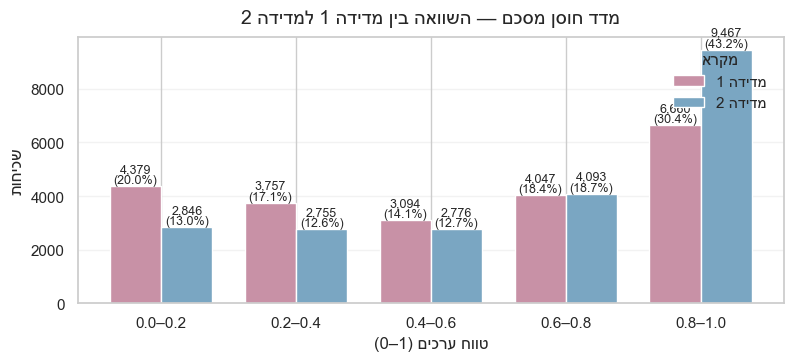

✅ נשמר: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions\overall_strengths_m1_vs_m2.png


In [46]:
# ===============================================================
# ויזואליזציה — מדד חוסן מסכם (overall_strengths): מדידה 1 מול 2
# ===============================================================
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from bidi.algorithm import get_display
from pathlib import Path

heb = lambda s: get_display(str(s))
PINK, BLUE = "#c891a6", "#7aa6c2"
palette = {"מדידה 1": PINK, "מדידה 2": BLUE}

# --- הכנת דאטה בפורמט long ---
cols = ["overall_strengths_m1", "overall_strengths_m2"]
assert all(c in df.columns for c in cols), "חסר overall_strengths_m1/2."

df_long = (
    df[cols]
    .rename(columns={"overall_strengths_m1": "מדידה 1", "overall_strengths_m2": "מדידה 2"})
    .melt(var_name="מדידה", value_name="ציון")
    .dropna(subset=["ציון"])
)

# --- בניית bins קבועים 0–1 (כולל 1.0) ---
bins = np.linspace(0, 1.000001, 6)  # 0.0,0.2,...,1.0 (right-open חוץ מהאחרון)
labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]
df_long["bin"] = pd.cut(df_long["ציון"], bins=bins, labels=labels, include_lowest=True, right=False)

# --- ספירות לכל (מדידה × bin) + הבטחת הופעה של כל ה-bins לכל מדידה ---
plot_df = (
    df_long
    .groupby(["מדידה","bin"])
    .size()
    .rename("count")
    .reset_index()
)

# מלאת אפסים לבינים חסרים לכל מדידה
all_idx = pd.MultiIndex.from_product([plot_df["מדידה"].unique(), labels], names=["מדידה","bin"])
plot_df = (
    plot_df.set_index(["מדידה","bin"])
           .reindex(all_idx, fill_value=0)
           .reset_index()
)

# --- אחוזים יציבים (transform) כדי למנוע שגיאת אינדקס ---
plot_df["percent"] = (
    plot_df.groupby("מדידה")["count"]
           .transform(lambda x: (x / x.sum() * 100))
           .round(1)
)

# --- ציור מדויק עם Matplotlib (ללא seaborn.barplot) ---
import matplotlib.pyplot as plt
import numpy as np

# וקטורי סדר לפי bins
bins_order = labels  # ["0.0–0.2", "0.2–0.4", ...]
m1 = plot_df.query("מדידה == 'מדידה 1'").set_index("bin").reindex(bins_order, fill_value=0)
m2 = plot_df.query("מדידה == 'מדידה 2'").set_index("bin").reindex(bins_order, fill_value=0)

counts1 = m1["count"].to_numpy()
counts2 = m2["count"].to_numpy()
pcts1   = m1["percent"].to_numpy()
pcts2   = m2["percent"].to_numpy()

x = np.arange(len(bins_order))
w = 0.38

plt.figure(figsize=(9, 4.2))
ax = plt.gca()

bars1 = ax.bar(x - w/2, counts1, width=w, label=heb("מדידה 1"), color=PINK, edgecolor="white")
bars2 = ax.bar(x + w/2, counts2, width=w, label=heb("מדידה 2"), color=BLUE, edgecolor="white")

# אנוטציות: מספר ואז אחוז בסוגריים, גם כשגובה=0 (יופיע בגובה 0)
def annotate(bars, counts, pcts):
    for b, c, p in zip(bars, counts, pcts):
        xx = b.get_x() + b.get_width()/2
        yy = b.get_height()
        txt = f"{int(c):,}\n({p:.1f}%)"
        ax.text(xx, yy, txt, ha="center", va="bottom", fontsize=9, linespacing=0.9)

annotate(bars1, counts1, pcts1)
annotate(bars2, counts2, pcts2)

# עיצוב
ax.set_title(heb("מדד חוסן מסכם — השוואה בין מדידה 1 למדידה 2"), fontsize=14, pad=10)
ax.set_xlabel(heb("טווח ערכים (1–0)"))
ax.set_ylabel(heb("שכיחות"))
ax.set_xticks(x, bins_order)
ax.grid(axis="y", alpha=0.25)

leg = ax.legend(title=heb("מקרא"), loc="upper right", bbox_to_anchor=(0.995, 0.995), frameon=False)
plt.tight_layout(rect=[0.04, 0.02, 0.94, 0.92])

# שמירה
OUTDIR.mkdir(parents=True, exist_ok=True)
fname = OUTDIR / "overall_strengths_m1_vs_m2.png"
plt.savefig(fname, dpi=220, bbox_inches="tight")
plt.show()

print("✅ נשמר:", fname.resolve())



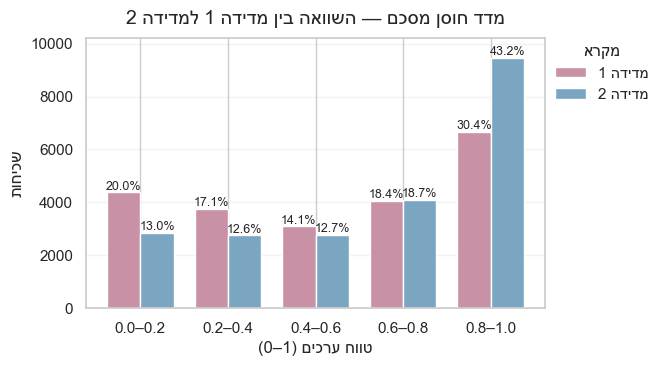

✅ נשמר: C:\Users\zoars\Desktop\Data Science\machine learning\ML_PROJECT\360 project\my_ml_project\reports\figures\fe_distributions\overall_strengths_m1_vs_m2.png


In [47]:
# ===============================================================
# ויזואליזציה — מדד חוסן מסכם (overall_strengths): מדידה 1 מול 2
# ===============================================================
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from bidi.algorithm import get_display
from pathlib import Path

heb = lambda s: get_display(str(s))
PINK, BLUE = "#c891a6", "#7aa6c2"
palette = {"מדידה 1": PINK, "מדידה 2": BLUE}

# --- הכנת דאטה בפורמט long ---
cols = ["overall_strengths_m1", "overall_strengths_m2"]
assert all(c in df.columns for c in cols), "חסר overall_strengths_m1/2."

df_long = (
    df[cols]
    .rename(columns={"overall_strengths_m1": "מדידה 1", "overall_strengths_m2": "מדידה 2"})
    .melt(var_name="מדידה", value_name="ציון")
    .dropna(subset=["ציון"])
)

# --- בניית bins קבועים 0–1 (כולל 1.0) ---
bins = np.linspace(0, 1.000001, 6)  # 0.0,0.2,...,1.0 (right-open חוץ מהאחרון)
labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins)-1)]
df_long["bin"] = pd.cut(df_long["ציון"], bins=bins, labels=labels, include_lowest=True, right=False)

# --- ספירות לכל (מדידה × bin) + הבטחת הופעה של כל ה-bins לכל מדידה ---
plot_df = (
    df_long
    .groupby(["מדידה","bin"])
    .size()
    .rename("count")
    .reset_index()
)

# מלאת אפסים לבינים חסרים לכל מדידה
all_idx = pd.MultiIndex.from_product([plot_df["מדידה"].unique(), labels], names=["מדידה","bin"])
plot_df = (
    plot_df.set_index(["מדידה","bin"])
           .reindex(all_idx, fill_value=0)
           .reset_index()
)

# --- אחוזים יציבים (transform) כדי למנוע שגיאת אינדקס ---
plot_df["percent"] = (
    plot_df.groupby("מדידה")["count"]
           .transform(lambda x: (x / x.sum() * 100))
           .round(1)
)

# --- ציור מדויק עם Matplotlib (ללא seaborn.barplot) ---
import matplotlib.pyplot as plt
import numpy as np

# וקטורי סדר לפי bins
bins_order = labels  # ["0.0–0.2", "0.2–0.4", ...]
m1 = plot_df.query("מדידה == 'מדידה 1'").set_index("bin").reindex(bins_order, fill_value=0)
m2 = plot_df.query("מדידה == 'מדידה 2'").set_index("bin").reindex(bins_order, fill_value=0)

counts1 = m1["count"].to_numpy()
counts2 = m2["count"].to_numpy()
pcts1   = m1["percent"].to_numpy()
pcts2   = m2["percent"].to_numpy()

x = np.arange(len(bins_order))
w = 0.38

plt.figure(figsize=(9, 4.2))
ax = plt.gca()

bars1 = ax.bar(x - w/2, counts1, width=w, label=heb("מדידה 1"), color=PINK, edgecolor="white")
bars2 = ax.bar(x + w/2, counts2, width=w, label=heb("מדידה 2"), color=BLUE, edgecolor="white")

# אנוטציות: מספר ואז אחוז בסוגריים, גם כשגובה=0 (יופיע בגובה 0)
def annotate(bars, counts, pcts):
    for b, c, p in zip(bars, counts, pcts):
        xx = b.get_x() + b.get_width()/2
        yy = b.get_height()
        txt = f"{p:.1f}%"
        ax.text(xx, yy, txt, ha="center", va="bottom", fontsize=9, linespacing=0.9)

annotate(bars1, counts1, pcts1)
annotate(bars2, counts2, pcts2)

# עיצוב
ax.set_title(heb("מדד חוסן מסכם — השוואה בין מדידה 1 למדידה 2"), fontsize=14, pad=10)
ax.set_xlabel(heb("טווח ערכים (1–0)"))
ax.set_ylabel(heb("שכיחות"))
ax.set_xticks(x, bins_order)
ax.grid(axis="y", alpha=0.25)

# מקרא מחוץ לגרף (ימין), ושמירת שוליים מתאימים
ax.legend(
    title=heb("מקרא"),
    loc="upper left",
    bbox_to_anchor=(1.01, 1.00),  # מחוץ לציר, מעט ימינה
    borderaxespad=0.0,
    frameon=False
)

# שולי ציור — מפנים מקום למקרא בצד ימין
plt.tight_layout(rect=[0.05, 0.04, 0.80, 0.95])
ax.margins(y=0.08)  # מרווח קטן מעל עמודות לטקסטים

# שמירה
OUTDIR.mkdir(parents=True, exist_ok=True)
fname = OUTDIR / "overall_strengths_m1_vs_m2.png"
plt.savefig(fname, dpi=220, bbox_inches="tight")
plt.show()

print("✅ נשמר:", fname.resolve())



בקרב ילדים שמולאו עליהם מירב הפריטים במדד (קרוב ל-100%) חל שיפור בכוחות שלהם בין המדידה הראשונה לשניה

### מדד מספר הפריטים המסומנים בכוכב והשינוי במספר זה בין המדידות

In [48]:
# זיהוי משתני דגלים
star_cols_m1 = [c for c in df.columns if c.endswith("_star_m1")]
star_cols_m2 = [c for c in df.columns if c.endswith("_star_m2")]
print(len(star_cols_m1), len(star_cols_m2))


42 42


In [49]:
import numpy as np, pandas as pd

# 1) בחירת עמודות STAR לכל מדידה
star_m1 = [c for c in df.columns if c.endswith("_star_m1")]
star_m2 = [c for c in df.columns if c.endswith("_star_m2")]

# 2) ספירת דגלים אדומים בכל מדידה (99→NaN, NaN→0, ספירה בינארית >0)
df["n_star_flags_m1"] = (
    df[star_m1].apply(pd.to_numeric, errors="coerce").replace(99, np.nan).fillna(0) > 0
).sum(axis=1).astype("Int16")

df["n_star_flags_m2"] = (
    df[star_m2].apply(pd.to_numeric, errors="coerce").replace(99, np.nan).fillna(0) > 0
).sum(axis=1).astype("Int16")


# הצצה קצרה
display(df.filter(regex="^n_star_flags").describe().T)


,count,mean,std,min,25%,50%,75%,max
n_star_flags_m1,21981.0,2.837905,3.986199,0.0,0.0,1.0,4.0,37.0
n_star_flags_m2,21981.0,2.400391,4.006473,0.0,0.0,1.0,3.0,41.0


במדידה הראשונה היו בממוצע 3 פריטי סיכון עם דגל לילד. יש ילדים בלי כלום ויש ילדים עם עד 37 פריטים. מדידה שניה ממוצע ירד מעט. 

In [50]:
# מדד שינוי בפריטי הדגל

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) שינוי בין מדידות: ירידה = שיפור (פחות דגלים אדומים)
df["delta_star_flags"] = (df["n_star_flags_m2"] - df["n_star_flags_m1"]).astype("Int16")

# 2) סטטיסטיקות מהירות
print("📊 תיאור מספרי של delta_star_flags")
print(df["delta_star_flags"].describe())

# 3) כמה שיפרו / ללא שינוי / החמירו (עם אחוזים)
sign = np.sign(df["delta_star_flags"]).map({-1:"שיפור", 0:"ללא שינוי", 1:"החמרה"}).astype("string")
sign.name = "מגמה"
counts = sign.value_counts(dropna=False)
perc = (counts / counts.sum() * 100).round(1)
summary = pd.DataFrame({"כמות": counts, "אחוז": perc})
print("\n🧭 חלוקה לשיפורים/ללא שינוי/החמרה")
print(summary)

# 4) התפלגות מרוכזת סביב האפס (טווח -10..+10) — נוח להבנה מהירה
dist = (df["delta_star_flags"]
        .clip(lower=-10, upper=10)         # חיתוך קצוות להצגה
        .value_counts()
        .sort_index())
print("\n📈 התפלגות שינוי (חיתוך לתחום -10..+10):")
print(dist)




📊 תיאור מספרי של delta_star_flags
count     21981.0
mean    -0.437514
std      3.562719
min         -28.0
25%          -2.0
50%           0.0
75%           0.0
max          38.0
Name: delta_star_flags, dtype: Float64

🧭 חלוקה לשיפורים/ללא שינוי/החמרה
           כמות  אחוז
מגמה                 
ללא שינוי  8716  39.7
שיפור      7982  36.3
החמרה      5283  24.0

📈 התפלגות שינוי (חיתוך לתחום -10..+10):
delta_star_flags
-10     332
-9      145
-8      184
-7      248
-6      380
-5      582
-4      818
-3     1194
-2     1709
-1     2390
0      8716
1      1792
2      1172
3       782
4       509
5       293
6       184
7       125
8       103
9        49
10      274
Name: count, dtype: Int64


מתוך הנתונים עולה שבממוצע חלה ירידה של כחצי דגל אדום לכל ילד. אצל מחצית מהילדים לא חל שינוי בכלל. סטיית התקן גדולה- קיימת שונות גדולה בין ילדים. חלקם השתפרו משמעותית ואחרים- החמירו. יש ילדים שהורידו עד 28 דגלים ויש שהוסיפו עד 28 (אולי התגלו במהלך ההתערבות). 

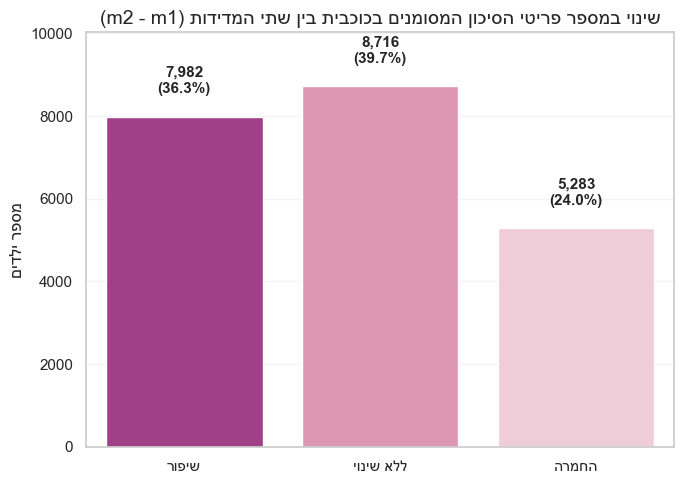

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display

heb = lambda s: get_display(str(s))

# נתונים
summary = pd.DataFrame({
    "מגמה": ["שיפור", "ללא שינוי", "החמרה"],
    "כמות": [7982, 8716, 5283],
    "אחוז": [36.3, 39.7, 24.0]
})

# תיקון סדר תצוגה (ימין→שמאל)
summary["מגמה"] = summary["מגמה"].apply(heb)

# ציור
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=summary,
    x="מגמה", y="כמות",
    palette=["#b03090", "#e68cb0", "#f4c6d6"]
)

# הוספת תוויות
for i, row in summary.iterrows():
    ax.text(
        i, row["כמות"] + 500,  # קצת רווח מלמעלה
        f"{row['כמות']:,}\n({row['אחוז']}%)",
        ha="center", va="bottom", fontsize=11, weight="bold"
    )

# עיצוב
plt.title(heb("שינוי במספר פריטי הסיכון המסומנים בכוכבית בין שתי המדידות (m2 - m1)"), fontsize=14)
plt.xlabel("")
plt.ylabel(heb("מספר ילדים"), fontsize=12)
plt.grid(axis="y", alpha=0.2)
plt.ylim(0, summary["כמות"].max() * 1.15)  # מוסיף רווח בראש הגרף
plt.tight_layout()
plt.show()


 כשליש מהילדים הפחיתו את מספר הדגלים, כ- 40% נשארו ללא שינוי, כרבע דווח על עליה (או איתור חדש) 

In [52]:
# ============================================================
# דיווח צורה, טיפוסים ועמודות חדשות (בצורה מרוכזת)
# ============================================================

def print_shape_and_dtypes(snap, title):
    print(f"\n===== {title} =====")
    rows, cols = snap['shape']
    print(f"שורות: {rows:,}")
    print(f"עמודות: {cols:,}")
    print(f"סה\"כ תאים חסרים: {snap['missing']:,}\n")

    dtypes_simplified = {}
    for dtype_name, count in snap['dtypes'].items():
        dtype_str = str(dtype_name)
        if "category" in dtype_str.lower():
            key = "category"
        elif "int" in dtype_str.lower() and "Int" not in dtype_str:
            key = "int"
        elif "int" in dtype_str:
            key = "Int"
        elif "float" in dtype_str:
            key = "float"
        elif "bool" in dtype_str:
            key = "bool"
        elif "datetime" in dtype_str:
            key = "datetime"
        elif "string" in dtype_str:
            key = "string"
        else:
            key = dtype_str
        dtypes_simplified[key] = dtypes_simplified.get(key, 0) + count

    print("🔹 טיפוסים (ספירה מרוכזת):")
    for dtype, count in dtypes_simplified.items():
        print(f"   - {dtype}: {count}")


snapshot_df = snapshot 
if "df_before" not in locals():
    df_before = df.copy()  
    
# --- השוואה בין לפני ואחרי --- 
before = snapshot_df(df_before.copy())
print_shape_and_dtypes(before, "לפני השינויים")
after = snapshot_df(df)
print_shape_and_dtypes(after,  "אחרי השינויים")

# --- עמודות חדשות / הוסרו ---
added_cols = sorted(after['cols'] - before['cols'])
removed_cols = sorted(before['cols'] - after['cols'])

print("\n===== עמודות חדשות שנוספו =====")
if added_cols:
    print(f"סה\"כ נוספו {len(added_cols)} עמודות:\n")
    for i, c in enumerate(added_cols, 1):
        print(f"{i}. {c}")
else:
    print("לא נוספו עמודות חדשות.")

if removed_cols:
    print("\n===== עמודות שהוסרו =====")
    print(f"סה\"כ הוסרו {len(removed_cols)} עמודות:\n")
    for i, c in enumerate(removed_cols, 1):
        print(f"{i}. {c}")
else:
    print("\nלא הוסרו עמודות.")



===== לפני השינויים =====
שורות: 21,981
עמודות: 427
סה"כ תאים חסרים: 4,439,106

🔹 טיפוסים (ספירה מרוכזת):
   - Int64: 303
   - int: 20
   - bool: 13
   - category: 78
   - float: 7
   - datetime: 6

===== אחרי השינויים =====
שורות: 21,981
עמודות: 480
סה"כ תאים חסרים: 66,800

🔹 טיפוסים (ספירה מרוכזת):
   - Int64: 255
   - int: 50
   - Int8: 49
   - Int16: 21
   - bool: 13
   - Float32: 12
   - string: 5
   - category: 68
   - datetime: 4
   - float: 3

===== עמודות חדשות שנוספו =====
סה"כ נוספו 86 עמודות:

1. child_age_start
2. delta_star_flags
3. desired_main_outcome
4. desired_secondary_outcome
5. environmental_strengths
6. environmental_strengths_m1
7. environmental_strengths_m2
8. interpersonal_strengths
9. interpersonal_strengths_m1
10. interpersonal_strengths_m2
11. intervention_days
12. intervention_length_group
13. intervention_months
14. n_improved_domains
15. n_risk_domains_m1
16. n_risk_domains_m2
17. n_star_flags_m1
18. n_star_flags_m2
19. n_worsened_domains
20. organizatio

##  מספר מצבי הסיכון /היקף הסיכון

✅ נוספו/עודכנו: risk_item_count_m1/m2, risk_item_high_count_m1/m2, risk_item_count_delta


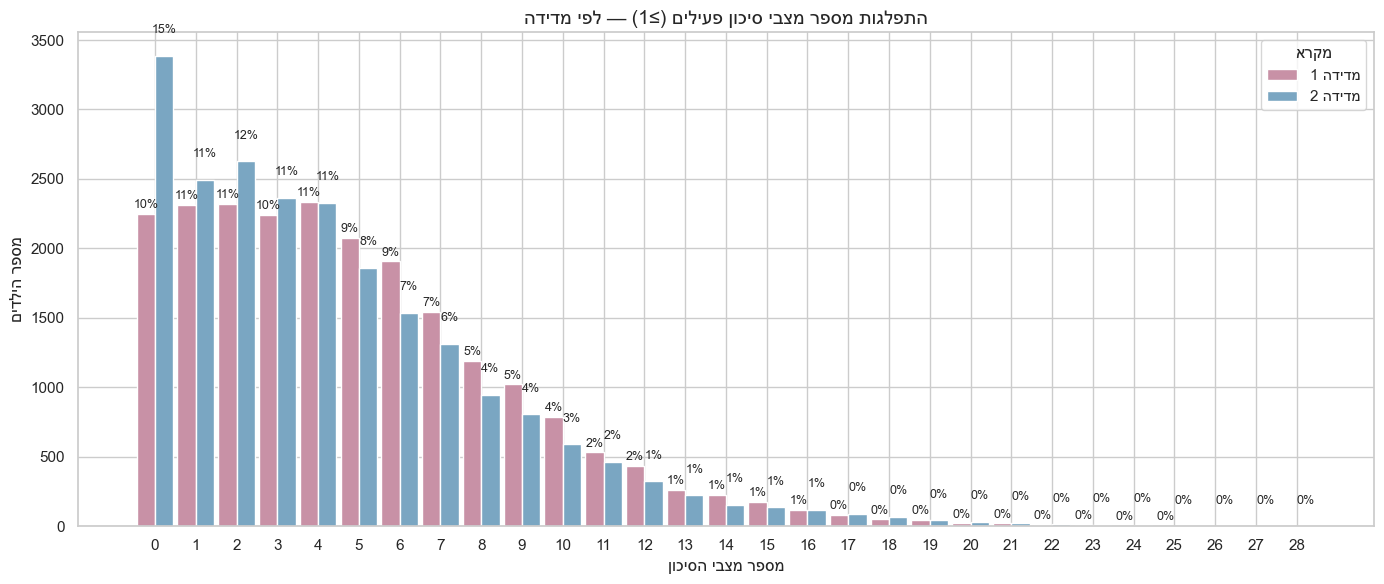

💾 נשמר: reports\figures\risk_item_count_bar_m1_vs_m2.png


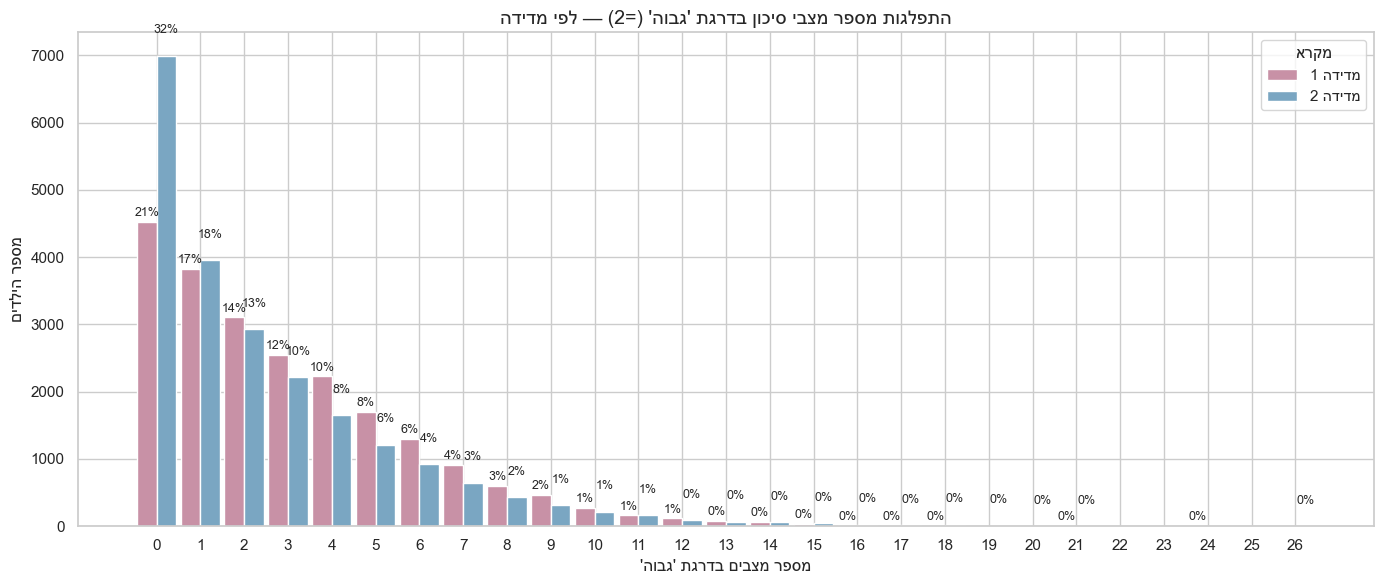

💾 נשמר: reports\figures\risk_item_high_count_bar_m1_vs_m2.png


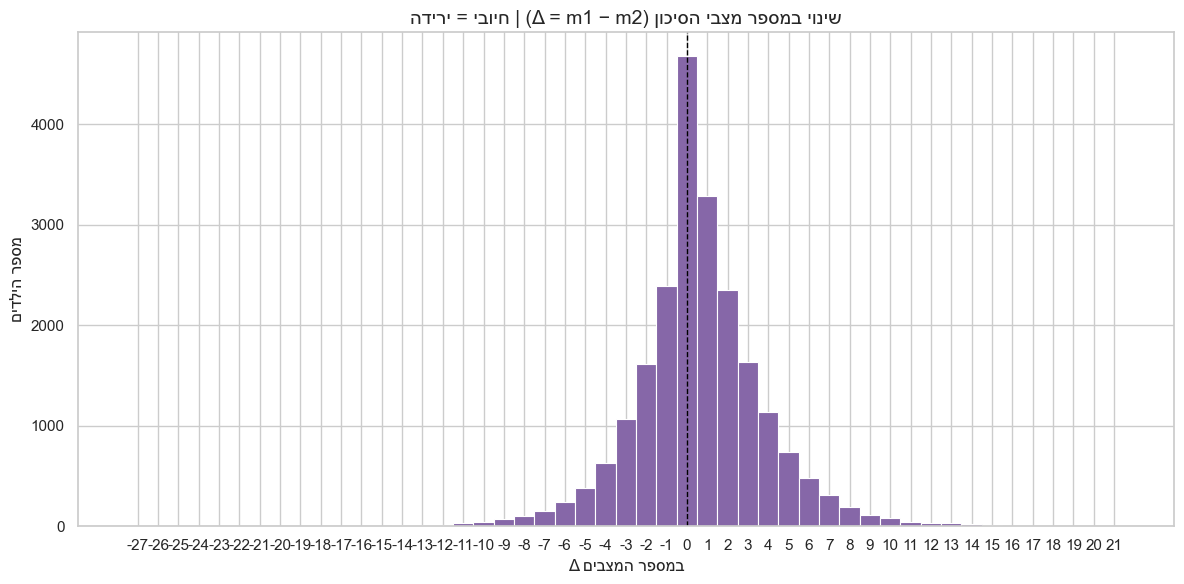

💾 נשמר: reports\figures\risk_item_count_delta_hist.png

🧾 תקציר מדדים:


,מדד,N,ממוצע,חציון
0,risk_item_count_m1,21981,4.96,4.0
1,risk_item_count_m2,21981,4.38,4.0
2,risk_item_high_count_m1,21981,3.07,2.0
3,risk_item_high_count_m2,21981,2.46,2.0
4,risk_item_count_delta,21981,0.57,0.0


In [53]:
# ===============================================================
# Risk item counts from explicit RS lists — חישוב מדדים ותרשימים
# ===============================================================
# קלט: RS_M1, RS_M2 (כפי שסיפקת בהודעה)
# פלט:
#   risk_item_count_m1 / risk_item_count_m2
#   risk_item_high_count_m1 / risk_item_high_count_m2
#   risk_item_count_delta (= count_m1 - count_m2; חיובי = ירידה)
# שמירות:
#   reports/figures/risk_item_count_bar_m1_vs_m2.png
#   reports/figures/risk_item_high_count_bar_m1_vs_m2.png
#   reports/figures/risk_item_count_delta_hist.png
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- bidi לעברית (אם קיים) ---
try:
    from bidi.algorithm import get_display
    heb = lambda s: get_display(str(s))
except Exception:
    heb = lambda s: str(s)

plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False

FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

# צבעים כמו שהשתמשנו: ורוד/כחול/סגול
PINK, BLUE, PURPLE = "#c891a6", "#7aa6c2", "#8667a8"


# --- רשימות המדדים המסכמים כפי שזוהו בקובץ הקטגוריאלי ---
RS_M1 = [
    "RS1_physical_care_difficulties_m1",
    "rs2_medical_rehab_dev_care_diff_m1",
    "RS3_supervision_difficulties_m1",
    "RS4_parent_child_relationship_difficulties_m1",
    "RS5_parenting_boundaries_difficulties_m1",
    "RS6_exposure_to_risky_behaviors_m1",
    "RS7_suspected_intrafamilial_sexual_abuse_m1",
    "RS8_suspected_physical_or_emotional_abuse_m1",
    "RS9_suspected_extra_familial_sexual_abuse_m1",
    "RS10_suspected_external_physical_abuse_m1",
    "RS11_external_emotional_or_economic_abuse_m1",
    "rs12_enrichment_support_difficulties_m1",
    "RS13_parent_school_engagement_difficulties_m1",
    "RS14_participation_or_academic_difficulties_m1",
    "RS15_developmental_or_achievement_gaps_m1",
    "RS16_social_rejection_bullying_m1",
    "RS17_withdrawal_alienation_loneliness_m1",
    "RS18_aggression_toward_peers_m1",
    "RS19_behavioral_signs_emotional_distress_m1",
    "RS20_physiological_signs_distress_m1",
    "RS21_low_self_worth_interest_motivation_m1",
    "RS22_violence_aggression_m1",
    "RS23_suicidal_ideation_attempts_m1",
    "RS24_risky_behaviors_m1",
    "RS25_illegal_behavior_involvement_m1",
    "RS26_alcohol_use_m1",
    "RS27_drug_use_m1",
    "RS28_inappropriate_sexual_behavior_m1"
]

RS_M2 = [
    "RS1_physical_care_difficulties_m2",
    "rs2_medical_rehab_dev_care_diff_m2",
    "RS3_supervision_difficulties_m2",
    "RS4_parent_child_relationship_difficulties_m2",
    "RS5_parenting_boundaries_difficulties_m2",
    "RS6_exposure_to_risky_behaviors_m2",
    "RS7_suspected_intrafamilial_sexual_abuse_m2",
    "RS8_suspected_physical_or_emotional_abuse_m2",
    "RS9_suspected_extra_familial_sexual_abuse_m2",
    "RS10_suspected_external_physical_abuse_m2",
    "RS11_external_emotional_or_economic_abuse_m2",
    "rs12_enrichment_support_difficulties_m2",
    "RS13_parent_school_engagement_difficulties_m2",
    "RS14_participation_or_academic_difficulties_m2",
    "RS15_developmental_or_achievement_gaps_m2",
    "RS16_social_rejection_bullying_m2",
    "RS17_withdrawal_alienation_loneliness_m2",
    "RS18_aggression_toward_peers_m2",
    "RS19_behavioral_signs_emotional_distress_m2",
    "RS20_physiological_signs_distress_m2",
    "RS21_low_self_worth_interest_motivation_m2",
    "RS22_violence_aggression_m2",
    "RS23_suicidal_ideation_attempts_m2",
    "RS24_risky_behaviors_m2",
    "RS25_illegal_behavior_involvement_m2",
    "RS26_alcohol_use_m2",
    "RS27_drug_use_m2",
    "RS28_inappropriate_sexual_behavior_m2"
]


# --- בדיקות קיום העמודות מהרשימות שסיפקת ---
def _missing(cols):
    return [c for c in cols if c not in df.columns]

missing_m1 = _missing(RS_M1)
missing_m2 = _missing(RS_M2)
if missing_m1:
    print(f"⚠️ חסרות ב-m1 {len(missing_m1)} עמודות (דוגמאות): {missing_m1[:5]}")
if missing_m2:
    print(f"⚠️ חסרות ב-m2 {len(missing_m2)} עמודות (דוגמאות): {missing_m2[:5]}")

# נשמור רק את הקיימות בפועל כדי לא לשבור את הריצה
RS_M1_EXIST = [c for c in RS_M1 if c in df.columns]
RS_M2_EXIST = [c for c in RS_M2 if c in df.columns]

# --- המרה לנומרי זהירה ---
rs1 = df[RS_M1_EXIST].apply(pd.to_numeric, errors="coerce")
rs2 = df[RS_M2_EXIST].apply(pd.to_numeric, errors="coerce")

# --- ספירת מצבי סיכון פעילים (>=1) ---
risk_item_count_m1 = rs1.ge(1).sum(axis=1).astype("Int64")
risk_item_count_m2 = rs2.ge(1).sum(axis=1).astype("Int64")

# --- ספירת "גבוהים" (=2) ---
risk_item_high_count_m1 = rs1.eq(2).sum(axis=1).astype("Int64")
risk_item_high_count_m2 = rs2.eq(2).sum(axis=1).astype("Int64")

# --- דלתא (חיובי = ירידה) ---
risk_item_count_delta = (risk_item_count_m1 - risk_item_count_m2).astype("Int64")

# --- הוספה ל-df (עם אזהרת דריסה ידידותית) ---
for name, series in [
    ("risk_item_count_m1",      risk_item_count_m1),
    ("risk_item_count_m2",      risk_item_count_m2),
    ("risk_item_high_count_m1", risk_item_high_count_m1),
    ("risk_item_high_count_m2", risk_item_high_count_m2),
    ("risk_item_count_delta",   risk_item_count_delta),
]:
    if name in df.columns:
        print(f"ℹ️ העמודה '{name}' כבר קיימת — מתבצע עדכון ערכים.")
    df[name] = series

print("✅ נוספו/עודכנו: risk_item_count_m1/m2, risk_item_high_count_m1/m2, risk_item_count_delta")

# =========================
# תרשימים עם מספרים + אחוזים
# =========================

def _freq_series(s: pd.Series, max_k: int) -> pd.Series:
    """התפלגות 0..max_k כולל קטגוריות חסרות (0 ספירות) כדי לשמור על ציר מלא."""
    s = s.dropna().astype(int)
    idx = pd.Index(range(0, max_k + 1), name="k")
    vc = s.value_counts().reindex(idx, fill_value=0).sort_index()
    return vc

# פונקציה מעודכנת: רק אחוזים, ללא שבר עשרוני, ורק למדידה 1
def _add_labels_for_container(bar_container, counts, total, dy=2, fontsize=9):
    """מדביק אחוזים (שלמים) מעל העמודות של container ספציפי."""
    for rect, n in zip(bar_container.patches, counts):
        if n and np.isfinite(n):
            pct = int(round(100.0 * n / total)) if total else 0
            ax = rect.axes
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_height()
            ax.annotate(f"{pct}%",
                        (x, y),
                        ha="center", va="bottom",
                        fontsize=fontsize,
                        xytext=(0, dy), textcoords="offset points",
                        clip_on=False)
            
# 1) בר-עמודות: התפלגות מספר מצבי סיכון (>=1) — m1 vs m2
max_count = int(max(risk_item_count_m1.max(skipna=True), risk_item_count_m2.max(skipna=True)))
freq_m1 = _freq_series(risk_item_count_m1, max_count)
freq_m2 = _freq_series(risk_item_count_m2, max_count)

x = np.arange(len(freq_m1))
w = 0.45
fig, ax = plt.subplots(figsize=(14, 6))
b1 = ax.bar(x - w/2, freq_m1.values, width=w, label=heb("מדידה 1"), color=PINK, edgecolor="white")
b2 = ax.bar(x + w/2, freq_m2.values, width=w, label=heb("מדידה 2"), color=BLUE, edgecolor="white")
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in freq_m1.index])
ax.set_title(heb("התפלגות מספר מצבי סיכון פעילים (≥1) — לפי מדידה"), fontsize=14)
ax.set_xlabel(heb("מספר מצבי הסיכון"))
ax.set_ylabel(heb("מספר הילדים"))
ax.legend(loc="upper right", title=heb("מקרא"))
# תוויות
# אחרי יצירת b1, b2
_add_labels_for_container(b1, freq_m1.values, total=freq_m1.sum(), dy=2)   # מדידה 1
_add_labels_for_container(b2, freq_m2.values, total=freq_m2.sum(), dy=14)  # מדידה 2 – היסט גובה

plt.tight_layout()
out1 = FIG_DIR / "risk_item_count_bar_m1_vs_m2.png"
plt.savefig(out1, dpi=200)
plt.show()
print(f"💾 נשמר: {out1}")

# 2) בר-עמודות: התפלגות 'גבוהים' (=2) — m1 vs m2
max_high = int(max(risk_item_high_count_m1.max(skipna=True), risk_item_high_count_m2.max(skipna=True)))
freq_hi_m1 = _freq_series(risk_item_high_count_m1, max_high)
freq_hi_m2 = _freq_series(risk_item_high_count_m2, max_high)

x = np.arange(len(freq_hi_m1))
fig, ax = plt.subplots(figsize=(14, 6))
b1 = ax.bar(x - w/2, freq_hi_m1.values, width=w, label=heb("מדידה 1"), color=PINK, edgecolor="white")
b2 = ax.bar(x + w/2, freq_hi_m2.values, width=w, label=heb("מדידה 2"), color=BLUE, edgecolor="white")
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in freq_hi_m1.index])
ax.set_title(heb("התפלגות מספר מצבי סיכון בדרגת 'גבוה' (=2) — לפי מדידה"), fontsize=14)
ax.set_xlabel(heb("מספר מצבים בדרגת 'גבוה'"))
ax.set_ylabel(heb("מספר הילדים"))
ax.legend(loc="upper right", title=heb("מקרא"))
_add_labels_for_container(b1, freq_hi_m1.values, total=freq_hi_m1.sum(), dy=2)
_add_labels_for_container(b2, freq_hi_m2.values, total=freq_hi_m2.sum(), dy=14)

plt.tight_layout()
out2 = FIG_DIR / "risk_item_high_count_bar_m1_vs_m2.png"
plt.savefig(out2, dpi=200)
plt.show()
print(f"💾 נשמר: {out2}")

# 3) היסטוגרמה: דלתא (m1 - m2); חיובי = ירידה
delta = risk_item_count_delta.dropna().astype(int)
if not delta.empty:
    dmin, dmax = int(delta.min()), int(delta.max())
    bins = np.arange(dmin - 0.5, dmax + 1.5, 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(delta, bins=bins, color=PURPLE, edgecolor="white", linewidth=0.8)
    ax.axvline(0, linestyle="--", color="black", linewidth=1)
    ax.set_xticks(range(dmin, dmax + 1))
    ax.set_title(heb("שינוי במספר מצבי הסיכון (Δ = m1 − m2) | חיובי = ירידה"), fontsize=14)
    ax.set_xlabel(heb("Δ במספר המצבים"))
    ax.set_ylabel(heb("מספר הילדים"))
    plt.tight_layout()
    out3 = FIG_DIR / "risk_item_count_delta_hist.png"
    plt.savefig(out3, dpi=200)
    plt.show()
    print(f"💾 נשמר: {out3}")
else:
    print("ℹ️ אין נתונים לשרטוט התפלגות דלתא (risk_item_count_delta).")

# --- תקציר בקרה מהיר ---
summary = pd.DataFrame({
    "מדד": [
        "risk_item_count_m1", "risk_item_count_m2",
        "risk_item_high_count_m1", "risk_item_high_count_m2",
        "risk_item_count_delta"
    ],
    "N": [
        df["risk_item_count_m1"].notna().sum(),
        df["risk_item_count_m2"].notna().sum(),
        df["risk_item_high_count_m1"].notna().sum(),
        df["risk_item_high_count_m2"].notna().sum(),
        df["risk_item_count_delta"].notna().sum()
    ],
    "ממוצע": [
        df["risk_item_count_m1"].mean(),
        df["risk_item_count_m2"].mean(),
        df["risk_item_high_count_m1"].mean(),
        df["risk_item_high_count_m2"].mean(),
        df["risk_item_count_delta"].mean()
    ],
    "חציון": [
        df["risk_item_count_m1"].median(),
        df["risk_item_count_m2"].median(),
        df["risk_item_high_count_m1"].median(),
        df["risk_item_high_count_m2"].median(),
        df["risk_item_count_delta"].median()
    ]
}).round(2)

print("\n🧾 תקציר מדדים:")
display(summary)


In [54]:
#   דו"ח לפני-אחרי + שמירת ביניים של כל המדדים שנוצרו עד כה לפני יצירת מדדים גיאוגרפיים
import pandas as pd
from pathlib import Path
from datetime import datetime

# === שלב 1: הגדרות נתיבים ===
MERGED_PATH = Path("data/interim/data_cleansing_merged.pkl")
FEATURE_V1_PATH_PKL = Path("data/interim/feature_engineering_v1.pkl")
FEATURE_V1_PATH_CSV = Path("data/interim/feature_engineering_v1.csv")

# === שלב 2: טעינת הקובץ המקורי לפני יצירת המדדים ===
df_before = pd.read_pickle(MERGED_PATH)
print(f"✅ נטען קובץ הבסיס: {MERGED_PATH.name} | shape={df_before.shape}")

# === שלב 3: צילום מצב נוכחי (לאחר יצירת מדדים) ===
df_after = df.copy()   # df הנוכחי שלך עם כל המדדים החדשים
print(f"✅ נוכחי (לאחר יצירת מדדים): shape={df_after.shape}")

# === שלב 4: השוואת עמודות לפני–אחרי ===
before_cols = set(df_before.columns)
after_cols  = set(df_after.columns)

added_cols   = sorted(list(after_cols - before_cols))
removed_cols = sorted(list(before_cols - after_cols))
same_cols    = sorted(list(after_cols & before_cols))

# === שלב 5: דוח השוואה ===
report = {
    "תאריך": datetime.now().strftime("%d/%m/%Y %H:%M"),
    "שורות (לפני)": df_before.shape[0],
    "עמודות (לפני)": df_before.shape[1],
    "שורות (אחרי)": df_after.shape[0],
    "עמודות (אחרי)": df_after.shape[1],
    "נוספו": len(added_cols),
    "הוסרו": len(removed_cols),
    "נשארו זהות": len(same_cols),
}

print("\n📊 סיכום לפני–אחרי:")
for k, v in report.items():
    print(f"{k:>18}: {v}")

# === שלב 6: פירוט העמודות החדשות ===
if added_cols:
    added_df = pd.DataFrame({
        "שם משתנה חדש": added_cols,
        "טיפוס נתונים": [df_after[c].dtype for c in added_cols]
    })
    print("\n🆕 עמודות שנוספו:")
    display(added_df.head(20))
else:
    print("\nℹ️ לא נוספו עמודות חדשות (לפי ההשוואה).")

# === שלב 7: שמירה של גרסת feature_engineering_v1 ===
df_after.to_pickle(FEATURE_V1_PATH_PKL)
df_after.to_csv(FEATURE_V1_PATH_CSV, index=False, encoding="utf-8-sig")

print(f"\n💾 נשמרו גרסאות:")
print("   ", FEATURE_V1_PATH_PKL)
print("   ", FEATURE_V1_PATH_CSV)

# === שלב 8: שמירת דוח קצר לאקסל (תיעוד לפני–אחרי) ===
report_path = Path("reports") / "feature_engineering_v1_changes.xlsx"
with pd.ExcelWriter(report_path, engine="openpyxl") as writer:
    pd.DataFrame.from_dict([report]).to_excel(writer, index=False, sheet_name="Summary")
    if added_cols:
        added_df.to_excel(writer, index=False, sheet_name="Added Columns")
    if removed_cols:
        pd.DataFrame({"עמודות שהוסרו": removed_cols}).to_excel(writer, index=False, sheet_name="Removed Columns")

print(f"📘 דוח שינויים נשמר: {report_path}")



✅ נטען קובץ הבסיס: data_cleansing_merged.pkl | shape=(21981, 405)
✅ נוכחי (לאחר יצירת מדדים): shape=(21981, 485)

📊 סיכום לפני–אחרי:
             תאריך: 31/10/2025 12:50
      שורות (לפני): 21981
     עמודות (לפני): 405
      שורות (אחרי): 21981
     עמודות (אחרי): 485
             נוספו: 80
             הוסרו: 0
        נשארו זהות: 405

🆕 עמודות שנוספו:


,שם משתנה חדש,טיפוס נתונים
0,child_age_start,Int16
1,delta_star_flags,Int16
2,environmental_strengths,Float32
3,environmental_strengths_m1,Float32
4,environmental_strengths_m2,Float32
5,interpersonal_strengths,Float32
6,interpersonal_strengths_m1,Float32
7,interpersonal_strengths_m2,Float32
8,intervention_days,int64
9,intervention_length_group,category



💾 נשמרו גרסאות:
    data\interim\feature_engineering_v1.pkl
    data\interim\feature_engineering_v1.csv
📘 דוח שינויים נשמר: reports\feature_engineering_v1_changes.xlsx


In [55]:
import pandas as pd
from collections import Counter

# פונקציה לקיבוץ טיפוסים למשפחות עיקריות
def classify_dtype(dtype):
    d = str(dtype).lower()
    if any(x in d for x in ["int", "float"]):
        return "נומרי"
    elif "bool" in d:
        return "בוליאני"
    elif "date" in d or "time" in d:
        return "תאריך/זמן"
    elif "cat" in d:
        return "קטגוריאלי"
    elif "str" in d or "object" in d:
        return "טקסטואלי"
    else:
        return "אחר"

# סיווג כל עמודה לפי משפחת טיפוס
dtype_groups = df.dtypes.apply(classify_dtype)
summary = Counter(dtype_groups)

# יצירת טבלה מסודרת
summary_df = pd.DataFrame(list(summary.items()), columns=["משפחת טיפוס", "כמות עמודות"]).sort_values("כמות עמודות", ascending=False)

display(summary_df.style.set_caption("📘 סיכום משפחות טיפוסים").set_table_styles([
    {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("text-align", "right")]}
]))


,משפחת טיפוס,כמות עמודות
0,נומרי,395
1,קטגוריאלי,68
3,בוליאני,13
2,טקסטואלי,5
4,תאריך/זמן,4


## מדדים גיאוגרפיים של רמות סיכון

##  הגדרת קואורדינטות מתוך קבצים גיאוגרפיים חיצוניים

 בדיקת התאמה של שמות הישובים אצלי לקובץ שהורדתי מאתר Israel Populated Places (OpenStreetMap Export) — קובץ נקודות מתוך OpenStreetMap של ישובי ישראל. נתחיל מהגדרת ישובים ואז אתקדם להגדרת גבולות המחוזות. 

# הגדרת ישובים

In [56]:
df["yeshuv_name_m1"].nunique()


183

In [65]:
# ===============================================================
# 1️⃣ LOAD SETTLEMENT COORDINATES — from OSM HOT GeoJSON (WGS84)
# ===============================================================
import json, pandas as pd
from pathlib import Path

# --- Load GeoJSON file (Israel populated places)
geo_path = Path("data/external/hotosm_isr_populated_places_points_geojson.geojson")
with open(geo_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

# --- Extract only point geometries ---
rows = []
for feat in gj.get("features", []):
    geom = feat.get("geometry", {})
    props = feat.get("properties", {})
    if geom.get("type") == "Point":
        lon, lat = geom.get("coordinates", [None, None])
        rows.append({
            "yeshuv_name_osm": props.get("name:he") or props.get("name") or "",
            "name_en": props.get("name:en"),
            "place": props.get("place"),
            "population": props.get("population"),
            "longitude": lon,
            "latitude": lat
        })

df_yishuv = pd.DataFrame(rows)

# --- Clean duplicates & remove empties ---
df_yishuv = df_yishuv.dropna(subset=["latitude", "longitude"]).drop_duplicates(subset=["yeshuv_name_osm"])

print(f"✅ Loaded {len(df_yishuv):,} settlement points from OSM (WGS84).")
print("Sample:")
display(df_yishuv.head(10))


✅ Loaded 1,435 settlement points from OSM (WGS84).
Sample:


,yeshuv_name_osm,name_en,place,population,longitude,latitude
0,אל-באיוכ,Al Bayuk,village,None,34.298227,31.260361
1,جباب العرب,Jbab El Aarab,village,None,35.372015,33.068464
2,לואיז ערבי,Aarab El Louaizeh,village,None,35.614619,33.273997
3,אבו סנאן,Abu Sinan,village,None,35.171660,32.958648
4,דיר אל אסד,Deir al Asad,town,None,35.266828,32.934772
5,ריחאנייה,Reihania,village,None,35.487285,33.048203
6,ג׳ת,Jatt,village,None,35.232850,32.973664
7,כפר כמא,Kfar Kama,village,None,35.440770,32.721053
8,כפר סומיע,Kfar Sumei,village,None,35.307203,32.980299
9,المخيبة الفوقة,Mukheiba,village,None,35.683333,32.700000


In [66]:
# ===============================================================
# 2️⃣ CHECK WEST BANK SETTLEMENTS — presence & coordinates
# ===============================================================
js_list = [
    "מעלה אדומים","ביתר עילית","גבעת זאב","גוש עציון","אריאל",
    "קרני שומרון","עמנואל","בית אל","אפרת","אלקנה","שילה"
]

df_js_check = pd.DataFrame({
    "yeshuv_name": js_list,
    "found_in_OSM": [nm in df_yishuv["yeshuv_name_osm"].values for nm in js_list]
})

found = df_js_check["found_in_OSM"].sum()
print(f"🧩 Found {found} / {len(js_list)} West Bank settlements in OSM file.")
display(df_js_check)

# --- Extract coordinates for those found ---
found_coords = df_yishuv[df_yishuv["yeshuv_name_osm"].isin(js_list)][
    ["yeshuv_name_osm","latitude","longitude"]
].reset_index(drop=True)

print("📍 Settlements found with coordinates:")
display(found_coords)


🧩 Found 1 / 11 West Bank settlements in OSM file.


,yeshuv_name,found_in_OSM
0,מעלה אדומים,False
1,ביתר עילית,True
2,גבעת זאב,False
3,גוש עציון,False
4,אריאל,False
5,קרני שומרון,False
6,עמנואל,False
7,בית אל,False
8,אפרת,False
9,אלקנה,False


📍 Settlements found with coordinates:


,yeshuv_name_osm,latitude,longitude
0,ביתר עילית,31.698947,35.113733


In [67]:
# ===============================================================
# 3️⃣ COMPLETE SETTLEMENT COORDINATES — with manual West Bank fixes
# ===============================================================

# --- Manual coordinates for missing West Bank settlements (approximate WGS84) ---
manual_coords = [
    {"yeshuv_name_osm": "מעלה אדומים", "latitude": 31.78, "longitude": 35.30},
    {"yeshuv_name_osm": "ביתר עילית", "latitude": 31.70, "longitude": 35.12},
    {"yeshuv_name_osm": "גבעת זאב", "latitude": 31.86, "longitude": 35.17},
    {"yeshuv_name_osm": "גוש עציון", "latitude": 31.65, "longitude": 35.15},
    {"yeshuv_name_osm": "אריאל", "latitude": 32.11, "longitude": 35.18},
    {"yeshuv_name_osm": "קרני שומרון", "latitude": 32.17, "longitude": 35.12},
    {"yeshuv_name_osm": "עמנואל", "latitude": 32.17, "longitude": 35.13},
    {"yeshuv_name_osm": "בית אל", "latitude": 31.94, "longitude": 35.23},
    {"yeshuv_name_osm": "אפרת", "latitude": 31.66, "longitude": 35.13},
    {"yeshuv_name_osm": "אלקנה", "latitude": 32.12, "longitude": 34.99},
    {"yeshuv_name_osm": "שילה", "latitude": 32.06, "longitude": 35.28},
]

df_manual = pd.DataFrame(manual_coords)

# --- Combine with the OSM settlements ---
df_coords_full = pd.concat([df_yishuv, df_manual], ignore_index=True).drop_duplicates(subset=["yeshuv_name_osm"])

print(f"📍 Combined settlements table: {len(df_coords_full):,} total (including West Bank fixes).")

# --- Save for future use ---
from pathlib import Path
Path("data/external").mkdir(parents=True, exist_ok=True)
out_path = Path("data/external/yishuv_coords_resolved.csv")
df_coords_full.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"💾 Saved to {out_path}")
display(df_coords_full.sample(10))


📍 Combined settlements table: 1,445 total (including West Bank fixes).
💾 Saved to data\external\yishuv_coords_resolved.csv


,yeshuv_name_osm,name_en,place,population,longitude,latitude
64,גונן,Gonen,village,329,35.646287,33.123876
1027,דלתון,Dalton,village,850,35.489191,33.016671
237,ענבר,Inbar,hamlet,None,35.422626,32.910140
195,עין הבשור,Ein HaBsor,village,None,34.443763,31.280566
218,נווה,Navve,village,None,34.330061,31.162078
873,דבורה,Dvora,village,None,35.263511,32.553108
128,תימורים,Timorim,village,None,34.761340,31.716092
339,נוה אילן,Neve Ilan,village,None,35.078888,31.809242
897,חוות האלפקות,Alpacka Farm,isolated_dwelling,None,34.776774,30.610779
23,الصليب,Slaiyeb,village,None,35.630974,33.293197


In [68]:
# ===============================================================
# 4️⃣ VERIFY WEST BANK SETTLEMENT–DISTRICT ALIGNMENT
# ===============================================================
import pandas as pd

# --- Define expected mapping from your dataset (based on your note) ---
expected_map = {
    "ירושלים": ["מעלה אדומים", "ביתר עילית", "גבעת זאב", "גוש עציון", "בית אל"],
    'ת"א והמרכז': ["אריאל", "קרני שומרון", "עמנואל", "אלקנה", "שילה"]
}

# --- Build table of actual mapping from your df ---
df_check = df[df["yeshuv_name_m1"].isin(sum(expected_map.values(), []))][
    ["yeshuv_name_m1","machoz_m1"]
].drop_duplicates().sort_values("yeshuv_name_m1")

print("🔍 Actual mapping in your dataset:")
display(df_check)

# --- Compare expected vs actual ---
mismatch = []
for machoz, yishuvs in expected_map.items():
    for y in yishuvs:
        actual = df_check.loc[df_check["yeshuv_name_m1"] == y, "machoz_m1"].tolist()
        if not actual or actual[0] != machoz:
            mismatch.append({"yeshuv_name_m1": y, "expected": machoz, "actual": actual[0] if actual else "❌ missing"})

if mismatch:
    print(f"⚠️ Found {len(mismatch)} mismatches in settlement–district alignment:")
    display(pd.DataFrame(mismatch))
else:
    print("✅ All West Bank settlements have correct district alignment (Jerusalem / Tel Aviv & Center).")


🔍 Actual mapping in your dataset:


,yeshuv_name_m1,machoz_m1
604,אריאל,"ת""א והמרכז"
2140,בית אל,ירושלים
17,ביתר עילית,ירושלים
261,גבעת זאב,ירושלים
295,גוש עציון,ירושלים
95,מעלה אדומים,ירושלים
3553,עמנואל,"ת""א והמרכז"


⚠️ Found 3 mismatches in settlement–district alignment:


,yeshuv_name_m1,expected,actual
0,קרני שומרון,"ת""א והמרכז",❌ missing
1,אלקנה,"ת""א והמרכז",❌ missing
2,שילה,"ת""א והמרכז",❌ missing


In [61]:
DF//

SyntaxError: invalid syntax (898923346.py, line 1)

In [ ]:
# ===============================================================
# GEO — איתור אוטומטי של lat/lon, תקנון שמות ומיזוג בטוח ל-df
# ===============================================================
import re
import numpy as np
import pandas as pd
from pathlib import Path

coords_path = Path("docs/GEO/yishuv_coords_clean.csv")
coords = pd.read_csv(coords_path, encoding="utf-8-sig")

def _find_lat_lon_columns(columns):
    cols = [str(c) for c in columns]
    # מועמדים שכיחים
    lat_candidates = [c for c in cols if re.fullmatch(r"(?i)(lat|latitude|y|y_coord|ycoord|y_coord_deg)", c)]
    lon_candidates = [c for c in cols if re.fullmatch(r"(?i)(lon|long|lng|longitude|x|x_coord|xcoord|x_coord_deg)", c)]
    # fallback: חפשי תתי-מחרוזות
    if not lat_candidates:
        lat_candidates = [c for c in cols if re.search(r"(?i)lat|latitude|\by\b", c)]
    if not lon_candidates:
        lon_candidates = [c for c in cols if re.search(r"(?i)lon|long|lng|longitude|\bx\b", c)]
    lat_col = lat_candidates[0] if lat_candidates else None
    lon_col = lon_candidates[0] if lon_candidates else None
    return lat_col, lon_col

# ודאי שיש עמודת שם יישוב בקואורדינטות
name_col_candidates = [c for c in coords.columns if str(c).lower() in {"yeshuv_name_osm","yeshuv_name","locality","name"}]
if not name_col_candidates:
    raise KeyError(f"לא נמצאה עמודת שם יישוב בקובץ {coords_path}. עמודות קיימות: {coords.columns.tolist()}")
name_col = name_col_candidates[0]
coords = coords.rename(columns={name_col: "yeshuv_name_osm"})

# מצאי lat/lon ותקנני לשמות סטנדרטיים
lat_col, lon_col = _find_lat_lon_columns(coords.columns)
if not lat_col or not lon_col:
    raise KeyError(
        "לא נמצאו עמודות קואורדינטות בקובץ הקואורדינטות.\n"
        f"עמודות קיימות: {coords.columns.tolist()}\n"
        "חפשי/י עמודות lat/lon ותקני/י את שמותיהן או הוסיפי זיהוי נוסף בקוד."
    )
coords = coords.rename(columns={lat_col: "latitude", lon_col: "longitude"})

# נירמול עדין לשם היישוב אצלנו (כמו קודם, מקוצר כדי לא לשנות את הלוגיקה הקיימת)
def normalize_name(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip().replace("–"," ").replace("—"," ").replace("-"," ")
    s = s.replace("קרית","קריית").replace("נצרת עילית","נוף הגליל")
    s = re.sub(r"\s{2,}", " ", s)
    return s

df = df.copy()
df["yeshuv_name_raw"] = df["yeshuv_name_m1"].astype("string")
df["yeshuv_name_key"] = df["yeshuv_name_raw"].apply(normalize_name)

# אם כבר יש ב-df latitude/longitude, נמנע התנגשויות ונמזג בצורה בטוחה
has_lat_in_df = "latitude" in df.columns
has_lon_in_df = "longitude" in df.columns

merge_cols = ["yeshuv_name_osm", "latitude", "longitude"]
if has_lat_in_df or has_lon_in_df:
    # נמנע דריסה: נספח כ- _geo ואז נאחד (coalesce)
    merged = df.merge(coords[merge_cols], left_on="yeshuv_name_key", right_on="yeshuv_name_osm", how="left", suffixes=("", "_geo"))
    for base_col in ["latitude", "longitude"]:
        geo_col = f"{base_col}_geo"
        if geo_col in merged.columns:
            if base_col not in merged.columns:
                # אם לא היה df[base_col], פשוט נקרא לעמודה הגיאו בשם הסטנדרטי
                merged[base_col] = merged[geo_col]
            else:
                # אם יש כבר עמודה – נעדיף את הקיימת, ואם חסרה → ניקח מה-geo
                merged[base_col] = np.where(merged[base_col].isna(), merged[geo_col], merged[base_col])
            merged.drop(columns=[geo_col], inplace=True)
else:
    merged = df.merge(coords[merge_cols], left_on="yeshuv_name_key", right_on="yeshuv_name_osm", how="left")

# דוח קצר
n_total = len(merged)
n_xy    = merged["latitude"].notna().sum() if "latitude" in merged.columns else 0
print(f"✅ התאמה לקואורדינטות: {n_xy:,} / {n_total:,} רשומות")
if "latitude" not in merged.columns or "longitude" not in merged.columns:
    raise KeyError(f"לא נוצרו עמודות 'latitude'/'longitude' אחרי המיזוג. עמודות קיימות: {merged.columns.tolist()}")

# הכנסה חזרה ל-df
df["latitude"]  = merged["latitude"]
df["longitude"] = merged["longitude"]

# מי עוד חסרים?
unmatched = (merged[merged["latitude"].isna()]
             .drop_duplicates(subset=["yeshuv_name_raw"])
             [["yeshuv_name_raw","yeshuv_name_key"]]
             .sort_values("yeshuv_name_raw").reset_index(drop=True))
print(f"⚠️ בלי קואורדינטות לאחר המיזוג: {len(unmatched)} יישובים ייחודיים")
display(unmatched.head(20))


In [ ]:
# GEO — תיקון קואורדינטות (החלפות lat/lon וניקוי חריגים)
import numpy as np
import pandas as pd

df = df.copy()

# 1) המרה בטוחה למספרים
for col in ["latitude", "longitude"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

def summarize(tag):
    lat = df["latitude"]
    lon = df["longitude"]
    print(f"\n[{tag}]")
    print(f" latitude: min={lat.min():.5f}, max={lat.max():.5f}, NaNs={lat.isna().sum():,}")
    print(f" longitude: min={lon.min():.5f}, max={lon.max():.5f}, NaNs={lon.isna().sum():,}")
    print(f" rows: {len(df):,}")

summarize("לפני תיקון")

# 2) זיהוי רשומות עם החלפה (lat בטווח אורך ו-lon בטווח רוחב) → החלפה
# טווחים סבירים לישראל (בקירוב):
LAT_MIN, LAT_MAX = 29.0, 33.8
LON_MIN, LON_MAX = 34.0, 36.7

swapped_mask = (
    df["latitude"].between(LON_MIN, LON_MAX) &   # lat נראה כמו long
    df["longitude"].between(LAT_MIN, LAT_MAX)    # lon נראה כמו lat
)

n_swapped = int(swapped_mask.sum())
if n_swapped:
    lat_old = df.loc[swapped_mask, "latitude"].copy()
    lon_old = df.loc[swapped_mask, "longitude"].copy()
    df.loc[swapped_mask, "latitude"] = lon_old
    df.loc[swapped_mask, "longitude"] = lat_old
print(f"\n🔁 בוצעה החלפה ב-{n_swapped:,} רשומות שנראו הפוכות (lat↔lon).")

# 3) ניקוי חריגים לא סבירים (מחוץ לגבולות ישראל) → NaN
out_lat = ~df["latitude"].between(LAT_MIN, LAT_MAX)
out_lon = ~df["longitude"].between(LON_MIN, LON_MAX)
n_out_lat = int(out_lat.sum())
n_out_lon = int(out_lon.sum())

df.loc[out_lat, "latitude"] = np.nan
df.loc[out_lon, "longitude"] = np.nan
print(f"🧹 הוחלפו ל-NaN: latitude מחוץ לטווח={n_out_lat:,}, longitude מחוץ לטווח={n_out_lon:,}")

summarize("אחרי תיקון")

# 4) בדיקת תקינות רכה (לא עוצרת ריצה)
ok_lat = df["latitude"].between(LAT_MIN, LAT_MAX) | df["latitude"].isna()
ok_lon = df["longitude"].between(LON_MIN, LON_MAX) | df["longitude"].isna()
bad_rows = (~ok_lat | ~ok_lon).sum()
if bad_rows:
    print(f"⚠️ עדיין יש {bad_rows:,} רשומות חריגות. נשאיר כ-NaN כדי לא לעוות מפות/חישובים.")
else:
    print("✅ קואורדינטות בטווחים סבירים. אפשר להמשיך למפות/חישובי מחוזות.")



In [ ]:
# GEO — אגרגציה ברמת היישוב (מדדים + צירוף קואורדינטות יחידות)
import pandas as pd
from pathlib import Path

# 0) סינונים נקודתיים (אופציונלי)
EXCLUDE = {"אחר", "מטה", "שדות דן"}  # עדכני כרצונך
dff = df.loc[~df["yeshuv_name_m1"].isin(EXCLUDE)].copy()

# 1) קואורדינטות יחידות לכל יישוב (לא מקבצים לפי lat/lon כדי לא לפצל יישוב אחד)
coords_unique = (
    dff[["yeshuv_name_m1", "latitude", "longitude"]]
    .dropna(subset=["latitude", "longitude"])
    .drop_duplicates(subset=["yeshuv_name_m1"], keep="first")
)

# 2) מדדים לכל יישוב (ללא תלות בקואורדינטות)
rates = (
    dff.groupby("yeshuv_name_m1", dropna=False)
       .agg(rate=("risk_item_count_m2","mean"),
            n=("risk_item_count_m2","size"))
       .reset_index()
)

# 3) חיבור: מדדים + קואורדינטות
agg_yeshuv = rates.merge(coords_unique, on="yeshuv_name_m1", how="left")

# 4) דו"ח קצר
n_total    = agg_yeshuv["yeshuv_name_m1"].nunique()
n_with_xy  = agg_yeshuv["latitude"].notna().sum()
n_missing  = n_total - n_with_xy
print(f"🧩 יישובים בטבלה: {n_total:,} | עם קואורדינטות: {n_with_xy:,} | בלי קואורדינטות: {n_missing:,}")

# 5) סט מוכן למפה (נקודות) — רק עם קואורדינטות
agg_yeshuv_geo = agg_yeshuv.dropna(subset=["latitude","longitude"]).copy()

# (אופציונלי) שמירה לשימוש חוזר
Path("data/interim").mkdir(parents=True, exist_ok=True)
agg_yeshuv.to_csv("data/interim/yeshuv_stats_all.csv", index=False, encoding="utf-8-sig")
agg_yeshuv_geo.to_csv("data/interim/yeshuv_stats_geo.csv", index=False, encoding="utf-8-sig")

agg_yeshuv.head(3)


In [ ]:
# GEO — אימות ותיקון קואורדינטות מול טבלת ייחוס (yishuv_coords_clean.csv)
import re, numpy as np, pandas as pd
from math import radians, sin, cos, asin, sqrt

# --- 1) קריאת טבלת הייחוס + זיהוי עמודות שם/lat/lon ---
ref = pd.read_csv("docs/GEO/yishuv_coords_clean.csv", encoding="utf-8-sig")

# זיהוי שם היישוב בקובץ הייחוס
name_col = None
for c in ref.columns:
    if str(c) in {"yeshuv_name_osm","yeshuv_name","locality","name"}:
        name_col = c; break
if not name_col:
    raise KeyError(f"לא נמצאה עמודת שם ישוב בקובץ הייחוס. קיימות: {ref.columns.tolist()}")

# זיהוי lat/lon בקובץ הייחוס
def find_xy(cols):
    cols = [str(c) for c in cols]
    lat = next((c for c in cols if re.fullmatch(r"(?i)(lat|latitude)", c) or re.search(r"(?i)lat|latitude", c)), None)
    lon = next((c for c in cols if re.fullmatch(r"(?i)(lon|long|lng|longitude)", c) or re.search(r"(?i)lon|long|lng|longitude", c)), None)
    return lat, lon
lat_c, lon_c = find_xy(ref.columns)
if not lat_c or not lon_c:
    raise KeyError("לא נמצאו עמודות lat/lon בקובץ הייחוס.")

ref = ref.rename(columns={name_col:"yeshuv_name_osm", lat_c:"lat_ref", lon_c:"lon_ref"})

# --- 2) נרמול שמות כמו בתאים הקודמים ---
def normalize_name(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip().replace("–"," ").replace("—"," ").replace("-"," ")
    s = s.replace("קרית","קריית").replace("נצרת עילית","נוף הגליל")
    s = re.sub(r"\s{2,}", " ", s)
    return s

df = df.copy()
df["yeshuv_name_key"]  = df["yeshuv_name_m1"].astype("string").apply(normalize_name)
ref["yeshuv_name_key"] = ref["yeshuv_name_osm"].astype("string").apply(normalize_name)

# --- 3) חיבור הייחוס ל-df ---
tmp = df.merge(ref[["yeshuv_name_key","lat_ref","lon_ref"]], on="yeshuv_name_key", how="left")

# --- 4) חישוב סטיית מיקום (km) והחלפה חכמה ---
def haversine_km(lat1, lon1, lat2, lon2):
    # קלט בנומפי, מחזיר מרחק קמ
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2-lat1, lon2-lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

# מסיכה: אין קואורדינטות ב-df או מרחק גדול מהייחוס
has_xy_df   = tmp["latitude"].notna() & tmp["longitude"].notna()
has_xy_ref  = tmp["lat_ref"].notna() & tmp["lon_ref"].notna()
dist_km = np.where(has_xy_df & has_xy_ref,
                   haversine_km(tmp["latitude"].values, tmp["longitude"].values,
                                tmp["lat_ref"].values, tmp["lon_ref"].values),
                   np.nan)
tmp["dist_km"] = dist_km

# נתקן אם (1) חסר ב-df ויש ייחוס, או (2) המרחק > 5 ק״מ
needs_fix = ((~has_xy_df) & has_xy_ref) | ((dist_km > 5) & has_xy_ref)

before_bad = int(np.nansum(dist_km > 5))
fix_cnt    = int(needs_fix.sum())

tmp.loc[needs_fix, "latitude"]  = tmp.loc[needs_fix, "lat_ref"]
tmp.loc[needs_fix, "longitude"] = tmp.loc[needs_fix, "lon_ref"]

df[["latitude","longitude"]] = tmp[["latitude","longitude"]]

print(f"📍 נמצאו {before_bad} יישובים עם סטייה > 5 ק״מ לעומת הייחוס.")
print(f"🔧 עודכנו קואורדינטות ל-{fix_cnt} רשומות (מתוך {len(df):,}).")

# דוגמאות שאותרו ותוקנו
fixed_examples = (tmp.loc[needs_fix, ["yeshuv_name_m1","latitude","longitude","lat_ref","lon_ref","dist_km"]]
                    .drop_duplicates(subset=["yeshuv_name_m1"])
                    .head(10))
display(fixed_examples)


הקואורדינטות בקובץ שלי יצאו שגויות משום שהן נמדדו במערכת הישראלית (ITM) שמייצגת מיקום במטרים, בעוד שמפות עולמיות משתמשות במערכת WGS84 המבוססת על מעלות קו רוחב ואורך.
כדי לתקן את זה, השתמשתי בספרייה **pyproj**, שממירה את הקואורדינטות ממערכת ITM למעלות גאוגרפיות (WGS84), כך שכל היישובים מוצגים במיקום המדויק שלהם על המפה.


In [ ]:
%pip install pyproj


In [ ]:
# ===============================================================
# GEO — נרמול קואורדינטות הייחוס ל־WGS84 + מיזוג בטוח ל-df
# ===============================================================
import re, numpy as np, pandas as pd
from pathlib import Path
%pip install pyproj


# 1) קריאה + זיהוי עמודות
ref_path = Path("docs/GEO/yishuv_coords_clean.csv")
ref = pd.read_csv(ref_path, encoding="utf-8-sig")

# עמודת שם
name_col = None
for c in ref.columns:
    if str(c) in {"yeshuv_name_osm","yeshuv_name","locality","name","יישוב"}:
        name_col = c; break
if not name_col:
    raise KeyError(f"לא נמצאה עמודת שם יישוב בקובץ {ref_path}. עמודות: {ref.columns.tolist()}")

# זיהוי מועמדים ל־X/Y (ITM) או lat/lon
cols = {str(c).lower(): c for c in ref.columns}
cands_x = [v for k,v in cols.items() if any(s in k for s in ["x", "easting", "itmx", "east", "lon", "longitude"])]
cands_y = [v for k,v in cols.items() if any(s in k for s in ["y", "northing", "itmy", "north", "lat", "latitude"])]

def pick_numeric(series_list):
    for c in series_list:
        s = pd.to_numeric(ref[c], errors="coerce")
        if s.notna().any():
            yield c

cands_x = list(pick_numeric(cands_x))
cands_y = list(pick_numeric(cands_y))
if not cands_x or not cands_y:
    raise KeyError("לא אותרו עמודות קואורדינטות בקובץ הייחוס.")

Xcol, Ycol = cands_x[0], cands_y[0]

# 2) האם מדובר במעלות (WGS84) או ITM במטרים?
X = pd.to_numeric(ref[Xcol], errors="coerce")
Y = pd.to_numeric(ref[Ycol], errors="coerce")

def is_degrees(a, b):
    return a.abs().le(180).all() and b.abs().le(90).all()

if is_degrees(X.dropna(), Y.dropna()):
    # כבר במעלות: רק לקרוא בשם סטנדרטי lon/lat
    ref_std = ref.rename(columns={name_col: "yeshuv_name_osm", Xcol: "lon_wgs84", Ycol: "lat_wgs84"})
else:
    # כנראה ITM (מטרים) → המרה ל-WGS84 באמצעות pyproj (EPSG:2039 → 4326)
    # התקנה אחת אם צריך:  %pip install pyproj
    from pyproj import Transformer
    transformer = Transformer.from_crs("EPSG:2039", "EPSG:4326", always_xy=True)  # (x=E, y=N) -> (lon, lat)

    lon_wgs84, lat_wgs84 = transformer.transform(X.to_numpy(), Y.to_numpy())
    ref_std = pd.DataFrame({
        "yeshuv_name_osm": ref[name_col].astype("string"),
        "lon_wgs84": lon_wgs84,
        "lat_wgs84": lat_wgs84
    })

# ניקוי קל לשמות
def normalize_name(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip().replace("–"," ").replace("—"," ").replace("-"," ")
    s = s.replace("קרית","קריית").replace("נצרת עילית","נוף הגליל")
    s = re.sub(r"\s{2,}", " ", s)
    return s

ref_std["yeshuv_name_key"] = ref_std["yeshuv_name_osm"].astype("string").apply(normalize_name)
ref_std = ref_std.dropna(subset=["lon_wgs84","lat_wgs84"])

# 3) מיזוג ל-df + תיקון חכם
df = df.copy()
df["yeshuv_name_key"] = df["yeshuv_name_m1"].astype("string").apply(normalize_name)
merged = df.merge(ref_std[["yeshuv_name_key","lat_wgs84","lon_wgs84"]],
                  on="yeshuv_name_key", how="left")

# אם יש כבר latitude/longitude ב-df — נעדיף לתקן רק כשצריך
has_xy_df  = merged["latitude"].notna() & merged["longitude"].notna()
has_xy_ref = merged["lat_wgs84"].notna() & merged["lon_wgs84"].notna()

# מרחק Haversine (בקירוב) לקביעה אם לעדכן
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2-lat1, lon2-lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

# חשוב: לפני חישוב מרחקים — ננטרל ערכים ברורים לא־מעלות (|lat|>90 או |lon|>180)
bad_deg = (merged["latitude"].abs() > 90) | (merged["longitude"].abs() > 180)
merged.loc[bad_deg, ["latitude","longitude"]] = np.nan
has_xy_df  = merged["latitude"].notna() & merged["longitude"].notna()

dist = np.where(has_xy_df & has_xy_ref,
                haversine_km(merged["latitude"], merged["longitude"],
                             merged["lat_wgs84"], merged["lon_wgs84"]),
                np.nan)

# נעדכן אם חסר לנו XY, או אם המרחק > 5 ק"מ
needs_fix = (~has_xy_df & has_xy_ref) | ((dist > 5) & has_xy_ref)

fixed_before = int(np.nansum(dist > 5))
merged.loc[needs_fix, "latitude"]  = merged.loc[needs_fix, "lat_wgs84"]
merged.loc[needs_fix, "longitude"] = merged.loc[needs_fix, "lon_wgs84"]

df["latitude"]  = merged["latitude"].astype("Float64")
df["longitude"] = merged["longitude"].astype("Float64")

# 4) דוח קצר
def rng(s): 
    return f"min={s.min():.5f}, max={s.max():.5f}, NaNs={s.isna().sum():,}"

print(f"📌 רפרנס: קואורדינטות WGS84 מוכנות (rows={len(ref_std):,})")
print(f"↪️ תוקנו לפי מרחק >5 ק\"מ: {fixed_before:,} רשומות | הוחלפו בפועל: {int(needs_fix.sum()):,}")
print("[df] latitude:", rng(df['latitude']), "| longitude:", rng(df['longitude']))


In [ ]:
# ===============================================================
# GEO QA — תיקון אוטומטי ליישובי יו"ש שחרגו > 5 ק"מ מול רפרנס
# ===============================================================
import pandas as pd, numpy as np
from math import radians, sin, cos, asin, sqrt

THRESH_KM = 5.0
ref_path = "docs/GEO/yishuv_coords_clean.csv"

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0088
    dlat, dlon = radians(lat2-lat1), radians(lon2-lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    return 2*R*asin(sqrt(a))

def normalize_name(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip().replace("–"," ").replace("—"," ").replace("-"," ")
    s = s.replace("קרית","קריית").replace("נצרת עילית","נוף הגליל")
    while "  " in s: s = s.replace("  ", " ")
    return s

# --- טבלת רפרנס נקייה ---
ref = pd.read_csv(ref_path, encoding="utf-8-sig")
name_col = next((c for c in ref.columns if str(c).lower() in {"yeshuv_name_osm","yeshuv_name","locality","name"}), None)
lat_ref_col = next((c for c in ref.columns if "lat" in c.lower()), None)
lon_ref_col = next((c for c in ref.columns if any(k in c.lower() for k in ["lon","lng"])), None)

ref_clean = (ref.rename(columns={name_col:"yeshuv_name_ref",
                                 lat_ref_col:"lat_ref",
                                 lon_ref_col:"lon_ref"})
               .loc[:, ["yeshuv_name_ref","lat_ref","lon_ref"]]
               .dropna())
ref_clean["name_key"] = ref_clean["yeshuv_name_ref"].astype(str).map(normalize_name)

# --- בניית טבלת בדיקה (כמו בתא הקודם) ---
probe = (df.loc[:, ["yeshuv_name_m1","latitude","longitude"]]
           .dropna(subset=["latitude","longitude"])
           .drop_duplicates(subset=["yeshuv_name_m1"])
           .assign(name_key=lambda x: x["yeshuv_name_m1"].astype(str).map(normalize_name)))

# מצמדים רפרנס, מחשבים מרחקים
check = (probe.merge(ref_clean[["name_key","lat_ref","lon_ref"]], on="name_key", how="left")
               .dropna(subset=["lat_ref","lon_ref"])
               .copy())
check["dist_km"] = check.apply(lambda r: haversine_km(float(r.latitude), float(r.longitude),
                                                      float(r.lat_ref), float(r.lon_ref)), axis=1)

bad = check[check["dist_km"] > THRESH_KM].sort_values("dist_km", ascending=False)
print(f"🔎 חריגים (> {THRESH_KM} ק״מ) לפני תיקון: {len(bad)}")
if not bad.empty:
    display(bad.loc[:, ["yeshuv_name_m1","latitude","longitude","lat_ref","lon_ref","dist_km"]])

# --- תיקון בדפ (דריסת lat/lon לחריגים בלבד) + גיבוי ---
if not bad.empty:
    df = df.copy()
    if "latitude_orig" not in df.columns:
        df["latitude_orig"] = df["latitude"]
        df["longitude_orig"] = df["longitude"]

    # מילון קואורדינטות רפרנס לפי name_key
    ref_map = ref_clean.set_index("name_key")[["lat_ref","lon_ref"]].to_dict("index")

    # מחזקים מפתח נירמול גם על df
    df["name_key"] = df["yeshuv_name_m1"].astype(str).map(normalize_name)

    fix_keys = set(bad["name_key"])
    mask_fix = df["name_key"].isin(fix_keys)

    # דריסה לחריגים
    df.loc[mask_fix, "latitude"]  = df.loc[mask_fix, "name_key"].map(lambda k: ref_map[k]["lat_ref"])
    df.loc[mask_fix, "longitude"] = df.loc[mask_fix, "name_key"].map(lambda k: ref_map[k]["lon_ref"])

    print(f"🛠️ עודכנו קואורדינטות ל-{mask_fix.sum():,} רשומות עבור {len(fix_keys)} יישובים חריגים.")

    # --- בדיקה מחדש ---
    probe2 = (df.loc[:, ["yeshuv_name_m1","latitude","longitude"]]
                .dropna(subset=["latitude","longitude"])
                .drop_duplicates(subset=["yeshuv_name_m1"])
                .assign(name_key=lambda x: x["yeshuv_name_m1"].astype(str).map(normalize_name)))

    check2 = (probe2.merge(ref_clean[["name_key","lat_ref","lon_ref"]], on="name_key", how="left")
                    .dropna(subset=["lat_ref","lon_ref"]).copy())
    check2["dist_km"] = check2.apply(lambda r: haversine_km(float(r.latitude), float(r.longitude),
                                                            float(r.lat_ref), float(r.lon_ref)), axis=1)

    bad2 = check2[check2["dist_km"] > THRESH_KM]
    print(f"✅ חריגים אחרי תיקון: {len(bad2)}")
    if not bad2.empty:
        display(bad2.loc[:, ["yeshuv_name_m1","latitude","longitude","lat_ref","lon_ref","dist_km"]])

# בסוף, נקשיח שוב כדי לא לפספס
probe_final = (df.loc[:, ["yeshuv_name_m1","latitude","longitude"]]
                 .dropna(subset=["latitude","longitude"])
                 .drop_duplicates(subset=["yeshuv_name_m1"])
                 .assign(name_key=lambda x: x["yeshuv_name_m1"].astype(str).map(normalize_name)))
check_final = (probe_final.merge(ref_clean[["name_key","lat_ref","lon_ref"]], on="name_key", how="left")
                          .dropna(subset=["lat_ref","lon_ref"]).copy())
check_final["dist_km"] = check_final.apply(lambda r: haversine_km(float(r.latitude), float(r.longitude),
                                                                  float(r.lat_ref), float(r.lon_ref)), axis=1)
still_bad = check_final[check_final["dist_km"] > THRESH_KM]
assert still_bad.empty, f"עדיין קיימים {len(still_bad)} חריגים > {THRESH_KM} ק״מ (בדקי שמות/רפרנס)."
print("🎉 כל יישובי יו\"ש עברו את בדיקת המרחק מול הרפרנס.")


## רמת מחוז

In [ ]:
# בודק שיש df עם yeshuv_name_m1, latitude, longitude
assert {"yeshuv_name_m1","latitude","longitude"}.issubset(df.columns), "חסרות עמודות ישוב/קואורדינטות"
print("✅ רשומות עם lat/lon:", df["latitude"].notna().sum(), "/", len(df))


In [ ]:
# יצירת קואורדינטות מחוזיות
# ===============================================================
# GEO — מרכזי מחוז (centroids) לפי ישובים עם קואורדינטות קיימות ב-df
# ===============================================================
import pandas as pd
from pathlib import Path

# נבחר רק רשומות עם lat/lon תקפות
geo_base = (df[["yeshuv_name_m1", "machoz_m1", "latitude", "longitude"]]
            .dropna(subset=["latitude", "longitude"])
            .drop_duplicates())

# משקלים (כמה רשומות בכל ישוב — אופציונלי)
weights = (df.groupby("yeshuv_name_m1").size()
             .rename("w")
             .reset_index())

# טבלת ישוב–מחוז–קואורדינטות + משקל
yishuv_machoz = (geo_base.merge(weights, on="yeshuv_name_m1", how="left")
                         .fillna({"w": 1}))

# 1) centroid פשוט (ממוצע קואורדינטות של הישובים במחוז)
machoz_centroids = (yishuv_machoz.groupby("machoz_m1", as_index=False)
                    .agg(latitude=("latitude", "mean"),
                         longitude=("longitude", "mean"),
                         n_yishuvim=("yeshuv_name_m1", "nunique")))

# 2) centroid משוקלל (ממוצע משוקלל לפי w – מספר רשומות לישוב)
w = yishuv_machoz
machoz_centroids_w = (w.assign(wlat=w["latitude"]*w["w"],
                               wlon=w["longitude"]*w["w"])
                      .groupby("machoz_m1", as_index=False)
                      .agg(latitude=("wlat", lambda s: s.sum()/w.loc[s.index, "w"].sum()),
                           longitude=("wlon", lambda s: s.sum()/w.loc[s.index, "w"].sum()),
                           n_yishuvim=("yeshuv_name_m1", "nunique"),
                           total_w=("w", "sum")))

# שמירה
Path("data/external").mkdir(parents=True, exist_ok=True)
machoz_centroids.to_csv("data/external/machoz_centroids_simple.csv", index=False, encoding="utf-8-sig")
machoz_centroids_w.to_csv("data/external/machoz_centroids_weighted.csv", index=False, encoding="utf-8-sig")
print("💾 נשמרו: machoz_centroids_simple.csv, machoz_centroids_weighted.csv")


In [ ]:
df["machoz_m1"].value_counts(dropna=False)


בגלל שיהודה ושומרון לא נכללת בכל הגבולות הורדתי קובץ עם גבולות מנהליים של ישראל וצריך לעדכן את הישובים הרלבנטיים כפי שהם משויכים בדאטה שלי לירושלים או לתל אביב והמרכז

In [ ]:
# יישובים מוכרים ביהודה ושומרון (רשימה חלקית)
js_yishuvim = [
    "מעלה אדומים", "גוש עציון", "בית אל", "קרני שומרון", "עפרה", "אריאל",
    "ביתר עילית", "אפרת", "קדומים", "אלקנה", "עמנואל", "גבעת זאב",
    "מעלה אפרים", "שילה", "איתמר", "ברוכין", "עלמון", "הר ברכה"
]

# בדיקה אילו מהם קיימים בדאטה 
mask_js = df["yeshuv_name_m1"].isin(js_yishuvim)
present_js = df.loc[mask_js, ["yeshuv_name_m1", "machoz_m1"]].drop_duplicates()
print("✅ יישובים מזוהים ביהודה ושומרון שנמצאים בדאטה:")
display(present_js)


In [ ]:
# ===============================================================
# GEO — ניקוי GeoJSON כך שישארו רק 5 המחוזות ועם שדה machoz_m1 תקין
# ===============================================================
import json
from pathlib import Path

in_path  = Path("data/external/il_machoz.json")              # זה הקובץ שהורדת מ-simplemaps
out_path = Path("data/external/israel_machozot_clean.geojson")

with open(in_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

# מיפוי לפי קוד/שם באנגלית -> שם המחוז שלך
name_map = {
    "HaDarom":  "דרום",
    "Haifa":    "חיפה",
    "Jerusalem":"ירושלים",
    "HaMerkaz": 'ת"א והמרכז',
    "Tel Aviv": 'ת"א והמרכז',
    "HaZafon":  "צפון",
    # לפעמים הקובץ מגיע עם קודים (ILD/ILHA/ILJM/ILM/ILTA/ILZ) – גיבוי:
    "ILD": "דרום",
    "ILHA":"חיפה",
    "ILJM":"ירושלים",
    "ILM": 'ת"א והמרכז',
    "ILTA":'ת"א והמרכז',
    "ILZ":"צפון",
}

clean_features = []
for feat in gj["features"]:
    props = feat.get("properties", {})
    eng_name = props.get("name") or props.get("NAME_1") or props.get("adm1_en") or ""
    eng_id   = props.get("id") or props.get("ID_1") or ""
    heb = name_map.get(eng_name) or name_map.get(eng_id)

    if heb in {"צפון","חיפה","ירושלים","ת\"א והמרכז","דרום"}:
        feat["properties"]["machoz_m1"] = heb
        clean_features.append(feat)

gj_clean = {"type": "FeatureCollection", "features": clean_features}

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(gj_clean, f, ensure_ascii=False, indent=2)

print("✅ נשמר GeoJSON נקי:", out_path)
print("📍 מחוזות ב־GeoJSON:", sorted({f["properties"]["machoz_m1"] for f in clean_features}))


In [ ]:
# ===============================================================
# GEO — יצירת קובץ מחוזות בעברית לפי מבנה machoz_m1 שלך (5 מחוזות)
# ===============================================================
import json
from pathlib import Path

# --- נתיב קובץ המקור (GeoJSON / JSON) ---
in_path = Path("data/external/il_machoz.json")
with open(in_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

# --- מיפוי שמות באנגלית לשמות המחוזות שלך ---
name_map = {
    "HaZafon": "צפון",
    "Haifa": "חיפה",
    "Jerusalem": "ירושלים",
    "HaMerkaz": 'ת"א והמרכז',
    "Tel Aviv": 'ת"א והמרכז',
    "HaDarom": "דרום",
}

# --- איתור אוטומטי של שדה השם בקובץ ---
first_props = gj["features"][0]["properties"]
name_field = None
for k in ["name", "NAME_1", "Shape_Name", "shapeName", "adm1_en"]:
    if k in first_props:
        name_field = k
        break
if not name_field:
    raise KeyError(f"לא נמצא שדה מתאים לשמות מחוזות. שדות זמינים: {list(first_props.keys())}")

print(f"🔍 שדה שמות מזוהה בקובץ: {name_field}")

# --- הוספת שם מחוז בעברית לשדה חדש machoz_m1 ---
for feat in gj["features"]:
    eng = feat["properties"].get(name_field, "")
    feat["properties"]["machoz_m1"] = name_map.get(eng, eng)

# --- שמירה לקובץ חדש ---
out_path = Path("data/external/israel_machozot_clean.geojson")
with open(out_path, "w", encoding="utf-8") as f:
    json.dump(gj, f, ensure_ascii=False, indent=2)

# --- סיכום ---
machoz_names = sorted({f["properties"]["machoz_m1"] for f in gj["features"]})
print(f"✅ נוצר קובץ GeoJSON נקי בעברית: {out_path}")
print(f"📍 מחוזות מזוהים בקובץ: {machoz_names}")


In [ ]:
# ===============================================================
# GEO — נרמול שמות מחוז בדאטה (machoz_m1_norm)
# ===============================================================
def norm_machoz(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = s.strip().replace("  ", " ")
    s = (s.replace("ירושלים צפון","ירושלים")
           .replace("ירושלים דרום","ירושלים")
           .replace("ירושלים מזרח","ירושלים")
           .replace("ירושלים מערב","ירושלים"))
    s = s.replace("תל אביב והמרכז","ת\"א והמרכז").replace("ת״א והמרכז","ת\"א והמרכז")
    s = s.replace("מחוז ", "")
    return s

df = df.copy()
df["machoz_m1"] = df["machoz_m1"].astype("string")
df["machoz_m1_norm"] = df["machoz_m1"].apply(norm_machoz)
expected = {"צפון","ת\"א והמרכז","דרום","חיפה","ירושלים"}
print("🔎 מפתחות אחרי ניקוי:", sorted(df["machoz_m1_norm"].dropna().unique()))
missing = expected - set(df["machoz_m1_norm"].dropna().unique())
if missing:
    print("⚠️ ערכים שלא הגיעו לסט היעד:", missing)


יהודה ושומרון לא מופיעים במפות. אבדוק לאיזה מחוז הישובים כמו מעלה אדומים ואריאל משויכים

In [ ]:
missing_geo_js = df.loc[mask_js & df["latitude"].isna(), ["yeshuv_name_m1", "machoz_m1"]]
print(f"❗ יישובים ביו\"ש בלי קואורדינטות: {len(missing_geo_js)}")
display(missing_geo_js.head())


In [ ]:
%pip install folium


In [ ]:
# ===============================================================
# מפה מחוזית + כל היישובים (נקודה אחידה; גודל לפי N)
# ===============================================================
import json, pandas as pd, numpy as np, folium
from branca.colormap import linear
from pathlib import Path

# --- טוענים GeoJSON נקי (מהתא הקודם) ---
geo_path = Path("data/external/israel_machozot_clean.geojson")
with open(geo_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

# --- אגרגציה למחוז (דוגמה: ממוצע מצבי סיכון m2) ---
df_machoz = (
    df.groupby("machoz_m1", dropna=False)
      .agg(rate=("risk_item_count_m2","mean"),
           n=("risk_item_count_m2","size"))
      .reset_index()
)

# וידוא 5 מחוזות
expected = {"צפון","חיפה","ירושלים",'ת"א והמרכז',"דרום"}
missing  = expected - set(df_machoz["machoz_m1"])
if missing:
    print("⚠️ חסרים במחוזות בדאטה:", missing)

# --- בסיס מפה + סקאלה ---
m = folium.Map(location=[31.8, 35.0], zoom_start=7, tiles="cartodb positron")
cmap = linear.YlOrRd_09.scale(0.0, 28.0)
cmap.caption = "ממוצע מצבי סיכון לילד (0–28) — לפי מחוז"

# שכבת Choropleth למחוזות
folium.Choropleth(
    geo_data=gj,
    name="מחוזות",
    data=df_machoz,
    columns=["machoz_m1", "rate"],
    key_on="feature.properties.machoz_m1",
    fill_color="YlOrRd",
    fill_opacity=0.85,
    line_opacity=0.7,
    highlight=True,
    nan_fill_color="#eeeeee",
    legend_name=None
).add_to(m)

# גבולות דקים + Tooltip שם מחוז
folium.GeoJson(
    gj,
    name="גבולות",
    style_function=lambda x: {"fillOpacity": 0, "color": "#444", "weight": 0.8},
    highlight_function=lambda x: {"weight": 2, "color": "#111"},
    tooltip=folium.GeoJsonTooltip(fields=["machoz_m1"], aliases=["מחוז:"], localize=True),
).add_to(m)

# --- כל היישובים בנקודה אחידה (לא מבדילים יו״ש) ---
# אגרגציה: N לכל יישוב, וקואורדינטות (כבר קיימות אצלך ב-df)
agg_yeshuv = (df.dropna(subset=["latitude","longitude"])
                .groupby(["yeshuv_name_m1","latitude","longitude"], as_index=False)
                .size().rename(columns={"size":"n"}))

def _radius(n):
    # שורש + קלמפ לגודל סביר
    return float(np.clip(np.sqrt(n), 4, 12))

POINT_COLOR = "#b30000"  # צבע אחיד לכל היישובים

fg = folium.FeatureGroup(name="כל היישובים (N לפי גודל נקודה)", show=True)
for _, r in agg_yeshuv.iterrows():
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=_radius(r["n"]),
        color=POINT_COLOR,
        fill=True,
        fill_color=POINT_COLOR,
        fill_opacity=0.9,
        tooltip=f"<b>{r['yeshuv_name_m1']}</b><br>מספר ילדים במדגם: {int(r['n'])}"
    ).add_to(fg)
fg.add_to(m)

cmap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

# שמירה
Path("reports/figures").mkdir(parents=True, exist_ok=True)
out = Path("reports/figures/map_machoz_choropleth_with_all_localities.html")
m.save(out)
print("💾 נשמר:", out)
m


# יצירת מדדי סיכון גיאוגרפיים

In [ ]:
# בניית מדדי סיכון גיאוגרפיים ברמת ישוב וברמת מחוז
# ===============================================================
# סיכון גיאוגרפי לפי יישוב ולפי מחוז:
# geo_risk_rate_m1_yishuv / geo_risk_rate_m2_yishuv
# geo_risk_delta_yishuv = rate_m2 - rate_m1
# geo_high_risk_area_flag_yishuv = פרצנטיל ≥80%
# (וכנ"ל למחוז: *_machoz)
# דרישות: עמודת יישוב ועמודת מחוז. הקוד מנסה מספר מועמדים.
# ===============================================================
import numpy as np
import pandas as pd

df = df.copy()

# --- בחירת עמודות מזהות לישות הגיאוגרפית ---
yishuv_candidates = ["yishuv_name_m1"]
machoz_candidates = ["machoz_m1"]

def pick_first(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

COL_Y = pick_first(yishuv_candidates)
COL_M = pick_first(machoz_candidates)

# --- any_risk_m1/m2 לכל ילד (0/1) ---
def ensure_any_risk(suf):
    cols = [c for c in df.columns if c.lower().startswith("rs") and c.endswith(suf) and "_star_" not in c.lower()]
    if cols:
        name = f"any_risk{suf}"
        df[name] = (df[cols] >= 1).any(axis=1).astype("Int8")
        return name
    return None

ar_m1 = ensure_any_risk("_m1")
ar_m2 = ensure_any_risk("_m2")

def make_geo_rates(group_col, label):
    if group_col is None or ar_m1 is None or ar_m2 is None:
        return []

    # שיעור סיכון = ממוצע 0/1 בקבוצה
    r1 = df.groupby(group_col, dropna=False)[ar_m1].mean().rename(f"geo_risk_rate_m1_{label}")
    r2 = df.groupby(group_col, dropna=False)[ar_m2].mean().rename(f"geo_risk_rate_m2_{label}")
    geo = pd.concat([r1, r2], axis=1)

    # דלתא
    geo[f"geo_risk_delta_{label}"] = geo[f"geo_risk_rate_m2_{label}"] - geo[f"geo_risk_rate_m1_{label}"]

    # דגל 80%+: חישוב סף פרצנטיל על rate_m2 (אפשר לשנות ל-rate_m1 או לממוצע)
    th = np.nanpercentile(geo[f"geo_risk_rate_m2_{label}"].dropna().values, 80)
    geo[f"geo_high_risk_area_flag_{label}"] = (geo[f"geo_risk_rate_m2_{label}"] >= th).astype("Int8")

    # מיפוי חזרה לשורות
    for c in geo.columns:
        df[c] = df[group_col].map(geo[c])

    return list(geo.columns)

made_geo = []
if COL_Y:
    made_geo += make_geo_rates(COL_Y, "yishuv")
if COL_M:
    made_geo += make_geo_rates(COL_M, "machoz")

print("✅ נוצרו (גיאוגרפיה):", ", ".join(made_geo) if made_geo else "—")
to_show = [c for c in made_geo if "rate_m2" in c][:4] + [c for c in made_geo if "flag" in c][:2]
if to_show:
    display(df[[*{COL_Y, COL_M} - {None}, *to_show]].head())


In [ ]:
import folium
from branca.colormap import linear
from pathlib import Path

# ממוצע ארצי להשוואה (אפשר לשנות/להוריד)
nat_mean = dff["risk_item_count_m2"].mean()

# סקאלת צבע קבועה כדי שהמפות יהיו ברות-השוואה
vmin, vmax = 0.0, max(agg["rate"].max(), nat_mean)
colormap = linear.Reds_09.scale(vmin, vmax)
colormap.caption = "ממוצע מצבי סיכון לילד (0–28) — מדידה 2"

m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

# אם יש המון נקודות ואת רוצה נוחות גלילה: אפשרות ל־MarkerCluster (כבוי כברירת מחדל)
USE_CLUSTER = False
cluster = folium.plugins.MarkerCluster().add_to(m) if USE_CLUSTER else m

for _, r in agg.iterrows():
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=max(4, min(16, r["n"]**0.5)),   # √n עם תחימה
        color=None,
        fill=True,
        fill_color=colormap(r["rate"]),
        fill_opacity=0.88,
        tooltip=(
            f"<b>{r['yeshuv_name_m1']}</b><br>"
            f"ממוצע מצבי סיכון: {r['rate']:.2f} מתוך 28<br>"
            f"פער מהממוצע הארצי: {r['rate']-nat_mean:+.2f}<br>"
            f"מספר ילדים במדגם: {r['n']}"
        ),
    ).add_to(cluster)

colormap.add_to(m)

title_html = """
<h3 align="center" style="font-size:18px; margin-top:10px;">
עוצמת סיכון ממוצעת לילד – לפי יישוב (מדידה 2)
</h3>
<p align="center" style="font-size:13px; margin-top:-6px;">
צבע כהה = ממוצע מצבי סיכון גבוה יותר; גודל העיגול ≈ √(מספר הילדים).
</p>
"""
m.get_root().html.add_child(folium.Element(title_html))

# שמירה לפתיחה חיצונית
Path("reports/figures").mkdir(parents=True, exist_ok=True)
out = Path("reports/figures/map_yishuv_risk_item_mean_m2_full.html")
m.save(out)
print("💾 נשמר:", out)


In [ ]:
# מספר מצבי הסיכון הממוצע בישוב
import pandas as pd, folium
from branca.colormap import linear
from pathlib import Path

# --- קואורדינטות ---
coords = (pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")
          [["yeshuv_name_m1","latitude","longitude"]].dropna().drop_duplicates())

# --- אגרגציה לפי יישוב: ממוצע מצבי סיכון ונפח (n) ---
agg = (
    df.groupby("residence_locality_m1_clean", dropna=False)
      .agg(rate=("risk_item_count_m2","mean"),
           n=("risk_item_count_m2","count"))
      .reset_index()
      .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"})
)

agg = agg.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

# --- ממוצע ארצי (כלל הילדים בכל הרשומות) ---
nat_mean = df["risk_item_count_m2"].mean()

# *אופציונלי*: סקאלה קבועה כדי להשוות בין מפות שונות
vmin, vmax = 0.0, max(agg["rate"].max(), nat_mean)
colormap = linear.Reds_09.scale(vmin, vmax)
colormap.caption = "ממוצע מצבי סיכון לילד (0–28) — מדידה 2"

# --- מפה ---
m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

# --- נקודות: צבע=עוצמה, גודל=נפח ---
for _, r in agg.iterrows():
    delta = r["rate"] - nat_mean  # פער מהממוצע הארצי (יחידות = מספר פריטים)
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=max(4, min(14, r["n"]**0.5)),
        color=None,
        fill=True,
        fill_color=colormap(r["rate"]),
        fill_opacity=0.88,
        tooltip=(
            f"<b>{r['yeshuv_name_m1']}</b><br>"
            f"ממוצע מצבי סיכון: {r['rate']:.2f} מתוך 28<br>"
            f"פער מהממוצע הארצי: {delta:+.2f} פריטים<br>"
            f"מספר ילדים במדגם: {r['n']}"
        ),
    ).add_to(m)

# --- מקרא צבעים ---
colormap.add_to(m)

# --- כותרת + תיבת מידע עם ממוצע ארצי ---
title_html = """
<h3 align="center" style="font-size:18px; margin-top:10px;">
עוצמת סיכון ממוצעת לילד – לפי יישוב (מדידה 2)
</h3>
<p align="center" style="font-size:13px; margin-top:-6px;">
צבע כהה = ממוצע מצבי סיכון גבוה יותר.
</p>
"""
m.get_root().html.add_child(folium.Element(title_html))

info_box = f"""
<div style="
 position: fixed; top: 70px; left: 20px; z-index: 9999;
 background: white; padding: 10px 12px; border: 1px solid #ccc;
 font-family: Arial; font-size: 13px; box-shadow: 0 2px 6px rgba(0,0,0,.1);
">
<b>ממוצע ארצי (מדידה 2):</b><br>
{nat_mean:.2f} מתוך 28 מצבי סיכון
</div>
"""
m.get_root().html.add_child(folium.Element(info_box))

# --- שמירה והצגה ---
Path("reports/figures").mkdir(parents=True, exist_ok=True)
out = Path("reports/figures/map_yishuv_risk_item_mean_m2_with_natavg.html")
m.save(out)
print("💾 נשמר:", out)
m


In [ ]:
# אחוז הילדים עם מעל לחמישה מצבי סיכון
df["many_risks_m2"] = (df["risk_item_count_m2"] > 4).astype("int")

agg = (
    df.groupby("residence_locality_m1_clean", dropna=False)
      .agg(rate=("many_risks_m2","mean"), n=("many_risks_m2","count"))
      .reset_index()
      .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"})
)

agg = agg.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

colormap = linear.OrRd_09.scale(0, agg["rate"].max())
colormap.caption = "שיעור ילדים עם ≥5 מצבי סיכון"

m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

for _, r in agg.iterrows():
    pct = r["rate"]*100
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=max(4, min(14, r["n"]**0.5)),
        color=None,
        fill=True,
        fill_color=colormap(r["rate"]),
        fill_opacity=0.85,
        tooltip=f"<b>{r['yeshuv_name_m1']}</b><br>שיעור ילדים עם ≥5 סיכונים: {pct:.1f}%<br>מספר ילדים: {r['n']}"
    ).add_to(m)

colormap.add_to(m)
title_html = '''
<h3 align="center" style="font-size:18px; margin-top:10px;">
שיעור ילדים עם חמישה מצבי סיכון ויותר – לפי יישוב
</h3>
<p align="center" style="font-size:13px;">
צבע כהה מציין יישובים שבהם שיעור הילדים מרובי הסיכונים גבוה יותר.
</p>
'''
m.get_root().html.add_child(folium.Element(title_html))

out = Path("reports/figures/map_yishuv_many_risks_m2.html")
m.save(out)
print("💾 נשמר:", out)
m


In [ ]:
# שיעור דגלים אדומים ממוצע לילד
df["star_rate_m2"] = df["n_star_flags_m2"] / 42

agg = (
    df.groupby("residence_locality_m1_clean", dropna=False)
      .agg(rate=("star_rate_m2","mean"), n=("star_rate_m2","count"))
      .reset_index()
      .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"})
)

agg = agg.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

colormap = linear.PuRd_09.scale(0, agg["rate"].max())
colormap.caption = "שיעור הדגלים האדומים הממוצע לילד"

m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

for _, r in agg.iterrows():
    pct = r["rate"]*100
    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=max(4, min(14, r["n"]**0.5)),
        color=None,
        fill=True,
        fill_color=colormap(r["rate"]),
        fill_opacity=0.85,
        tooltip=f"<b>{r['yeshuv_name_m1']}</b><br>ממוצע דגלים אדומים: {pct:.1f}%<br>מספר ילדים: {r['n']}"
    ).add_to(m)

colormap.add_to(m)
title_html = '''
<h3 align="center" style="font-size:18px; margin-top:10px;">
עוצמת סיכון גבוהה במיוחד – שיעור דגלים אדומים ממוצע לפי יישוב
</h3>
<p align="center" style="font-size:13px;">
צבע כהה מציין יישובים שבהם לילדים יש בממוצע יותר סימני סיכון חמורים ("דגלים אדומים").
</p>
'''
m.get_root().html.add_child(folium.Element(title_html))

out = Path("reports/figures/map_yishuv_star_rate_m2.html")
m.save(out)
print("💾 נשמר:", out)
m


In [ ]:
import pandas as pd, folium
from branca.colormap import linear
from pathlib import Path

# --- חישוב שיעור דגלים אדומים לילד ---
df["star_rate_m2"] = df["n_star_flags_m2"] / 42  # 0–1

# --- אגרגציה לפי יישוב ---
agg = (
    df.groupby("residence_locality_m1_clean", dropna=False)
      .agg(rate=("star_rate_m2","mean"), n=("star_rate_m2","count"))
      .reset_index()
      .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"})
)

# --- קואורדינטות (אם כבר יש לך coords, אפשר להשאיר רק את השורה הבאה) ---
# coords = pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")[["yeshuv_name_m1","latitude","longitude"]].dropna().drop_duplicates()

agg = agg.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

# --- ממוצע ארצי: גם באחוזים וגם "מתוך 42" ---
nat_rate  = df["star_rate_m2"].mean()              # 0–1
nat_flags = df["n_star_flags_m2"].mean()           # 0–42
nat_pct   = nat_rate * 100

# --- סקאלת צבעים (מקבעים תחתית ל-0, עליון לערך מקס' או ממוצע ארצי — הגבוה מביניהם) ---
vmin, vmax = 0.0, max(agg["rate"].max(), nat_rate)
colormap = linear.PuRd_09.scale(vmin, vmax)
colormap.caption = "שיעור הדגלים האדומים הממוצע לילד (0–100%)"

# --- מפה ---
m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

# --- נקודות: צבע=עוצמה, גודל=נפח ---
for _, r in agg.iterrows():
    pct   = r["rate"] * 100
    delta = (r["rate"] - nat_rate) * 100                 # פער בנק' אחוז
    ratio = (r["rate"] / nat_rate) if nat_rate > 0 else float("nan")

    folium.CircleMarker(
        location=[r["latitude"], r["longitude"]],
        radius=max(4, min(14, r["n"]**0.5)),
        color=None,
        fill=True,
        fill_color=colormap(r["rate"]),
        fill_opacity=0.88,
        tooltip=(
            f"<b>{r['yeshuv_name_m1']}</b><br>"
            f"שיעור דגלים אדומים ממוצע: {pct:.1f}%<br>"
            f"פער מול הממוצע הארצי: {delta:+.1f} נק' אחוז<br>"
            f"יחס לממוצע הארצי: {ratio:.2f}×<br>"
            f"מספר ילדים במדגם: {r['n']}"
        ),
    ).add_to(m)

# --- מקרא ---
colormap.add_to(m)

# --- כותרת + קופסת מידע עם ממוצע ארצי (מתוך 42 דגלים) ---
title_html = """
<h3 align="center" style="font-size:18px; margin-top:10px;">
עוצמת סיכון גבוהה במיוחד – שיעור דגלים אדומים ממוצע לפי יישוב (מדידה 2)
</h3>
<p align="center" style="font-size:13px; margin-top:-6px;">
צבע כהה מציין יישובים שבהם לילדים יש בממוצע יותר סימני סיכון חמורים ("דגלים אדומים"); גודל העיגול = מספר הילדים במדגם.
</p>
"""
m.get_root().html.add_child(folium.Element(title_html))

info_box = f"""
<div style="
 position: fixed; top: 72px; left: 20px; z-index: 9999;
 background: white; padding: 10px 12px; border: 1px solid #ccc;
 font-family: Arial; font-size: 13px; box-shadow: 0 2px 6px rgba(0,0,0,.1);
">
<b>ממוצע ארצי (מדידה 2):</b><br>
{nat_flags:.2f} מתוך 42 דגלים  &nbsp;(<span style="direction:ltr">{nat_pct:.1f}%</span>)
</div>
"""
m.get_root().html.add_child(folium.Element(info_box))

# --- שמירה ---
Path("reports/figures").mkdir(parents=True, exist_ok=True)
out = Path("reports/figures/map_yishuv_star_rate_m2_with_natavg.html")
m.save(out)
print("💾 נשמר:", out)
m


# לא עובד בורר- לנסות לסדר את זה

In [ ]:
# ==== Dashboard: Dropdown → Map (Folium) + Bar (Plotly) ====
import json, pandas as pd, folium, plotly.express as px
from pathlib import Path
from ipywidgets import Dropdown, VBox, HBox, HTML
from IPython.display import display, clear_output

# 0) נתיבי קבצים
GEO_PATH = Path("data/external/israel_machozot_clean.geojson")   # ייצרת קודם
CENT_PATH = Path("data/external/machoz_centroids_clean.csv")     # יצרנו קודם (אפשרי)

# 1) טעינת גבולות
with open(GEO_PATH, "r", encoding="utf-8") as f:
    GJ = json.load(f)

centroids = None
if CENT_PATH.exists():
    centroids = pd.read_csv(CENT_PATH, encoding="utf-8-sig")

# 2) הגדרת מדדים זמינים (נבנה דינמית לפי מה שקיים ב-df)
metrics = {}
def add_metric(key, label, legend, fn):
    metrics[key] = {"label": label, "legend": legend, "fn": fn}

# דגלים אדומים ≥1 (ממוצע בינארי)
if "n_star_flags_m2" in df.columns:
    add_metric(
        "star_rate_m2",
        "שיעור ילדים עם ≥1 דגל (מדידה 2)",
        "שיעור ילדים עם ≥1 דגל (מדידה 2)",
        lambda d: (d["n_star_flags_m2"] > 0).mean()
    )

# ספירת מצבי סיכון (ממוצע)
if "risk_item_count_m2" in df.columns:
    add_metric(
        "risk_item_count_m2_mean",
        "ממוצע מספר מצבי סיכון פעילים",
        "ממוצע מצבי סיכון פעילים (0–28)",
        lambda d: d["risk_item_count_m2"].mean()
    )

# ספירת מצבי סיכון גבוה במיוחד (ממוצע)
if "risk_item_high_count_m2" in df.columns:
    add_metric(
        "risk_item_high_count_m2_mean",
        "ממוצע מצבי סיכון גבוה במיוחד",
        "ממוצע מצבי סיכון גבוה (0–28)",
        lambda d: d["risk_item_high_count_m2"].mean()
    )

# שבעת תחומי החיים: level/has אם קיימים
for k in range(1, 7+1):
    lvl = f"risk_area{k}_level_m2"
    has = f"risk_area{k}_has_m2"
    if lvl in df.columns:
        add_metric(
            f"area{k}_level_mean",
            f"ממוצע רמת סיכון – תחום {k}",
            f"ממוצע רמת סיכון – תחום {k}",
            lambda d, col=lvl: d[col].mean()
        )
    if has in df.columns:
        add_metric(
            f"area{k}_has_rate",
            f"שיעור חשיפה – תחום {k}",
            f"שיעור חשיפה – תחום {k}",
            lambda d, col=has: d[col].mean()
        )

assert metrics, "לא נמצאו עמודות למדדים. בדקי שהעמודות קיימות ב-df."

# 3) פונקציה שמייצרת מפה וגרף עבור מדד נבחר
def build_views(metric_key: str):
    meta = metrics[metric_key]

    # --- אגרגציה לפי מחוז
    agg = (df.groupby("machoz_m1").apply(meta["fn"]).reset_index(name="value"))
    # מיון לתצוגה נעימה בגרף
    agg_sorted = agg.sort_values("value", ascending=False).reset_index(drop=True)

    # --- מפה
    m = folium.Map(location=[31.5, 35.0], zoom_start=8, tiles="cartodb positron")
    folium.Choropleth(
        geo_data=GJ, data=agg, columns=["machoz_m1", "value"],
        key_on="feature.properties.machoz_m1",
        fill_color="YlOrRd", fill_opacity=0.75,
        line_opacity=0.5, nan_fill_color="white",
        legend_name=meta["legend"]
    ).add_to(m)

    # תוויות במרכזי מחוז
    if isinstance(centroids, pd.DataFrame):
        for _, r in centroids.iterrows():
            val = agg.loc[agg["machoz_m1"] == r["machoz_m1"], "value"]
            if not val.empty:
                v = float(val.iloc[0])
                txt = f"{r['machoz_m1']}<br>{(v*100):.1f}%" if 0 <= v <= 1 else f"{r['machoz_m1']}<br>{v:.1f}"
            else:
                txt = r["machoz_m1"]
            folium.Marker(
                [r["latitude"], r["longitude"]],
                icon=folium.DivIcon(html=f"<div style='font-family:Arial; color:#222; font-size:14px; text-align:center;'>{txt}</div>")
            ).add_to(m)

    # שמירת המפה ל-HTML
    out_dir = Path("reports/figures"); out_dir.mkdir(parents=True, exist_ok=True)
    map_path = out_dir / f"map_machoz_{metric_key}.html"
    m.save(map_path.as_posix())

    # --- גרף עמודות (Plotly)
    # פורמט ערכים: אחוזים אם בין 0–1
    if agg_sorted["value"].between(0,1).all():
        agg_sorted["label"] = (agg_sorted["value"]*100).round(1).astype(str) + "%"
        texttemplate = "%{text}"
    else:
        agg_sorted["label"] = agg_sorted["value"].round(2).astype(str)
        texttemplate = "%{text}"

    fig = px.bar(
        agg_sorted, x="machoz_m1", y="value",
        text="label", title=meta["legend"],
        labels={"machoz_m1":"מחוז", "value":"ערך המדד"},
    )
    fig.update_traces(textposition="outside")
    fig.update_layout(yaxis=dict(tickformat=".0%") if agg_sorted["value"].between(0,1).all() else {})

    # שמירת הגרף (PNG + HTML)
    fig_png = out_dir / f"bar_machoz_{metric_key}.png"
    fig_html = out_dir / f"bar_machoz_{metric_key}.html"
    try:
        fig.write_image(fig_png.as_posix())  # דורש kaleido
    except Exception as e:
        print("ℹ️ PNG לא נשמר (צריך kaleido). שומר HTML במקום.")
    fig.write_html(fig_html.as_posix(), include_plotlyjs="cdn")

    return m, fig, map_path, fig_png, fig_html

# 4) UI: בורר מדדים
dd = Dropdown(
    options=[(v["label"], k) for k,v in metrics.items()],
    value=next(iter(metrics)),
    description="מדד:",
    layout={"width":"520px"}
)

map_box = HTML("")
fig_box = HTML("")

def on_change(change):
    if change["name"] == "value" and change["new"] is not None:
        clear_output(wait=True)
        display(ui)  # מציגים שוב את ה־UI
        m, fig, map_path, fig_png, fig_html = build_views(change["new"])
        display(m)
        display(fig)
        print(f"💾 מפה נשמרה: {map_path}")
        if fig_png.exists():
            print(f"💾 גרף נשמר (PNG): {fig_png}")
        print(f"💾 גרף נשמר (HTML): {fig_html}")

dd.observe(on_change)

ui = VBox([dd, HTML("<i>בחרי מדד – המפה והגרף יתעדכנו. קבצים נשמרים ב-reports/figures/</i>")])
display(ui)
# הפעלה ראשונה
on_change({"name":"value", "new": dd.value})


### מדד משוקלל עוצמת סיכון בישוב- מספר מצבי סיכון + דגלים אדומים

In [ ]:
#  מדד משוקלל- עוצמת הסיכון בישוב- מספר פריטי סיכון + מספר דגלים אדומים
import pandas as pd, numpy as np, folium
from branca.colormap import linear
from pathlib import Path

# --- קואורדינטות יישובים ---
coords = (pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")
            [["yeshuv_name_m1","latitude","longitude"]].dropna().drop_duplicates())

# --- אגרגציית עוצמה לכל יישוב (מדידה 2) ---
y = (df.groupby("residence_locality_m1_clean", dropna=False)
        .agg(avg_risk_items=("risk_item_count_m2","mean"),
             avg_star_flags=("n_star_flags_m2","mean"),
             n=("n_star_flags_m2","count"))
        .reset_index()
        .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"}))

# קומפוזיט: Z-score לשני המדדים ואז נרמול ל-0..1
for c in ["avg_risk_items","avg_star_flags"]:
    y[c+"_z"] = (y[c] - y[c].mean()) / (y[c].std(ddof=0) or 1)
z = y[["avg_risk_items_z","avg_star_flags_z"]].mean(axis=1)
y["intensity_index"] = (z - z.min()) / (z.max() - z.min() or 1)

# הצמדה לקואורדינטות
y = y.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

# מפה
mA = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")
cmap = linear.YlOrRd_09.scale(0, 1).to_step(7)
cmap.caption = "מדד עוצמת סיכון (קומפוזיט)"

def bubble(n):  # גודל נקודה לפי N
    return max(4, min(16, np.sqrt(max(n,1))/1.8))

for _, r in y.iterrows():
    folium.CircleMarker(
        [r["latitude"], r["longitude"]],
        radius=bubble(r["n"]),
        color=None, fill=True, fill_opacity=0.85,
        fill_color=cmap(r["intensity_index"]),
        tooltip=(f"<b>{r['yeshuv_name_m1']}</b><br>"
                 f"עוצמת סיכון: {r['intensity_index']:.2f}<br>"
                 f"ממוצע פריטי סיכון: {r['avg_risk_items']:.2f}<br>"
                 f"ממוצע דגלים אדומים: {r['avg_star_flags']:.2f}<br>"
                 f"מספר ילדים (n): {int(r['n'])}")
    ).add_to(mA)

cmap.add_to(mA)
mA.get_root().html.add_child(folium.Element(
    "<h3 align='center' style='font-size:18px'>עוצמת סיכון לפי יישוב — מדידה 2</h3>"
))
Path("reports/figures").mkdir(parents=True, exist_ok=True)
mA.save("reports/figures/map_yishuv_intensity_m2.html")
print("💾 נשמר: reports/figures/map_yishuv_intensity_m2.html")


In [ ]:
# עוצמת סיכון קומפוזיט + ממוצע ארצי + פער/יחס ב-Tooltip
import pandas as pd, numpy as np, folium
from branca.colormap import linear
from pathlib import Path

# --- קואורדינטות יישובים ---
coords = (
    pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")
      [["yeshuv_name_m1","latitude","longitude"]]
      .dropna().drop_duplicates()
)

# --- אגרגציית עוצמה לכל יישוב (מדידה 2) ---
y = (df.groupby("residence_locality_m1_clean", dropna=False)
        .agg(avg_risk_items=("risk_item_count_m2","mean"),   # ממוצע פריטי סיכון
             avg_star_flags=("n_star_flags_m2","mean"),      # ממוצע דגלים אדומים (0–42)
             n=("n_star_flags_m2","count"))
        .reset_index()
        .rename(columns={"residence_locality_m1_clean":"yeshuv_name_m1"}))

# --- קומפוזיט: Z-score לשני המדדים ואז נרמול ל-0..1 ---
for c in ["avg_risk_items","avg_star_flags"]:
    std = y[c].std(ddof=0)
    y[c+"_z"] = (y[c] - y[c].mean()) / (std if std != 0 else 1)

z = y[["avg_risk_items_z","avg_star_flags_z"]].mean(axis=1)
rng = (z.max() - z.min())
y["intensity_index"] = (z - z.min()) / (rng if rng != 0 else 1)   # 0–1

# --- חישוב ממוצעים ארציים לצורך פער/יחס וקופסה ---
nat_items = df["risk_item_count_m2"].mean()          # ממוצע פריטי סיכון ארצי
nat_stars = df["n_star_flags_m2"].mean()             # ממוצע דגלים אדומים ארצי (0–42)
nat_int   = y["intensity_index"].mean()              # ממוצע מדד עוצמה (0–1)

# --- הצמדה לקואורדינטות ---
y = y.merge(coords, on="yeshuv_name_m1", how="left").dropna(subset=["latitude","longitude"])

# --- מפה, צבעים, מקרא ---
mA = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")
cmap = linear.YlOrRd_09.scale(0, 1).to_step(7)
cmap.caption = "מדד עוצמת סיכון (קומפוזיט 0–1)"

def bubble(n):  # גודל נקודה לפי N
    return max(4, min(16, np.sqrt(max(n,1))/1.8))

# --- ציור נקודות עם פער/יחס מול ממוצע ארצי ---
for _, r in y.iterrows():
    delta = r["intensity_index"] - nat_int
    ratio = (r["intensity_index"] / nat_int) if nat_int > 0 else np.nan

    folium.CircleMarker(
        [r["latitude"], r["longitude"]],
        radius=bubble(r["n"]),
        color=None, fill=True, fill_opacity=0.85,
        fill_color=cmap(r["intensity_index"]),
        tooltip=(
            f"<b>{r['yeshuv_name_m1']}</b><br>"
            f"מדד עוצמת סיכון (0–1): {r['intensity_index']:.2f}<br>"
            f"פער מול ממוצע ארצי: {delta:+.2f}<br>"
            f"יחס לממוצע ארצי: {ratio:.2f}×<br>"
            f"ממוצע פריטי סיכון: {r['avg_risk_items']:.2f}<br>"
            f"ממוצע דגלים אדומים: {r['avg_star_flags']:.2f} מתוך 42<br>"
            f"מספר ילדים (n): {int(r['n'])}"
        )
    ).add_to(mA)

cmap.add_to(mA)

# --- כותרת + תיבת מידע עם ממוצעים ארציים ---
title_html = """
<h3 align="center" style="font-size:18px; margin-top:10px;">
מדד עוצמת סיכון לפי יישוב — מדידה 2 
</h3>
<p align="center" style="font-size:13px; margin-top:-6px;">
הצבע משקף עוצמה משוקללת (Z-score של ממוצע פריטי סיכון וממוצע דגלים אדומים, מנורמל ל־0–1).
גודל העיגול = מספר הילדים במדגם.
</p>
"""
mA.get_root().html.add_child(folium.Element(title_html))

info_box = f"""
<div style="
 position: fixed; top: 72px; left: 20px; z-index: 9999;
 background: white; padding: 10px 12px; border: 1px solid #ccc;
 font-family: Arial; font-size: 13px; box-shadow: 0 2px 6px rgba(0,0,0,.1);
 line-height: 1.35;
">
<b>ממוצעים ארציים (מדידה 2):</b><br>
• מדד עוצמה קומפוזיט (0–1): <b>{nat_int:.2f}</b><br>
• ממוצע פריטי סיכון: <b>{nat_items:.2f}</b> מתוך 28 <br>
• ממוצע דגלים אדומים: <b>{nat_stars:.2f}</b> מתוך 42
</div>
"""
mA.get_root().html.add_child(folium.Element(info_box))

# --- שמירה + הצגה במחברת ---
Path("reports/figures").mkdir(parents=True, exist_ok=True)
mA.save("reports/figures/map_yishuv_intensity_m2.html")
print("💾 נשמר: reports/figures/map_yishuv_intensity_m2.html")

mA  # חשוב: השורה האחרונה כדי שהמפה תוצג במחברת


In [ ]:
# --- תחום החיים המוביל ביישוב (מ2) — יציב גם כשאין *_has_m2 לכל תחום ---
import pandas as pd, numpy as np, folium
from pathlib import Path

YCOL = "residence_locality_m1_clean"  # שם עמודת היישוב אצלך
coords = (pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")
          [["yeshuv_name_m1","latitude","longitude"]].dropna().drop_duplicates())

# מיפוי: לכל תחום רשימת עדיפויות [has, level] — ניקח את הראשון שקיים בדאטה
AREA_MAP = {
    "A1": ("פיזי/טיפול",        ["risk_area1_physical_has_m2",      "risk_area1_physical_level_m2"]),
    "A2": ("משפחה",             ["risk_area2_family_has_m2",         "risk_area2_family_level_m2"]),
    "A3": ("הגנה מאחרים",       ["risk_area3_protection_has_m2",     "risk_area3_protection_level_m2"]),
    "A4": ("לימודי",            ["risk_area4_learning_has_m2",       "risk_area4_learning_level_m2"]),
    "A5": ("חברתי",             ["risk_area5_social_has_m2",         "risk_area5_social_level_m2"]),
    "A6": ("רגשי",              ["risk_area6_emotional_has_m2",      "risk_area6_emotional_level_m2"]),
    "A7": ("התנהגויות סיכון",   ["risk_area7_behavior_has_m2",       "risk_area7_behavior_level_m2"]),
}

# בניית טבלאות שיעורים לכל תחום (has אם קיים, אחרת level>=1)
parts = []
used_cols = {}
for code, (label, prefs) in AREA_MAP.items():
    col = next((c for c in prefs if c in df.columns), None)
    if col is None:
        continue
    used_cols[code] = (label, col)
    s = df[col]
    if s.dtype.name == "category":
        s = s.astype("float")  # המרה בטוחה אם צריך
    # אם זה level → הפוך ל-0/1 לפי >=1
    if "level" in col:
        s = (s >= 1).astype("float")
    # groupby שיעור לכל יישוב
    g = (s.groupby(df[YCOL], dropna=False)
           .mean().reset_index()
           .rename(columns={col: f"{code}_rate"}))
    parts.append(g)

if not parts:
    raise ValueError("לא נמצאו עמודות מתאימות ל־has/level עבור תחומי החיים.")

# איחוד לכל הטבלאות
rates = parts[0]
for g in parts[1:]:
    rates = rates.merge(g, on=YCOL, how="outer")

# הבטחת טיפוסים מספריים + השלמת חסרים רק בעמודות שיעורים
area_cols = [c for c in rates.columns if c.endswith("_rate")]
for c in area_cols:
    rates[c] = pd.to_numeric(rates[c], errors="coerce")
rates[area_cols] = rates[area_cols].fillna(0.0)

# argmax: תחום מוביל + שיעורו
vals = rates[area_cols].to_numpy()
idx = vals.argmax(axis=1)
top_codes = np.array([c.replace("_rate","") for c in area_cols])[idx]
top_rates = vals[np.arange(len(rates)), idx]
rates["top_area_code"] = top_codes
rates["top_area_rate"] = top_rates

# מספר ילדים לייצוב (אופציונלי: סף n>=30)
n_by = df.groupby(YCOL, dropna=False).size().rename("n").reset_index()
rates = rates.merge(n_by, on=YCOL, how="left")

# הצמדה לקואורדינטות
rates = (rates.rename(columns={YCOL:"yeshuv_name_m1"})
         .merge(coords, on="yeshuv_name_m1", how="left")
         .dropna(subset=["latitude","longitude"]))

# צבעים עקביים לתחומים
area_colors = {"A1":"#2ca02c","A2":"#1f77b4","A3":"#9467bd","A4":"#ff7f0e",
               "A5":"#17becf","A6":"#d62728","A7":"#8c564b"}

# ציור המפה
m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")
for _, r in rates.iterrows():
    code = r["top_area_code"]
    label = used_cols.get(code, ("לא מוגדר",""))[0]
    color = area_colors.get(code, "#666")
    folium.CircleMarker(
        [r["latitude"], r["longitude"]],
        radius=max(5, min(12, np.sqrt(max(r.get("n",1),1))/2.2)),
        color="#444", weight=0.5,
        fill=True, fill_color=color, fill_opacity=0.9,
        tooltip=(f"<b>{r['yeshuv_name_m1']}</b><br>"
                 f"תחום מוביל: {label} ({code})<br>"
                 f"שיעור: {r['top_area_rate']*100:.1f}%"
                 + (f"<br>n={int(r['n'])}" if 'n' in r else ""))
    ).add_to(m)

# מקרא קטגוריאלי
legend = "<div style='position: fixed; bottom: 30px; left: 30px; z-index: 9999; background: white; padding: 10px; border: 1px solid #ccc; font-family: Arial;'>"
legend += "<b>תחום מוביל ביישוב — מ2</b><br>"
for code,(label,_) in used_cols.items():
    legend += f"<div><span style='display:inline-block;width:12px;height:12px;background:{area_colors.get(code,'#666')};margin-left:6px;border:1px solid #999;'></span>{label} ({code})</div>"
legend += "</div>"
m.get_root().html.add_child(folium.Element(legend))
m.get_root().html.add_child(folium.Element(
    "<h3 align='center' style='font-size:18px'>תחום החיים הבולט ביישוב — מדידה 2</h3>"
))

Path("reports/figures").mkdir(parents=True, exist_ok=True)
out = Path("reports/figures/map_yishuv_top_area_m2.html")
m.save(out.as_posix())
print("💾 נשמר:", out)
m


In [ ]:
# ===========================================
# "איפה כל תחום בולט?" — טבלאות, תרשימים ומפה
# דרישות: residence_locality_m1_clean + עמודות:
# risk_area1_physical_has_m2 ... risk_area7_behavior_has_m2  (0/1)
# וכן קובץ קואורדינטות: data/external/yeshuv_coords_resolved.csv
# ===========================================
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, folium
from pathlib import Path

plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")

# ---- הגדרות תחומים (שם + צבע) ----
AREAS = {
    "risk_area1_physical_has_m2":   ("פיזי/טיפול (A1)",      "#1f77b4"),
    "risk_area2_family_has_m2":     ("משפחה (A2)",           "#ff7f0e"),
    "risk_area3_protection_has_m2": ("הגנה מאחרים (A3)",     "#2ca02c"),
    "risk_area4_learning_has_m2":   ("לימודי (A4)",          "#d62728"),
    "risk_area5_social_has_m2":     ("חברתי (A5)",           "#17becf"),
    "risk_area6_emotional_has_m2":  ("רגשי (A6)",            "#9467bd"),
    "risk_area7_behavior_has_m2":   ("התנהגויות סיכון (A7)", "#8c564b"),
}

OUT_DIR = Path("reports/figures"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---- הכנה: קבוצות לפי יישוב ושיעורי תחומים ----
g = df.groupby("residence_locality_m1_clean", dropna=False)
agg = pd.DataFrame(index=g.size().index)
for col in AREAS.keys():
    if col not in df.columns:
        raise ValueError(f"חסרה העמודה {col}")
    # שיעור תחום ביישוב = ממוצע 0/1
    agg[col] = g[col].mean()

agg["n"] = g.size().astype(int)
agg = agg.reset_index().rename(columns={"residence_locality_m1_clean":"yeshuv"})

# שומרת גם כ־CSV לשימוש משותף/מצגות
agg.to_csv("reports/figures/yishuv_area_rates_m2.csv", index=False, encoding="utf-8-sig")

# ---- 1) טבלת TOP לכל תחום (ברירת מחדל: N≥30, Top-10) ----
MIN_N = 30
TOP_K  = 10

tops = []
for col, (label, _) in AREAS.items():
    t = (agg.loc[agg["n"]>=MIN_N, ["yeshuv","n",col]]
            .sort_values(col, ascending=False)
            .head(TOP_K)
            .assign(תחום=label, שיעור=lambda d: (d[col]*100).round(1)))
    tops.append(t[["תחום","yeshuv","n","שיעור"]])

top_table = pd.concat(tops, ignore_index=True)
# שמירה
top_table.to_csv("reports/figures/top_yishuvim_by_area_m2.csv", index=False, encoding="utf-8-sig")
display(top_table.head(20))

# ---- 2) תרשים עמודות אופקי (Top-10) לכל תחום ----
from bidi.algorithm import get_display
import matplotlib.pyplot as plt, seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")

def plot_top10_for_area(area_col, label, color):
    d = (agg.loc[agg["n"]>=MIN_N, ["yeshuv","n",area_col]]
            .sort_values(area_col, ascending=False).head(TOP_K))
    d["שיעור (%)"] = (d[area_col]*100).round(1)
    d["יישוב"] = [get_display(str(y)) for y in d["yeshuv"]]  # עברית תקינה

    plt.figure(figsize=(8, max(4, 0.45*len(d))))
    ax = sns.barplot(data=d, y="יישוב", x="שיעור (%)", color=color, orient="h")

    for i, v in enumerate(d["שיעור (%)"]):
        ax.text(v + 0.5, i, f"{v:.1f}%", va="center", fontsize=10)

    plt.title(get_display(f"עשרת היישובים שבהם תחום {label} בולט במיוחד (N≥{MIN_N})"), fontsize=14)
    plt.xlabel(get_display("שיעור ילדים בתחום (%)"))
    plt.ylabel("")
    plt.tight_layout()

    fname = OUT_DIR / f"top10_{area_col}_hebrew.png"
    plt.savefig(fname, dpi=150)
    plt.show()
    print("💾 נשמר:", fname)

for col, (label, color) in AREAS.items():
    plot_top10_for_area(col, label, color)
    
# ---- 3) מפה: שכבה נפרדת לכל תחום (נקודות באותו גודל, צבע לפי תחום) ----
coords = (pd.read_csv("data/external/yeshuv_coords_resolved.csv", encoding="utf-8-sig")
          [["yeshuv_name_m1","latitude","longitude"]].dropna().drop_duplicates())

mdata = agg.merge(coords, left_on="yeshuv", right_on="yeshuv_name_m1", how="left")\
           .dropna(subset=["latitude","longitude"])

m = folium.Map(location=[31.8, 35.0], zoom_start=8, tiles="cartodb positron")

for col, (label, color) in AREAS.items():
    layer = folium.FeatureGroup(name=label, show=False)
    d = mdata.loc[mdata["n"]>=MIN_N, ["yeshuv","n","latitude","longitude",col]].copy()
    d["pct"] = (d[col]*100).round(1)
    # קוורטילים לסינון/הדגשה אפשרית (כדי להראות "בולטים במיוחד"):
    q80 = np.nanpercentile(d[col].values, 80) if len(d) else np.nan

    for _, r in d.iterrows():
        folium.CircleMarker(
            location=[r["latitude"], r["longitude"]],
            radius=7,                   # כולם אותו גודל
            color="#333333", weight=0.5,
            fill=True,
            fill_opacity=0.85 if r[col] >= q80 else 0.5,  # בולטים = יותר כהה
            fill_color=color,
            tooltip=(f"<b>{r['yeshuv']}</b><br>"
                     f"שיעור בתחום: {r['pct']:.1f}%<br>"
                     f"מספר ילדים (n): {r['n']}")
        ).add_to(layer)
    layer.add_to(m)

# כותרת + הסבר קצר
m.get_root().html.add_child(folium.Element("""
<h3 align="center" style="font-size:18px; margin-top:10px;">
מיפוי תחומי סיכון לפי יישוב — מדידה 2
</h3>
<p align="center" style="font-size:13px; margin-top:-6px;">
כל שכבה מציגה את היישובים שבהם דווחו ילדים עם סיכון בתחום חיים מסוים.
צבע מייצג את התחום הנבחר, והבהירות מסמנת את עוצמת הדיווחים באותו תחום:
צבע כהה = שיעור גבוה יותר של ילדים עם סיכון בתחום זה.
</p>
"""))


folium.LayerControl(collapsed=False).add_to(m)
html_out = OUT_DIR / "map_yishuv_by_area_layers_m2.html"
m.save(html_out)
print("נשמר:", html_out)
m


# ניסיון ליצור בורר מדדים- לעבוד על זה עוד

In [ ]:
%pip install ipywidgets==8.1.2
%pip install widgetsnbextension==4.0.10


In [ ]:
!jupyter nbextension enable --py widgetsnbextension


In [ ]:
# ===============================================================
# שמירה סופית של גרסת feature_engineering_v2
# ===============================================================
from pathlib import Path

path_csv = Path("data/interim/feature_engineering_v2.csv")
path_pkl = Path("data/interim/feature_engineering_v2.pkl")

df.to_csv(path_csv, index=False, encoding="utf-8-sig")
df.to_pickle(path_pkl)

print(f"✅ נשמרו שני קבצים:\n- {path_csv}\n- {path_pkl}")


In [ ]:
# ===============================================================
# דו"ח לפני–אחרי לגרסת feature_engineering_v1 → v2
# כולל פירוט שמות העמודות החדשות והטיפוסים
# ===============================================================
import pandas as pd
from pathlib import Path

# --- קבצים ---
prev_path = Path("data/interim/feature_engineering_v1.csv")
new_path  = Path("data/interim/feature_engineering_v2.csv")

before = pd.read_csv(prev_path)
after  = pd.read_csv(new_path)

rows_before, cols_before = before.shape
rows_after, cols_after   = after.shape

added_cols   = sorted(set(after.columns) - set(before.columns))
removed_cols = sorted(set(before.columns) - set(after.columns))

print(f"✅ לפני: {rows_before} שורות × {cols_before} עמודות")
print(f"✅ אחרי:  {rows_after} שורות × {cols_after} עמודות")
print(f"➕ נוספו {len(added_cols)} עמודות חדשות | ➖ הוסרו {len(removed_cols)}")

# --- סיכום כללי ---
summary_overall = pd.DataFrame({
    "מדד": ["שורות", "עמודות", "נוספו", "הוסרו"],
    "לפני": [rows_before, cols_before, "-", "-"],
    "אחרי": [rows_after, cols_after, len(added_cols), len(removed_cols)]
})

# --- פירוט העמודות החדשות ---
added_summary = (
    pd.DataFrame({
        "שם עמודה": added_cols,
        "טיפוס": [after[c].dtype for c in added_cols]
    })
    .sort_values("שם עמודה")
    .reset_index(drop=True)
)

print("\n📋 טבלת עמודות חדשות (top 30):")
display(added_summary.head(30))

# --- שמירה לארטיפקטים ---
Path("artifacts/change_logs").mkdir(parents=True, exist_ok=True)
summary_overall.to_csv(
    "artifacts/change_logs/feature_engineering_v1_to_v2_summary.csv",
    index=False, encoding="utf-8-sig"
)
added_summary.to_csv(
    "artifacts/change_logs/feature_engineering_v1_to_v2_added_columns.csv",
    index=False, encoding="utf-8-sig"
)

print("\n📝 נשמרו שני קבצים:")
print("• artifacts/change_logs/feature_engineering_v1_to_v2_summary.csv  ← סיכום כולל")
print("• artifacts/change_logs/feature_engineering_v1_to_v2_added_columns.csv  ← רשימת העמודות החדשות")


In [ ]:
# ===============================================================
# FEATURE ENGINEERING — שמירה ודו"ח לפני–אחרי (v1→v2)
# ===============================================================
import pandas as pd
from pathlib import Path

# --- הגדרות קובץ ---
prev_path = Path("data/interim/feature_engineering_v1.csv")
new_path_csv = Path("data/interim/feature_engineering_v2.csv")
new_path_pkl = Path("data/interim/feature_engineering_v2.pkl")

# --- טעינה והשוואה ---
before = pd.read_csv(prev_path)
after  = df.copy()   # DataFrame הנוכחי שלך אחרי הוספת המדדים הגיאוגרפיים

rows_before, cols_before = before.shape
rows_after,  cols_after  = after.shape

added_cols   = sorted(set(after.columns) - set(before.columns))
removed_cols = sorted(set(before.columns) - set(after.columns))

print(f"✅ לפני: {rows_before} שורות × {cols_before} עמודות")
print(f"✅ אחרי:  {rows_after} שורות × {cols_after} עמודות")
print(f"➕ נוספו {len(added_cols)} עמודות חדשות | ➖ הוסרו {len(removed_cols)}")

# --- דוח טיפוסים וסיכום ---
summary = (
    after.dtypes.astype(str)
    .reset_index()
    .rename(columns={"index": "שם עמודה", 0: "טיפוס"})
)

summary["עמודה חדשה"] = summary["שם עמודה"].isin(added_cols)
summary["עמודה הוסרה"] = summary["שם עמודה"].isin(removed_cols)

display(summary.head(20))  # הצצה
print(f"📋 סה\"כ עמודות: {len(summary)}")

# --- שמירה לגרסה חדשה ---
after.to_csv(new_path_csv, index=False, encoding="utf-8-sig")
after.to_pickle(new_path_pkl)

# --- שמירת דוח לארטיפקטים ---
Path("artifacts/change_logs").mkdir(parents=True, exist_ok=True)
report = pd.DataFrame({
    "מדד": ["שורות", "עמודות", "נוספו", "הוסרו"],
    "לפני": [rows_before, cols_before, "-", "-"],
    "אחרי": [rows_after, cols_after, len(added_cols), len(removed_cols)]
})
report.to_csv("artifacts/change_logs/feature_engineering_v1_to_v2_summary.csv", index=False, encoding="utf-8-sig")

print(f"📝 דו\"ח לפני–אחרי נשמר ל artifacts/change_logs/feature_engineering_v1_to_v2_summary.csv")



In [ ]:
# --- בדיקות ממוקדות לעמודות גיאוגרפיות ---
probe_patterns = ["geo_", "yishuv"]
geo_like_cols = [c for c in df.columns if any(p in c.lower() for p in probe_patterns)]

print(f"🔎 נמצאו {len(geo_like_cols)} עמודות עם 'geo_' או 'yishuv'")
print(sorted(geo_like_cols)[:40])  # טעימה

# עמודות שנוספו (added_cols) שהן גיאוגרפיות
added_geo_cols = sorted(set(geo_like_cols).intersection(added_cols))
print(f"➕ גיאוגרפיות שנוספו עכשיו: {len(added_geo_cols)}")
for c in added_geo_cols[:40]:
    print("  •", c)

# אם מעניין אותך בדיוק 'geo_risk_delta_yishuv' — נבדוק ספציפית
target_col = "geo_risk_delta_yishuv"
print(f"\n{'✅' if target_col in df.columns else '❌'} {target_col} קיים/ת ב-DF")

# הצגת טבלה מלאה של הטיפוסים לעמודות הגיאוגרפיות בלבד
summary_geo = summary[summary["שם עמודה"].isin(geo_like_cols)].copy()
print(f"\n📋 טבלת טיפוסים לעמודות גיאוגרפיות | שורות: {len(summary_geo)}")
display(summary_geo.sort_values("שם עמודה"))


In [ ]:
# ===============================================================
# סיכום משפחות טיפוסים בגרסת feature_engineering_v2
# ===============================================================
import pandas as pd
from collections import Counter

# אם df כבר בזיכרון, אפשר להשתמש בו
df_v1 = df.copy()   # או: pd.read_csv("data/interim/feature_engineering_v2.csv")

# פונקציה לקיבוץ טיפוסים למשפחות עיקריות
def classify_dtype(dtype):
    d = str(dtype).lower()
    if any(x in d for x in ["int", "float", "int8", "int16", "int32", "float64"]):
        return "נומרי"
    elif "bool" in d:
        return "בוליאני"
    elif "date" in d or "time" in d:
        return "תאריך/זמן"
    elif "cat" in d:
        return "קטגוריאלי"
    elif "str" in d or "object" in d:
        return "טקסטואלי"
    else:
        return "אחר"

# סיווג כל עמודה לפי משפחת טיפוס
dtype_groups = df_v1.dtypes.apply(classify_dtype)
summary = Counter(dtype_groups)

# יצירת טבלה מסודרת
summary_df = (
    pd.DataFrame(list(summary.items()), columns=["משפחת טיפוס", "כמות עמודות"])
      .sort_values("כמות עמודות", ascending=False)
      .reset_index(drop=True)
)

display(
    summary_df.style.set_caption("📘 סיכום משפחות טיפוסים").set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"),
                                          ("font-weight", "bold"),
                                          ("text-align", "right")]}
    ])
)

print(f"סה\"כ עמודות: {len(df_v1.columns)} | שורות: {len(df_v1)}")


## feature selection

In [ ]:
# ===============================================================
# שלב 10 — Feature Selection (בחירת פיצ'רים)
# ===============================================================
import pandas as pd
from pathlib import Path

DATA_PATH = Path("data/interim/feature_engineering_v2.pkl")

df = pd.read_pickle(DATA_PATH)
print(f"✅ נטען קובץ feature_engineering_v2 | צורה: {df.shape}")

# בדיקת חסרים כללית
missing_pct = df.isna().mean().mul(100).round(2)
print(f"עמודות עם חסרים כלשהם: {(missing_pct > 0).sum()} מתוך {len(df.columns)}")


In [ ]:
# ===============================================================
# תיעוד עמודות עם חסרים לפני בחירת פיצ'רים
# ===============================================================
missing_cols = (
    df.isna().mean().mul(100).round(2)
      .loc[lambda s: s > 0]
      .sort_values(ascending=False)
)

print("📉 עמודות עם חסרים:")
display(missing_cols.to_frame("אחוז חסרים (%)"))

# שמירה לדוח ביניים
missing_cols.to_csv(
    "artifacts/change_logs/feature_engineering_v2_missing_summary.csv",
    encoding="utf-8-sig"
)

print("📝 דו\"ח חסרים נשמר ל: artifacts/change_logs/feature_engineering_v2_missing_summary.csv")


In [ ]:
# טיפול ב-4 משתנים חסרים- מחיקת 3 עמודות ריקות והשלמת ממוצע במשתנה גיל הילד ההתחלתי
# ===============================================================
# ניקוי חסרים לפני Feature Selection
# ===============================================================

# 1. הסרת שלושת המשתנים הריקים לגמרי
drop_cols = ["environmental_strengths", "environmental_strengths_m1", "environmental_strengths_m2"]
df_clean = df.drop(columns=drop_cols, errors="ignore")

# ===============================================================
# child_age_start — המרה ל-Float64, מילוי חסרים, ועיגול ספרה אחת
# ===============================================================
import pandas as pd

col = "child_age_start"
assert col in df_clean.columns, f"{col} לא נמצאה ב-df_clean"

# 1) המרה לנומרי + Float64 (nullable), בלי לגעת בערכים התקינים
df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce").astype("Float64")

# 2) חישוב ממוצע וסגירת חסרים בערך עם ספרה אחת אחרי הנקודה
fill_val = df_clean[col].mean(skipna=True)
if pd.isna(fill_val):
    # אם הכל NaN (לא המקרה כאן), אפשר לבחור ברירת מחדל
    fill_val = 0.0
fill_val = round(float(fill_val), 1)

df_clean[col] = df_clean[col].fillna(fill_val)

# 3) עיגול כל הערכים בעמודה לספרה אחת (גם אחרי המילוי)
df_clean[col] = df_clean[col].round(1)

print("✅ dtype:", df_clean[col].dtype, "| דוגמה ערכים:", df_clean[col].dropna().head().tolist())


In [ ]:
# שמירה לקובץ מוכן לשלב בחירת הפיצרים
df_clean.to_pickle("data/interim/feature_engineering_v2_ready.pkl")
print("💾 נשמר: data/interim/feature_engineering_v2_ready.pkl | shape:", df_clean.shape)


# Next to Feature Selection & One-Hote Encoding